<a href="https://colab.research.google.com/github/IshitaB28/neural_networks/blob/master/Generative_Adversarial_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.examples.tutorials.mnist import input_data

print("Downloading the mnist data set")
mnist=input_data.read_data_sets("MNIST_data/")
mnist_images=mnist.train.images
mnist_labels=mnist.train.labels
print("Download finished")

W0701 14:13:31.336107 140598270265216 deprecation.py:323] From <ipython-input-2-30dafd4102e6>:9: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0701 14:13:31.338079 140598270265216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0701 14:13:31.345299 140598270265216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0701 14:13:31.749394 140598270265216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0701 14:13:31.836807 140598270265216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Download finished


In [0]:
def init_weights(shape):
  return tf.Variable(tf.random_normal(shape, stddev=0.1))
def init_bias(shape):
  return tf.Variable(tf.constant(0.2, shape=shape))

r=0
def next_batch(data, size):
  global r
  if r*size+size>len(data):
    r=0
  x_train_batch=data[size*r:r*size+size,:]
  r=r+1
  return x_train_batch

In [0]:
class Generator:
  def __init__(self):
    with tf.variable_scope('g'):
      self.gw1=init_weights([100,256])
      self.gb1=init_bias([256])
      self.gw2=init_weights([256, 784])
      self.gb2=init_bias([784])

  def forward(self, z, training=True):
    fc1=tf.matmul(z, self.gw1)+self.gb1
    fc1=tf.layers.batch_normalization(fc1, training=training)
    fc1=tf.nn.leaky_relu(fc1)
    fc2=tf.sigmoid(tf.matmul(fc1, self.gw2)+self.gb2)
    return fc2

In [0]:
class Discriminator:
  def __init__(self):
    with tf.variable_scope('d'):
      self.dw1=init_weights([5,5,1,16])
      self.db1=init_bias([16])
      self.dw2=init_weights([3,3,16,32])
      self.db2=init_bias([32])
      
      self.w3=init_weights([1568, 128])
      self.b3=init_bias([128])
      self.w4=init_weights([128,1])
      self.b4=init_bias([1])
      
  def forward(self,x):
    self.x=tf.reshape(x, shape=[-1, 28, 28, 1])
    conv1=tf.nn.leaky_relu(tf.nn.conv2d(self.x, self.dw1, strides=[1,2,2,1], padding='SAME')+self.db1)
    conv1=tf.layers.batch_normalization(conv1, True)
    conv2=tf.nn.leaky_relu(tf.nn.conv2d(conv1, self.dw2, strides=[1,2,2,1], padding='SAME')+self.db2)
    conv2=tf.layers.batch_normalization(conv2, True)
    conv2=tf.reshape(conv2, shape=[-1, 7*7*32])
    
    fc1=tf.nn.leaky_relu(tf.matmul(conv2, self.w3)+self.b3)
    logits=tf.matmul(fc1, self.w4)+self.b4
    fc2=tf.nn.sigmoid(logits)
    
    return fc2, logits

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {0.439303}	D_loss {1.428788}


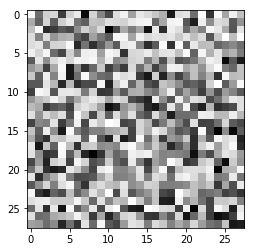

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {4.884617}	D_loss {0.036056}


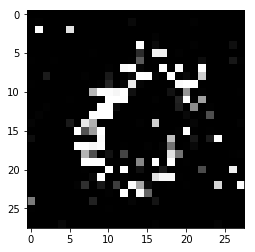

hello
Iteration {200.000000}	G_loss {4.876189}	D_loss {0.098021}


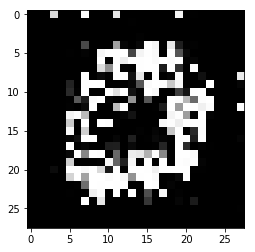

hello
Iteration {300.000000}	G_loss {6.351405}	D_loss {0.023747}


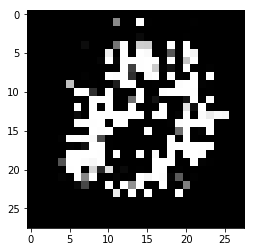

hello
Iteration {400.000000}	G_loss {4.096296}	D_loss {0.039669}


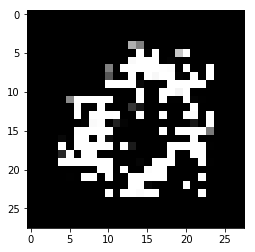

hello
Iteration {500.000000}	G_loss {7.694772}	D_loss {0.042777}


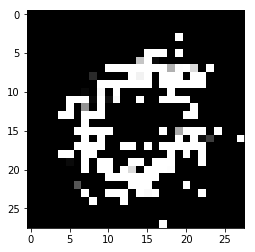

hello
Iteration {600.000000}	G_loss {12.929049}	D_loss {0.053571}


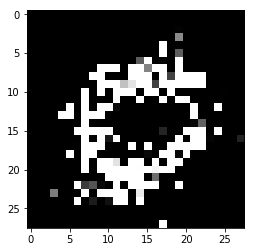

hello
Iteration {700.000000}	G_loss {10.065967}	D_loss {0.008017}


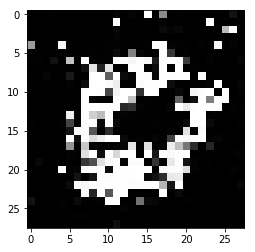

hello
Iteration {800.000000}	G_loss {6.297446}	D_loss {0.027980}


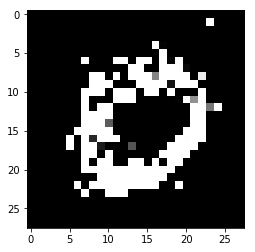

hello
Iteration {900.000000}	G_loss {6.271305}	D_loss {0.005301}


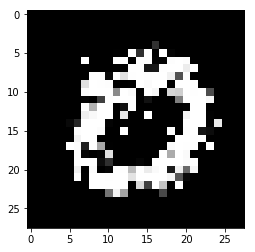

hello
Iteration {1000.000000}	G_loss {6.309041}	D_loss {0.003728}


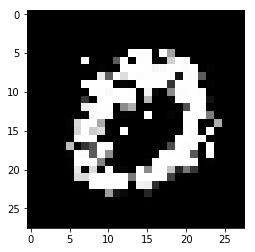

hello
Iteration {1100.000000}	G_loss {7.165692}	D_loss {0.005956}


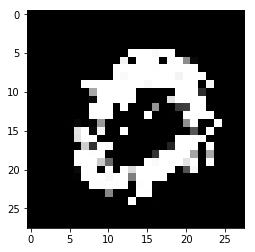

hello
Iteration {1200.000000}	G_loss {14.579314}	D_loss {0.000408}


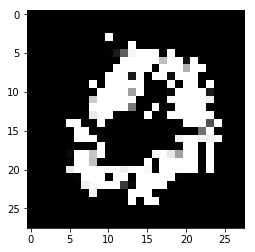

hello
Iteration {1300.000000}	G_loss {8.164401}	D_loss {0.048845}


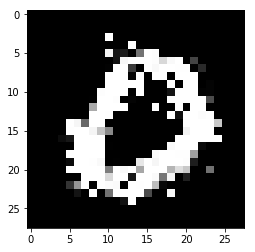

hello
Iteration {1400.000000}	G_loss {4.751969}	D_loss {0.019429}


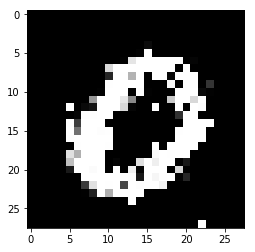

hello
Iteration {1500.000000}	G_loss {7.265282}	D_loss {0.039446}


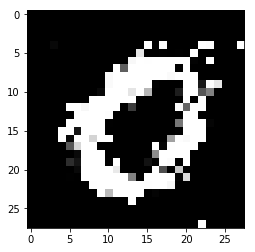

hello
Iteration {1600.000000}	G_loss {6.610816}	D_loss {0.047624}


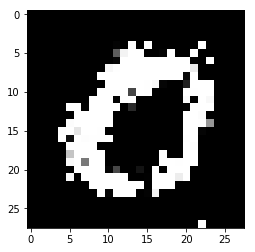

hello
Iteration {1700.000000}	G_loss {5.789406}	D_loss {0.025590}


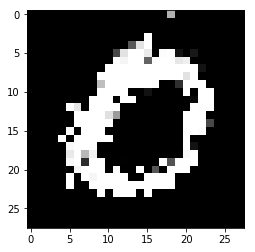

hello
Iteration {1800.000000}	G_loss {7.279668}	D_loss {0.070513}


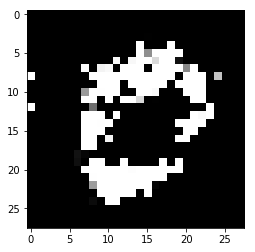

hello
Iteration {1900.000000}	G_loss {6.553332}	D_loss {0.009642}


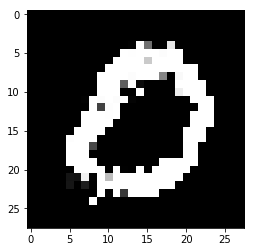

hello
Iteration {2000.000000}	G_loss {5.945753}	D_loss {0.070206}


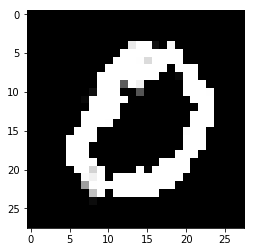

hello
Iteration {2100.000000}	G_loss {4.871144}	D_loss {0.017563}


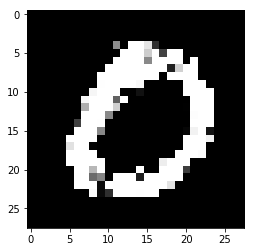

hello
Iteration {2200.000000}	G_loss {4.624207}	D_loss {0.012627}


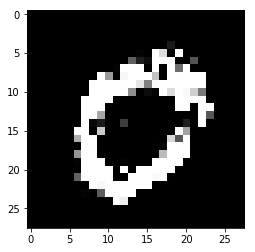

hello
Iteration {2300.000000}	G_loss {3.922136}	D_loss {0.045818}


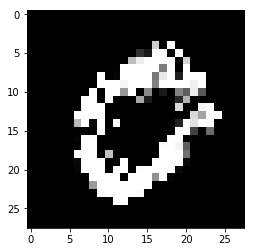

hello
Iteration {2400.000000}	G_loss {6.159501}	D_loss {0.025908}


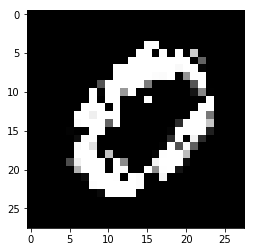

hello
Iteration {2500.000000}	G_loss {3.821094}	D_loss {0.115040}


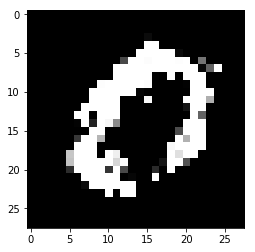

hello
Iteration {2600.000000}	G_loss {2.537546}	D_loss {0.059753}


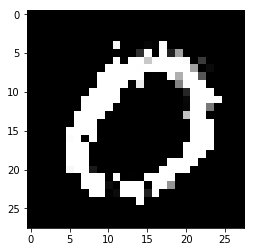

hello
Iteration {2700.000000}	G_loss {5.394525}	D_loss {0.041243}


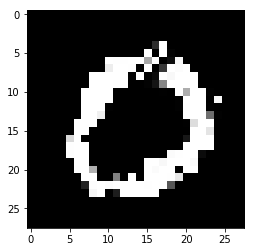

hello
Iteration {2800.000000}	G_loss {9.628318}	D_loss {0.000957}


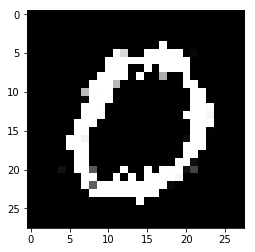

hello
Iteration {2900.000000}	G_loss {4.880767}	D_loss {0.021958}


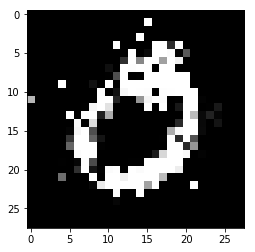

hello
Iteration {3000.000000}	G_loss {4.211524}	D_loss {0.027345}


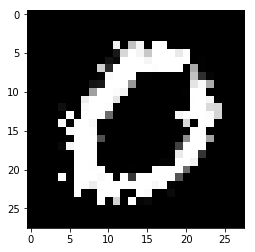

hello
Iteration {3100.000000}	G_loss {4.599740}	D_loss {0.028250}


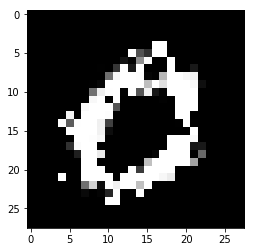

hello
Iteration {3200.000000}	G_loss {4.061124}	D_loss {0.014847}


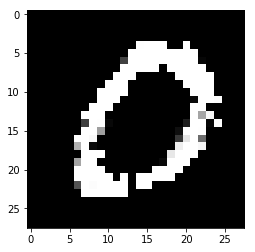

hello
Iteration {3300.000000}	G_loss {5.930859}	D_loss {0.004834}


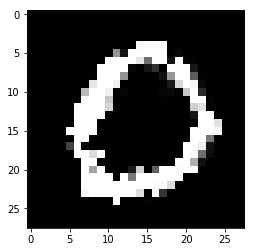

hello
Iteration {3400.000000}	G_loss {8.014691}	D_loss {0.065829}


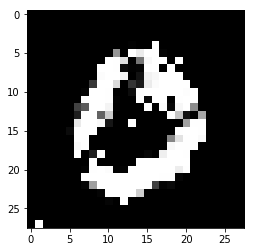

hello
Iteration {3500.000000}	G_loss {4.295736}	D_loss {0.022250}


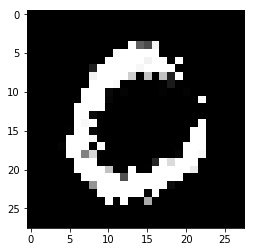

hello
Iteration {3600.000000}	G_loss {4.094826}	D_loss {0.022787}


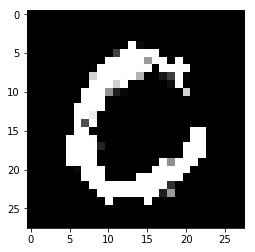

hello
Iteration {3700.000000}	G_loss {3.881329}	D_loss {0.073292}


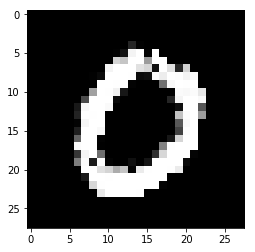

hello
Iteration {3800.000000}	G_loss {3.221714}	D_loss {0.111284}


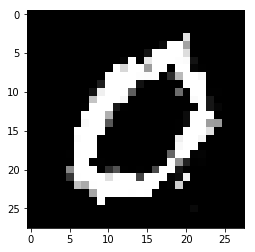

hello
Iteration {3900.000000}	G_loss {3.121581}	D_loss {0.062414}


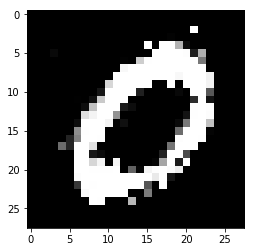

hello
Iteration {4000.000000}	G_loss {6.090928}	D_loss {0.036246}


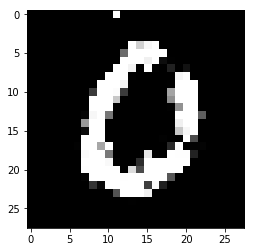

hello
Iteration {4100.000000}	G_loss {4.217782}	D_loss {0.137730}


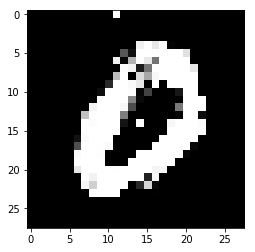

hello
Iteration {4200.000000}	G_loss {6.546690}	D_loss {0.120854}


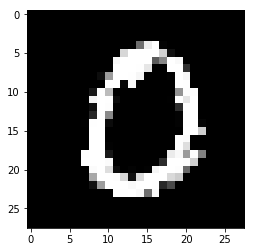

hello
Iteration {4300.000000}	G_loss {3.581435}	D_loss {0.420515}


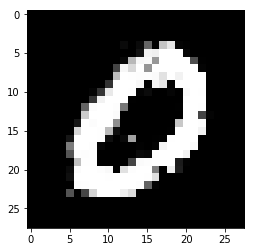

hello
Iteration {4400.000000}	G_loss {3.943181}	D_loss {0.319311}


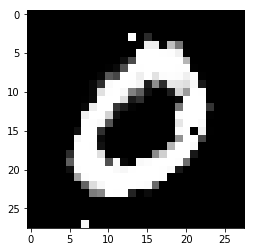

hello
Iteration {4500.000000}	G_loss {4.105085}	D_loss {0.203631}


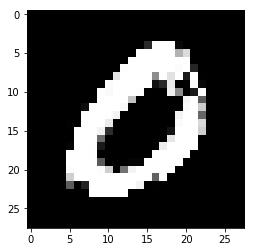

hello
Iteration {4600.000000}	G_loss {5.486807}	D_loss {0.376260}


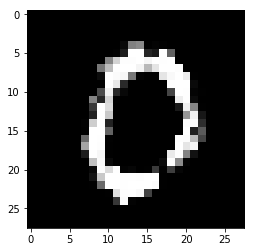

hello
Iteration {4700.000000}	G_loss {2.075622}	D_loss {0.485661}


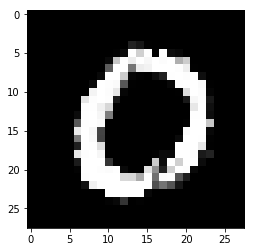

hello
Iteration {4800.000000}	G_loss {4.051258}	D_loss {0.103544}


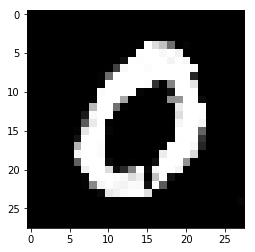

hello
Iteration {4900.000000}	G_loss {3.548771}	D_loss {0.747187}


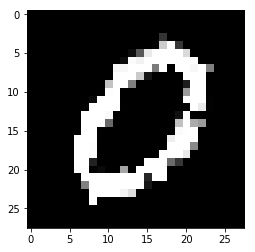

hello
Iteration {5000.000000}	G_loss {5.701598}	D_loss {0.143570}


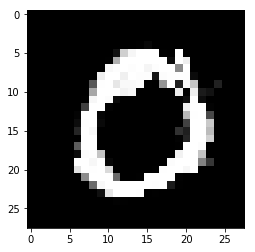

hello
Iteration {5100.000000}	G_loss {2.607835}	D_loss {0.569362}


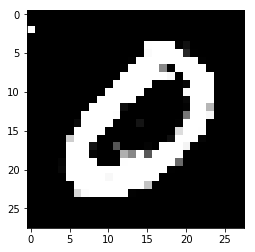

hello
Iteration {5200.000000}	G_loss {4.474606}	D_loss {0.466279}


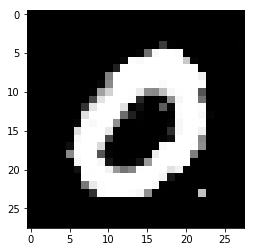

hello
Iteration {5300.000000}	G_loss {2.226766}	D_loss {0.589907}


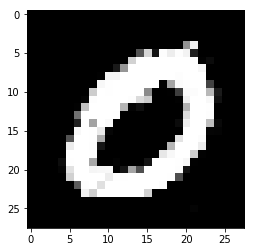

hello
Iteration {5400.000000}	G_loss {2.944561}	D_loss {0.849700}


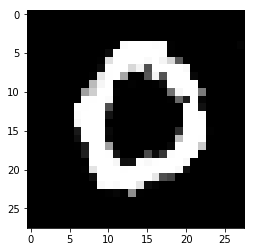

hello
Iteration {5500.000000}	G_loss {2.898852}	D_loss {1.589457}


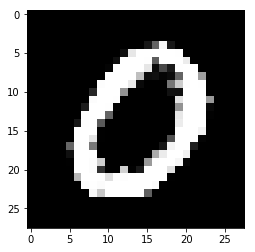

hello
Iteration {5600.000000}	G_loss {2.039343}	D_loss {0.561080}


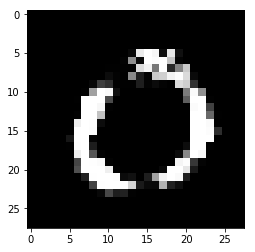

hello
Iteration {5700.000000}	G_loss {1.721524}	D_loss {0.798777}


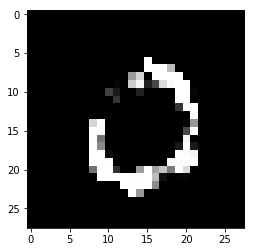

hello
Iteration {5800.000000}	G_loss {1.487080}	D_loss {0.828914}


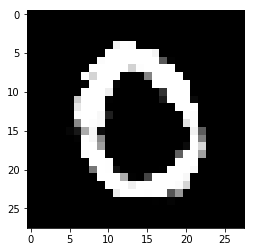

hello
Iteration {5900.000000}	G_loss {4.452989}	D_loss {0.765907}


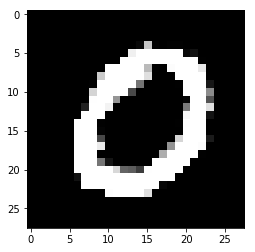

hello
Iteration {6000.000000}	G_loss {2.951447}	D_loss {0.591393}


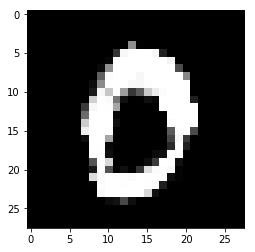

hello
Iteration {6100.000000}	G_loss {2.284913}	D_loss {0.686275}


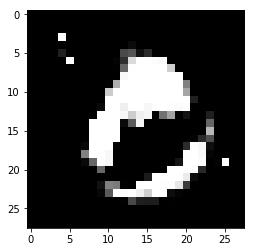

hello
Iteration {6200.000000}	G_loss {2.723010}	D_loss {0.752398}


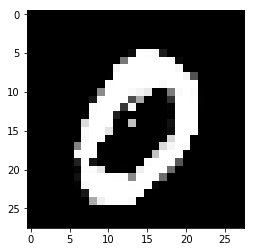

hello
Iteration {6300.000000}	G_loss {1.841550}	D_loss {0.843324}


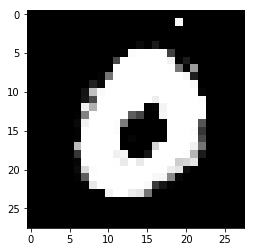

hello
Iteration {6400.000000}	G_loss {3.591708}	D_loss {1.119461}


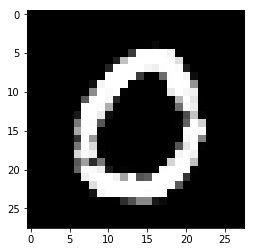

hello
Iteration {6500.000000}	G_loss {0.993438}	D_loss {1.254437}


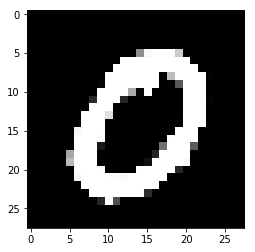

hello
Iteration {6600.000000}	G_loss {3.186095}	D_loss {0.659894}


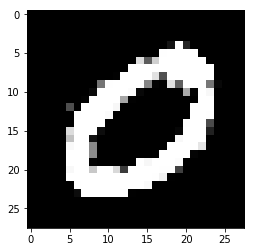

hello
Iteration {6700.000000}	G_loss {1.418655}	D_loss {0.778158}


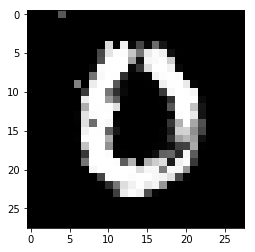

hello
Iteration {6800.000000}	G_loss {2.911681}	D_loss {0.559025}


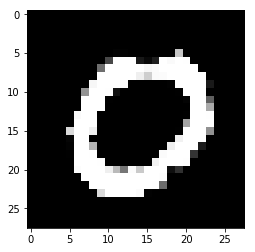

hello
Iteration {6900.000000}	G_loss {1.812212}	D_loss {0.898310}


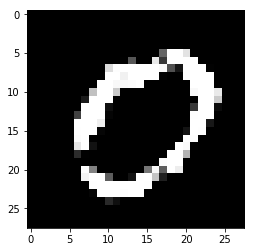

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {2.226478}	D_loss {2.750022}


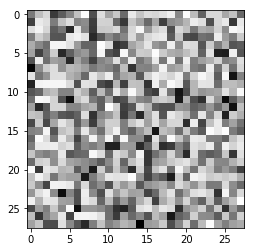

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {3.294968}	D_loss {0.056033}


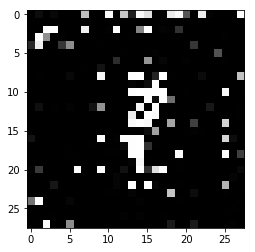

hello
Iteration {200.000000}	G_loss {4.318597}	D_loss {0.288177}


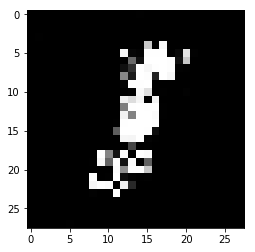

hello
Iteration {300.000000}	G_loss {4.290716}	D_loss {0.152416}


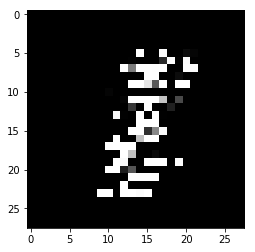

hello
Iteration {400.000000}	G_loss {4.328682}	D_loss {0.028095}


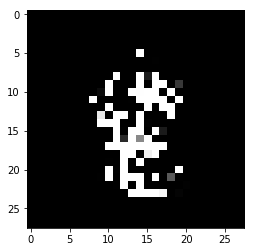

hello
Iteration {500.000000}	G_loss {4.413527}	D_loss {0.164265}


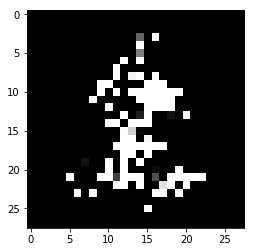

hello
Iteration {600.000000}	G_loss {6.807944}	D_loss {0.225365}


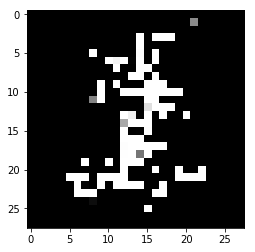

hello
Iteration {700.000000}	G_loss {5.500050}	D_loss {0.064340}


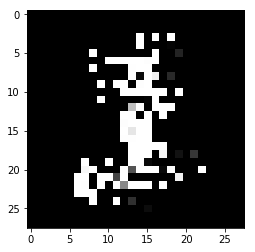

hello
Iteration {800.000000}	G_loss {6.837324}	D_loss {0.064995}


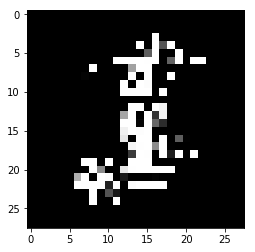

hello
Iteration {900.000000}	G_loss {5.758981}	D_loss {0.065499}


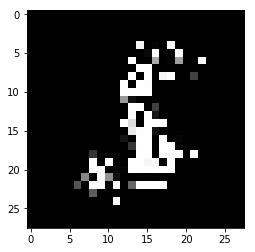

hello
Iteration {1000.000000}	G_loss {6.369940}	D_loss {0.004618}


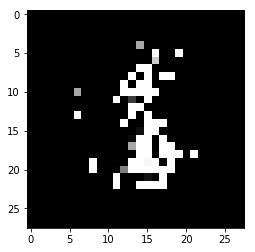

hello
Iteration {1100.000000}	G_loss {8.794232}	D_loss {0.019638}


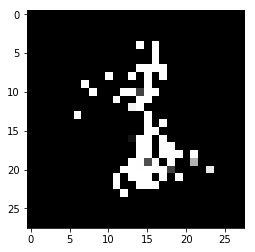

hello
Iteration {1200.000000}	G_loss {7.605776}	D_loss {0.006074}


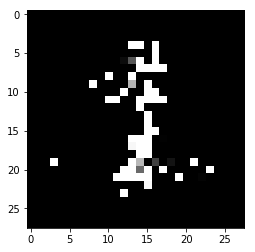

hello
Iteration {1300.000000}	G_loss {5.613772}	D_loss {0.057394}


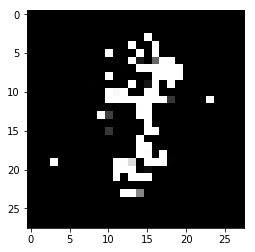

hello
Iteration {1400.000000}	G_loss {7.084250}	D_loss {0.028989}


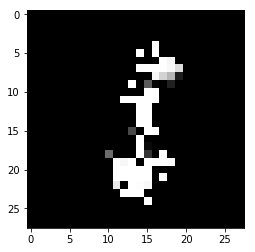

hello
Iteration {1500.000000}	G_loss {5.594270}	D_loss {0.014361}


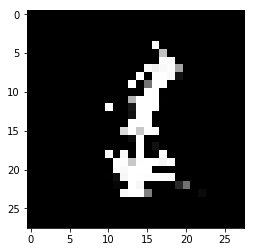

hello
Iteration {1600.000000}	G_loss {5.854611}	D_loss {0.155674}


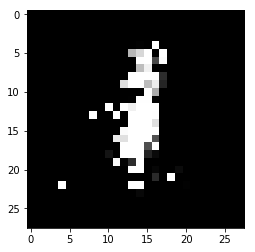

hello
Iteration {1700.000000}	G_loss {6.583156}	D_loss {0.002986}


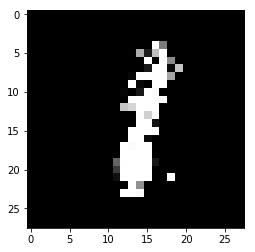

hello
Iteration {1800.000000}	G_loss {7.492916}	D_loss {0.077524}


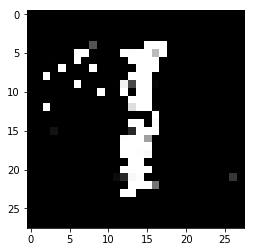

hello
Iteration {1900.000000}	G_loss {5.240394}	D_loss {0.016209}


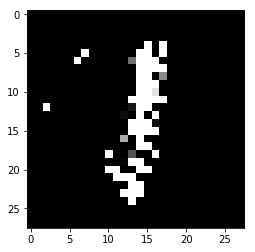

hello
Iteration {2000.000000}	G_loss {8.152188}	D_loss {0.002446}


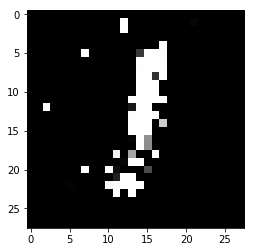

hello
Iteration {2100.000000}	G_loss {6.587979}	D_loss {0.001972}


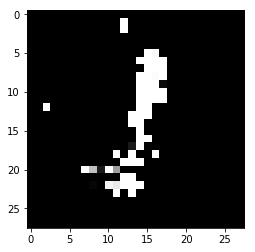

hello
Iteration {2200.000000}	G_loss {9.223390}	D_loss {0.000151}


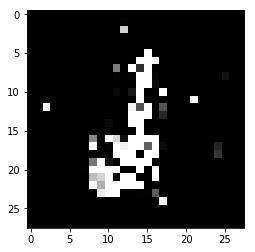

hello
Iteration {2300.000000}	G_loss {8.825497}	D_loss {0.000654}


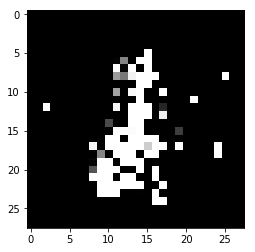

hello
Iteration {2400.000000}	G_loss {9.163898}	D_loss {0.004543}


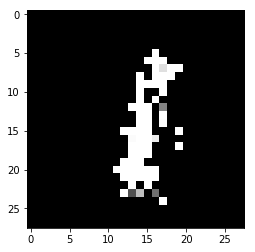

hello
Iteration {2500.000000}	G_loss {6.378025}	D_loss {0.008572}


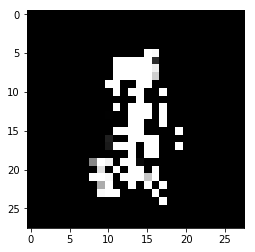

hello
Iteration {2600.000000}	G_loss {6.263728}	D_loss {0.003541}


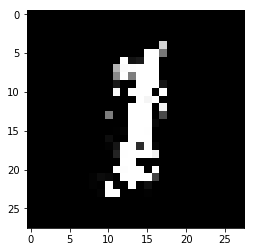

hello
Iteration {2700.000000}	G_loss {10.023035}	D_loss {0.002498}


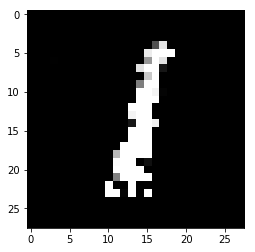

hello
Iteration {2800.000000}	G_loss {7.426838}	D_loss {0.005226}


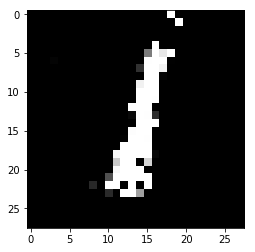

hello
Iteration {2900.000000}	G_loss {11.117274}	D_loss {0.000034}


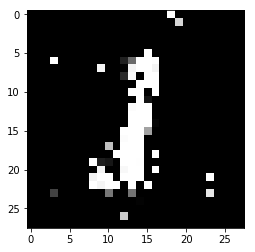

hello
Iteration {3000.000000}	G_loss {6.403085}	D_loss {0.005808}


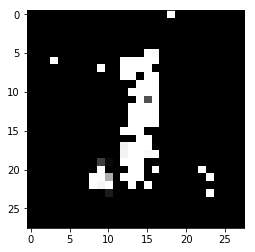

hello
Iteration {3100.000000}	G_loss {7.232625}	D_loss {0.001926}


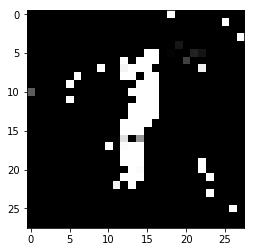

hello
Iteration {3200.000000}	G_loss {6.404284}	D_loss {0.007189}


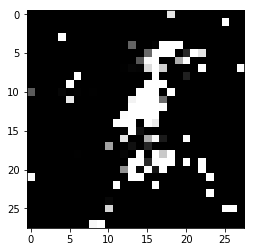

hello
Iteration {3300.000000}	G_loss {6.649725}	D_loss {0.005986}


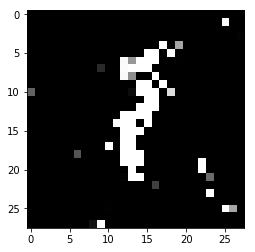

hello
Iteration {3400.000000}	G_loss {8.658853}	D_loss {0.000295}


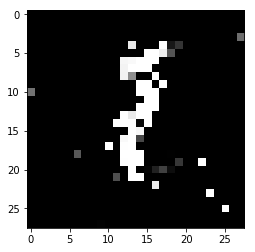

hello
Iteration {3500.000000}	G_loss {7.538057}	D_loss {0.000632}


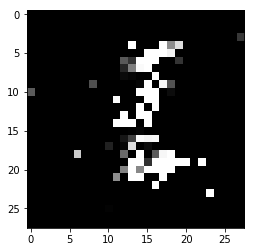

hello
Iteration {3600.000000}	G_loss {8.597835}	D_loss {0.000448}


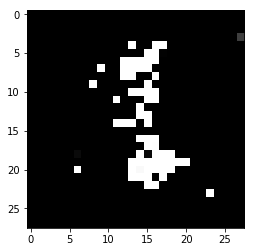

hello
Iteration {3700.000000}	G_loss {7.882220}	D_loss {0.004524}


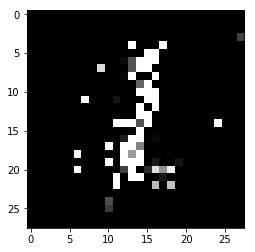

hello
Iteration {3800.000000}	G_loss {8.967681}	D_loss {0.001038}


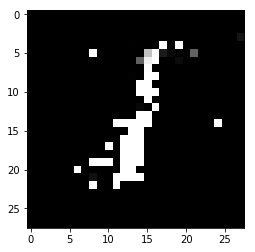

hello
Iteration {3900.000000}	G_loss {7.420784}	D_loss {0.000503}


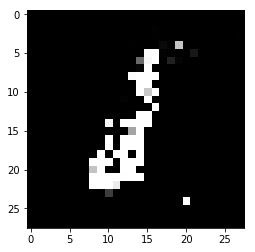

hello
Iteration {4000.000000}	G_loss {6.163786}	D_loss {0.004658}


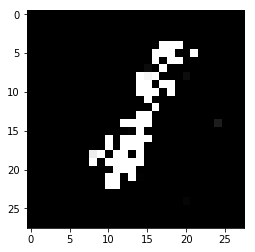

hello
Iteration {4100.000000}	G_loss {7.517507}	D_loss {0.000807}


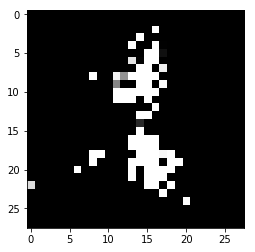

hello
Iteration {4200.000000}	G_loss {5.848051}	D_loss {0.004127}


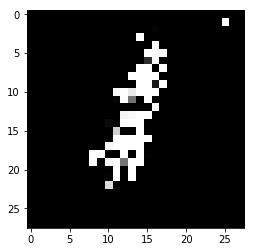

hello
Iteration {4300.000000}	G_loss {8.845816}	D_loss {0.001409}


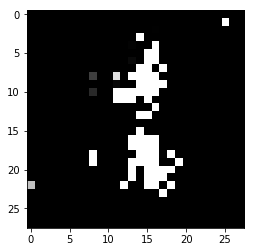

hello
Iteration {4400.000000}	G_loss {9.677738}	D_loss {0.000113}


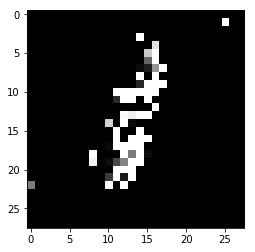

hello
Iteration {4500.000000}	G_loss {8.449054}	D_loss {0.000452}


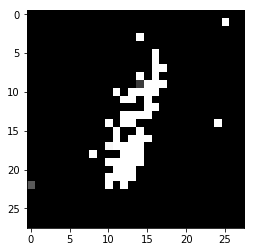

hello
Iteration {4600.000000}	G_loss {7.267861}	D_loss {0.001052}


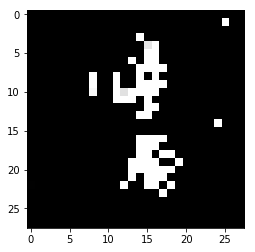

hello
Iteration {4700.000000}	G_loss {10.527946}	D_loss {0.000200}


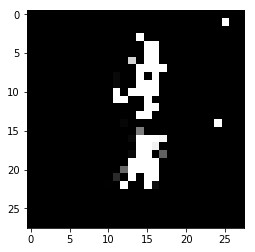

hello
Iteration {4800.000000}	G_loss {13.472086}	D_loss {0.000678}


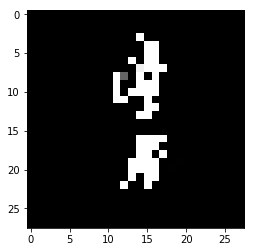

hello
Iteration {4900.000000}	G_loss {8.991228}	D_loss {0.000258}


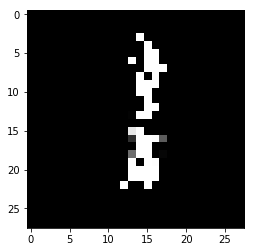

hello
Iteration {5000.000000}	G_loss {8.047956}	D_loss {0.000483}


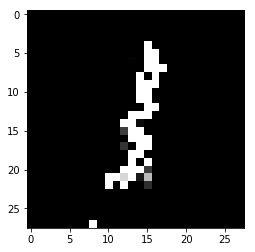

hello
Iteration {5100.000000}	G_loss {8.636837}	D_loss {0.000283}


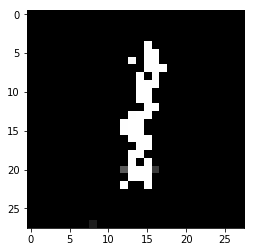

hello
Iteration {5200.000000}	G_loss {9.150826}	D_loss {0.000136}


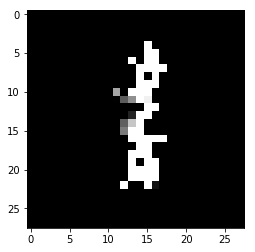

hello
Iteration {5300.000000}	G_loss {8.015097}	D_loss {0.006518}


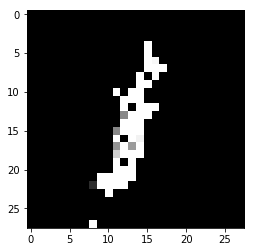

hello
Iteration {5400.000000}	G_loss {9.470979}	D_loss {0.000130}


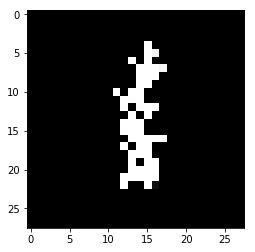

hello
Iteration {5500.000000}	G_loss {9.314621}	D_loss {0.000234}


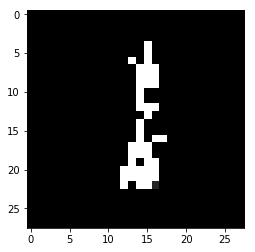

hello
Iteration {5600.000000}	G_loss {8.975953}	D_loss {0.002162}


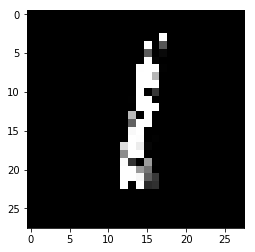

hello
Iteration {5700.000000}	G_loss {10.762688}	D_loss {0.000045}


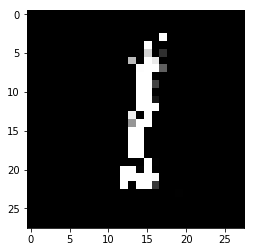

hello
Iteration {5800.000000}	G_loss {10.528185}	D_loss {0.000063}


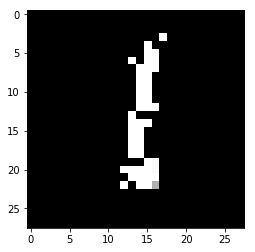

hello
Iteration {5900.000000}	G_loss {11.066946}	D_loss {0.000117}


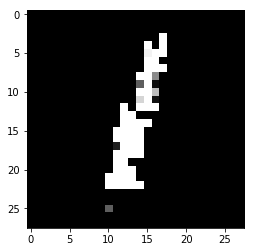

hello
Iteration {6000.000000}	G_loss {9.086014}	D_loss {0.001623}


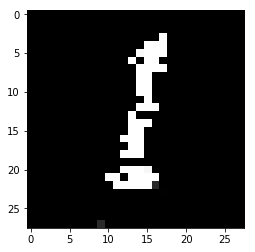

hello
Iteration {6100.000000}	G_loss {9.724384}	D_loss {0.000102}


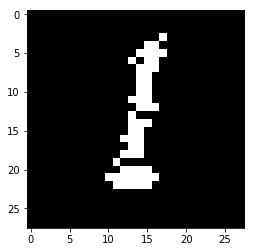

hello
Iteration {6200.000000}	G_loss {7.271112}	D_loss {0.001675}


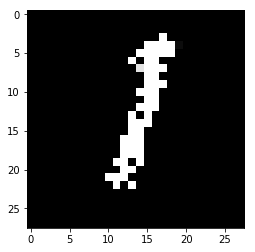

hello
Iteration {6300.000000}	G_loss {9.200739}	D_loss {0.000137}


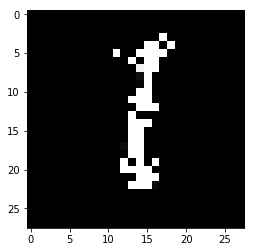

hello
Iteration {6400.000000}	G_loss {9.907849}	D_loss {0.000131}


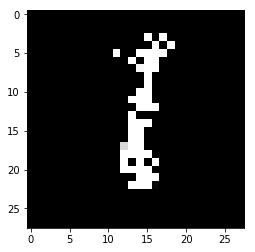

hello
Iteration {6500.000000}	G_loss {17.850216}	D_loss {0.000005}


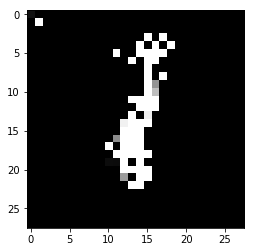

hello
Iteration {6600.000000}	G_loss {9.597189}	D_loss {0.000457}


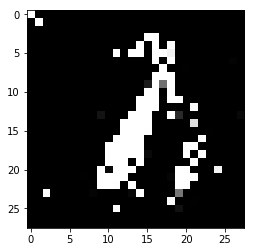

hello
Iteration {6700.000000}	G_loss {15.429949}	D_loss {0.003365}


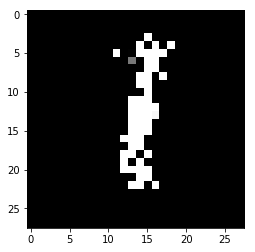

hello
Iteration {6800.000000}	G_loss {9.660401}	D_loss {0.006081}


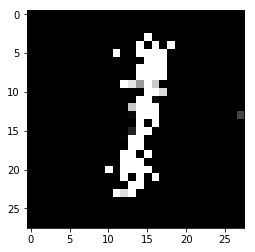

hello
Iteration {6900.000000}	G_loss {12.320427}	D_loss {0.004134}


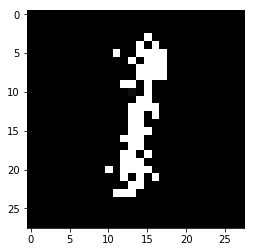

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {0.330950}	D_loss {2.153608}


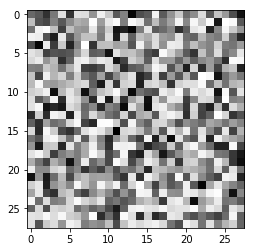

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {5.538795}	D_loss {0.028143}


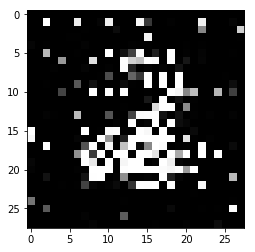

hello
Iteration {200.000000}	G_loss {5.137653}	D_loss {0.039424}


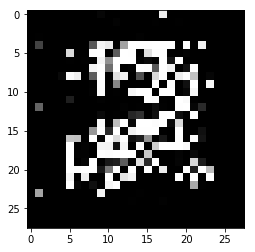

hello
Iteration {300.000000}	G_loss {7.752407}	D_loss {0.009714}


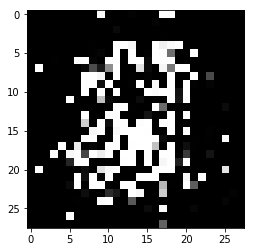

hello
Iteration {400.000000}	G_loss {8.967455}	D_loss {0.006046}


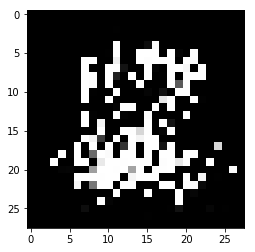

hello
Iteration {500.000000}	G_loss {9.374608}	D_loss {0.118035}


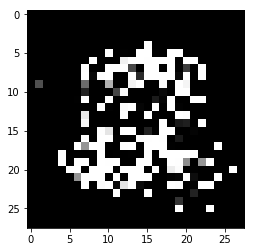

hello
Iteration {600.000000}	G_loss {14.175920}	D_loss {0.000395}


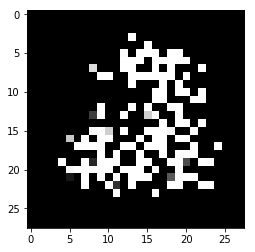

hello
Iteration {700.000000}	G_loss {5.936527}	D_loss {0.002832}


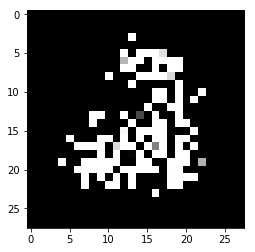

hello
Iteration {800.000000}	G_loss {7.628558}	D_loss {0.194644}


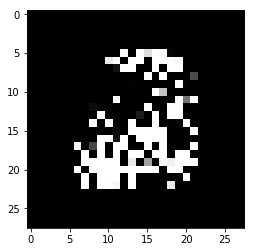

hello
Iteration {900.000000}	G_loss {8.017782}	D_loss {0.005003}


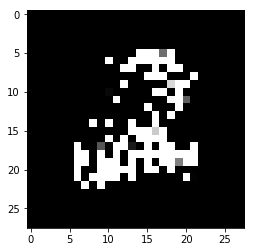

hello
Iteration {1000.000000}	G_loss {5.547029}	D_loss {0.001819}


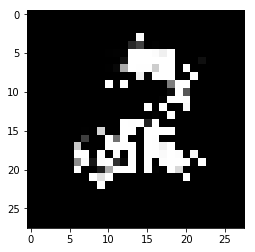

hello
Iteration {1100.000000}	G_loss {5.722984}	D_loss {0.005846}


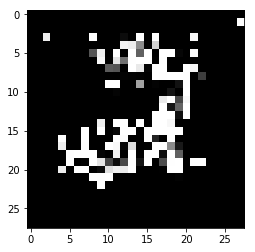

hello
Iteration {1200.000000}	G_loss {7.531282}	D_loss {0.011919}


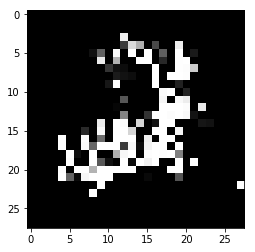

hello
Iteration {1300.000000}	G_loss {7.876383}	D_loss {0.003338}


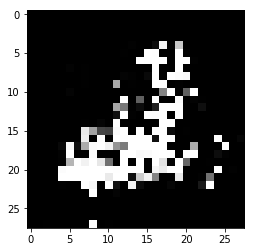

hello
Iteration {1400.000000}	G_loss {9.921597}	D_loss {0.001902}


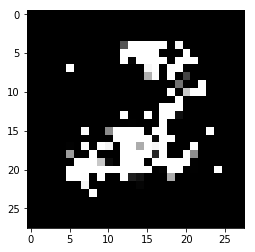

hello
Iteration {1500.000000}	G_loss {6.132649}	D_loss {0.070536}


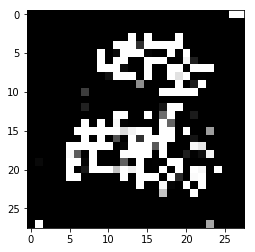

hello
Iteration {1600.000000}	G_loss {7.720953}	D_loss {0.046890}


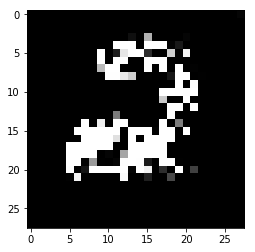

hello
Iteration {1700.000000}	G_loss {6.676381}	D_loss {0.016759}


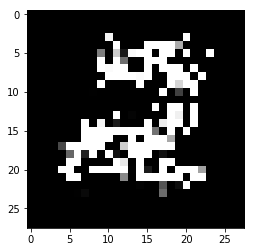

hello
Iteration {1800.000000}	G_loss {7.165242}	D_loss {0.139025}


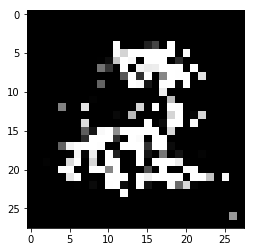

hello
Iteration {1900.000000}	G_loss {5.384279}	D_loss {0.019345}


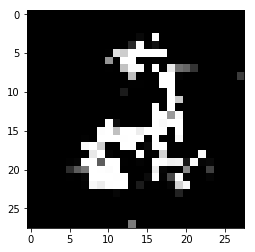

hello
Iteration {2000.000000}	G_loss {5.299000}	D_loss {0.020016}


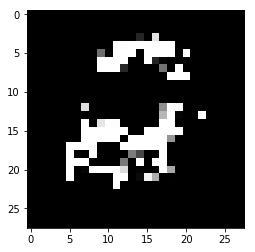

hello
Iteration {2100.000000}	G_loss {4.326211}	D_loss {0.009396}


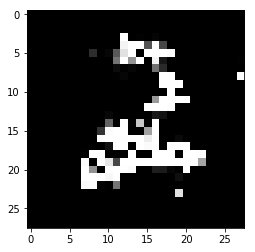

hello
Iteration {2200.000000}	G_loss {6.348720}	D_loss {0.007690}


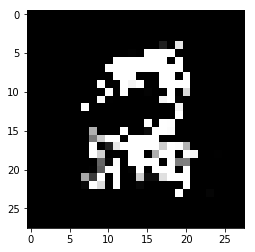

hello
Iteration {2300.000000}	G_loss {5.266824}	D_loss {0.023834}


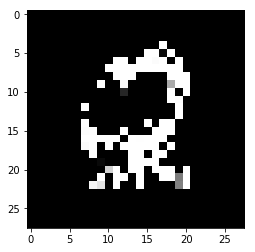

hello
Iteration {2400.000000}	G_loss {8.224563}	D_loss {0.002751}


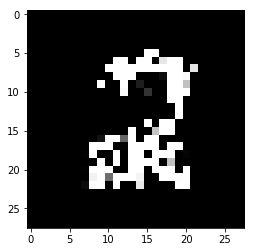

hello
Iteration {2500.000000}	G_loss {8.102421}	D_loss {0.014488}


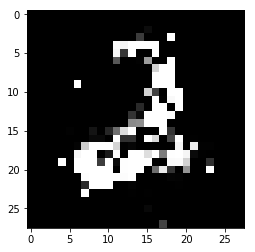

hello
Iteration {2600.000000}	G_loss {7.611810}	D_loss {0.001079}


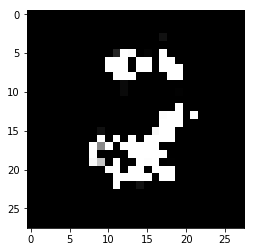

hello
Iteration {2700.000000}	G_loss {5.812368}	D_loss {0.008323}


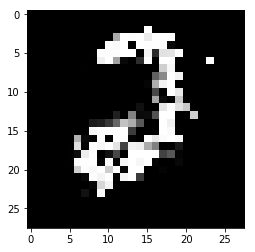

hello
Iteration {2800.000000}	G_loss {8.827117}	D_loss {0.001079}


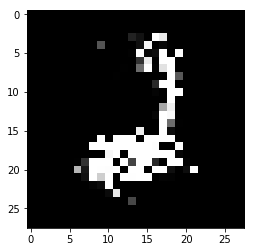

hello
Iteration {2900.000000}	G_loss {8.838335}	D_loss {0.000353}


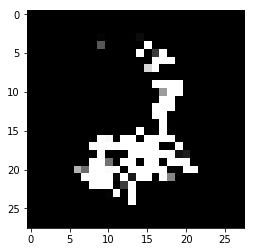

hello
Iteration {3000.000000}	G_loss {4.942228}	D_loss {0.049423}


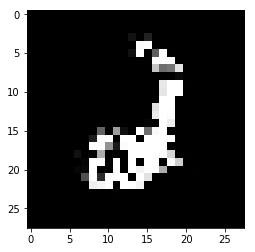

hello
Iteration {3100.000000}	G_loss {7.020824}	D_loss {0.001266}


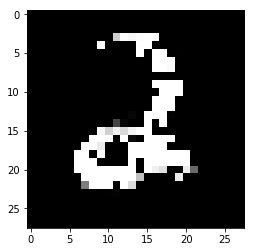

hello
Iteration {3200.000000}	G_loss {5.321440}	D_loss {0.016721}


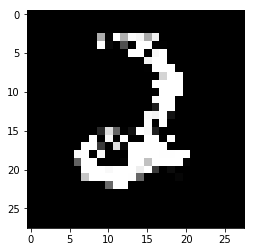

hello
Iteration {3300.000000}	G_loss {4.984033}	D_loss {0.064461}


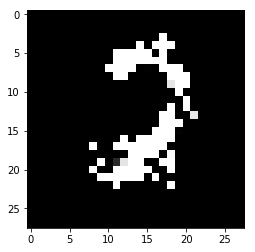

hello
Iteration {3400.000000}	G_loss {6.974103}	D_loss {0.001126}


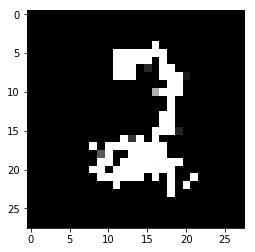

hello
Iteration {3500.000000}	G_loss {2.899957}	D_loss {0.013497}


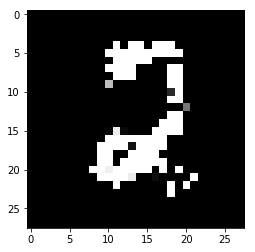

hello
Iteration {3600.000000}	G_loss {5.810067}	D_loss {0.004725}


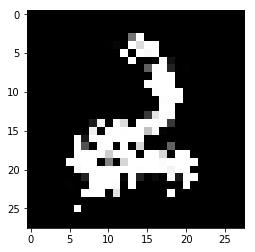

hello
Iteration {3700.000000}	G_loss {8.329731}	D_loss {0.090987}


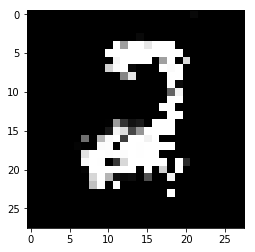

hello
Iteration {3800.000000}	G_loss {10.275417}	D_loss {0.001023}


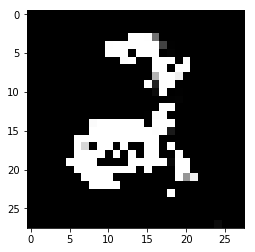

hello
Iteration {3900.000000}	G_loss {13.236167}	D_loss {0.000022}


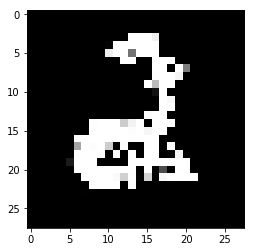

hello
Iteration {4000.000000}	G_loss {12.439969}	D_loss {0.000033}


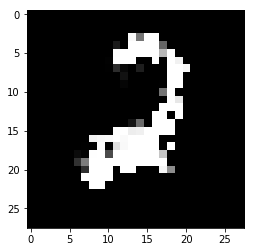

hello
Iteration {4100.000000}	G_loss {5.168332}	D_loss {0.019669}


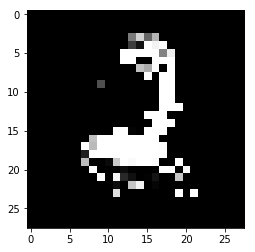

hello
Iteration {4200.000000}	G_loss {4.534185}	D_loss {0.012706}


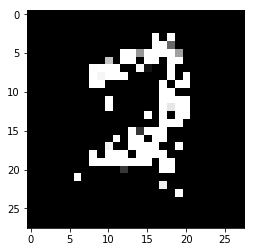

hello
Iteration {4300.000000}	G_loss {7.367314}	D_loss {0.002639}


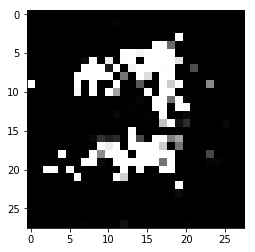

hello
Iteration {4400.000000}	G_loss {5.440220}	D_loss {0.015179}


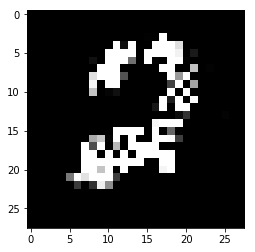

hello
Iteration {4500.000000}	G_loss {8.256059}	D_loss {0.006693}


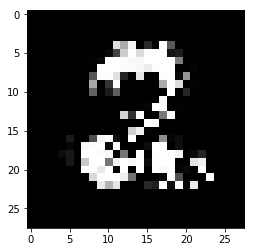

hello
Iteration {4600.000000}	G_loss {8.460588}	D_loss {0.004364}


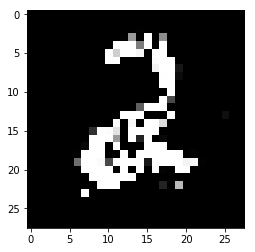

hello
Iteration {4700.000000}	G_loss {9.850663}	D_loss {0.003301}


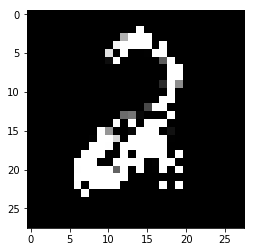

hello
Iteration {4800.000000}	G_loss {9.830003}	D_loss {0.004829}


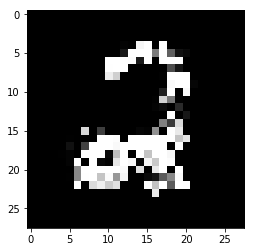

hello
Iteration {4900.000000}	G_loss {11.340935}	D_loss {0.006746}


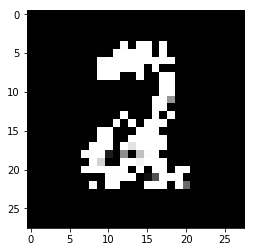

hello
Iteration {5000.000000}	G_loss {9.387318}	D_loss {0.001285}


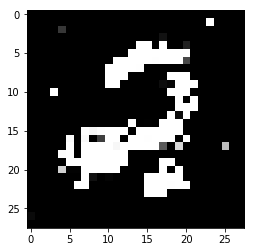

hello
Iteration {5100.000000}	G_loss {7.300570}	D_loss {0.001183}


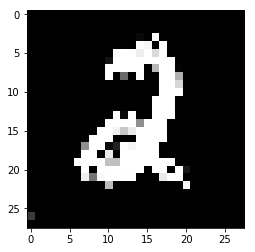

hello
Iteration {5200.000000}	G_loss {10.824055}	D_loss {0.000277}


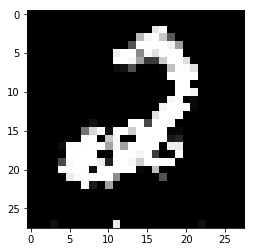

hello
Iteration {5300.000000}	G_loss {6.165789}	D_loss {0.012763}


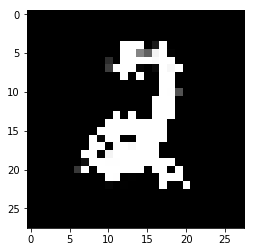

hello
Iteration {5400.000000}	G_loss {7.473086}	D_loss {0.004279}


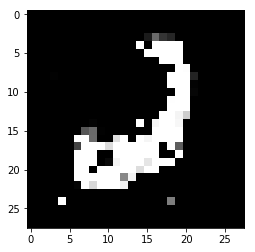

hello
Iteration {5500.000000}	G_loss {9.031388}	D_loss {0.022304}


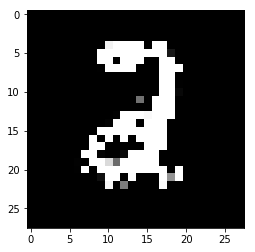

hello
Iteration {5600.000000}	G_loss {7.761451}	D_loss {0.002735}


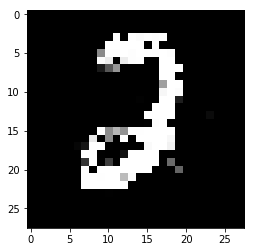

hello
Iteration {5700.000000}	G_loss {6.740597}	D_loss {0.006414}


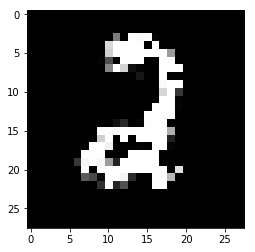

hello
Iteration {5800.000000}	G_loss {3.243824}	D_loss {0.001354}


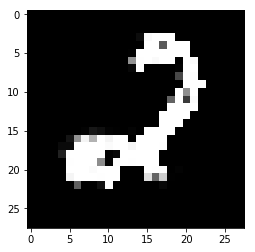

hello
Iteration {5900.000000}	G_loss {6.912631}	D_loss {0.007018}


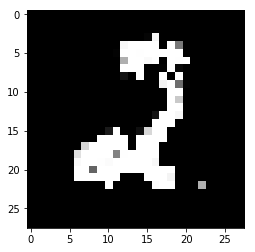

hello
Iteration {6000.000000}	G_loss {21.771700}	D_loss {0.267214}


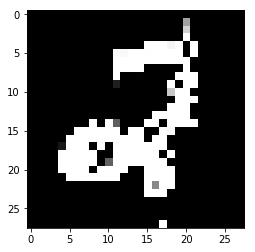

hello
Iteration {6100.000000}	G_loss {13.582922}	D_loss {0.052795}


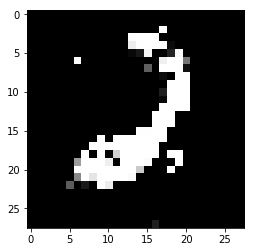

hello
Iteration {6200.000000}	G_loss {5.229054}	D_loss {0.016659}


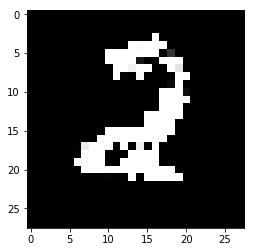

hello
Iteration {6300.000000}	G_loss {9.784978}	D_loss {0.004223}


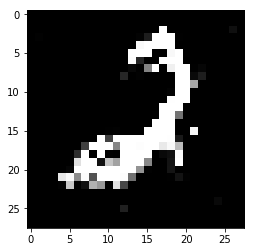

hello
Iteration {6400.000000}	G_loss {8.391075}	D_loss {0.183364}


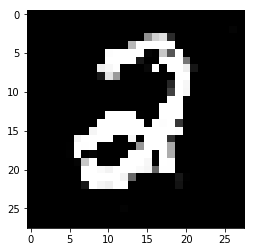

hello
Iteration {6500.000000}	G_loss {5.386122}	D_loss {0.013244}


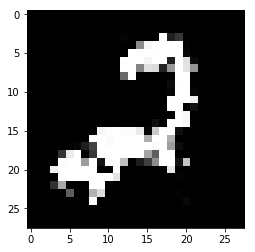

hello
Iteration {6600.000000}	G_loss {6.322766}	D_loss {0.004856}


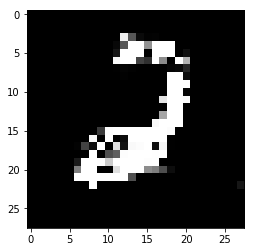

hello
Iteration {6700.000000}	G_loss {8.376093}	D_loss {0.002386}


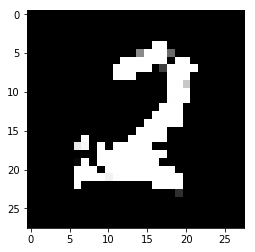

hello
Iteration {6800.000000}	G_loss {10.277048}	D_loss {0.019516}


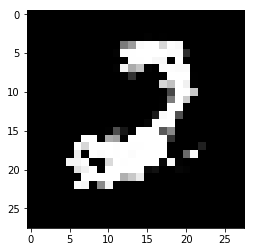

hello
Iteration {6900.000000}	G_loss {7.921721}	D_loss {0.013939}


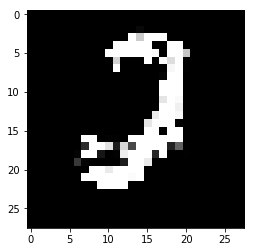

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {2.899649}	D_loss {1.392735}


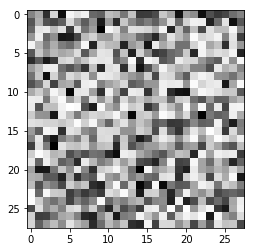

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {5.185112}	D_loss {0.092924}


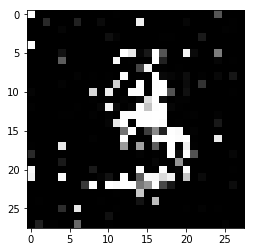

hello
Iteration {200.000000}	G_loss {5.159134}	D_loss {0.112309}


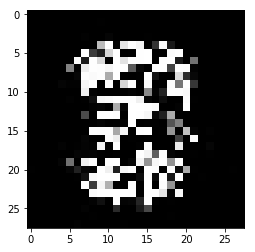

hello
Iteration {300.000000}	G_loss {8.105106}	D_loss {0.004822}


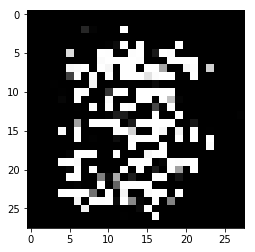

hello
Iteration {400.000000}	G_loss {6.018229}	D_loss {0.005148}


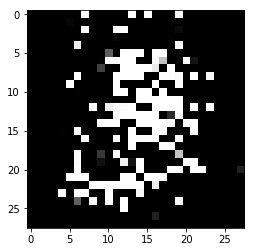

hello
Iteration {500.000000}	G_loss {11.377834}	D_loss {0.016255}


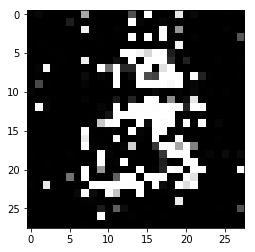

hello
Iteration {600.000000}	G_loss {6.762066}	D_loss {0.008384}


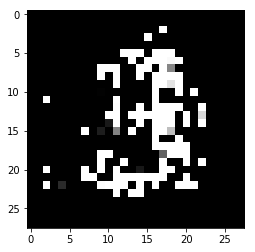

hello
Iteration {700.000000}	G_loss {7.285210}	D_loss {0.130493}


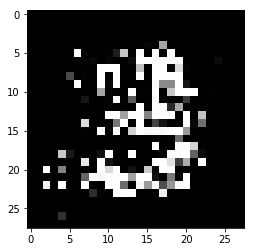

hello
Iteration {800.000000}	G_loss {7.960671}	D_loss {0.007894}


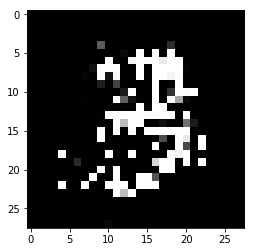

hello
Iteration {900.000000}	G_loss {7.894187}	D_loss {0.013933}


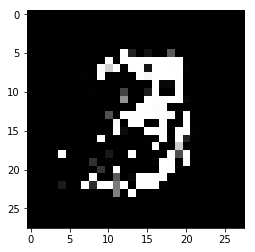

hello
Iteration {1000.000000}	G_loss {6.179422}	D_loss {0.170223}


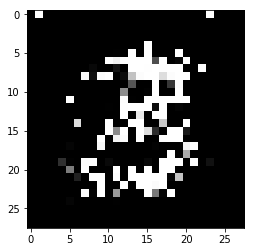

hello
Iteration {1100.000000}	G_loss {6.190377}	D_loss {0.035338}


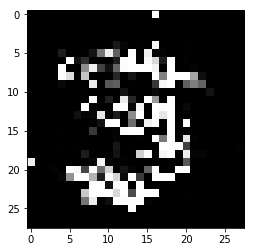

hello
Iteration {1200.000000}	G_loss {4.196176}	D_loss {0.111671}


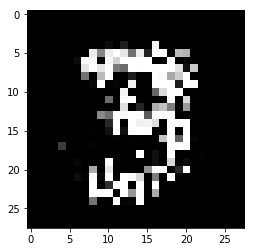

hello
Iteration {1300.000000}	G_loss {18.894512}	D_loss {0.176097}


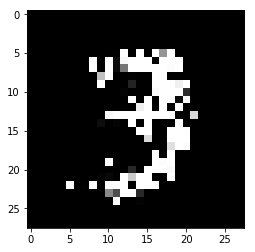

hello
Iteration {1400.000000}	G_loss {6.406753}	D_loss {0.006725}


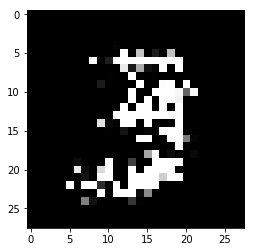

hello
Iteration {1500.000000}	G_loss {6.438051}	D_loss {0.013836}


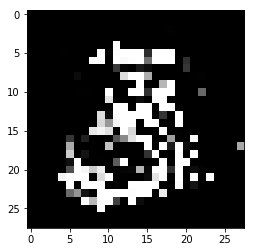

hello
Iteration {1600.000000}	G_loss {3.373746}	D_loss {0.049581}


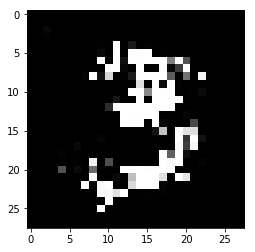

hello
Iteration {1700.000000}	G_loss {9.903534}	D_loss {0.029827}


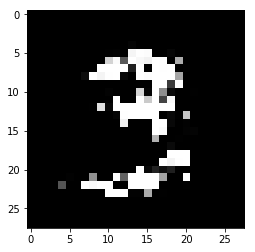

hello
Iteration {1800.000000}	G_loss {5.858450}	D_loss {0.009919}


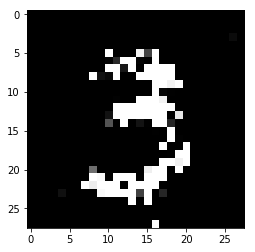

hello
Iteration {1900.000000}	G_loss {6.049351}	D_loss {0.142989}


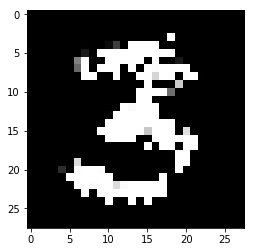

hello
Iteration {2000.000000}	G_loss {3.315385}	D_loss {0.123536}


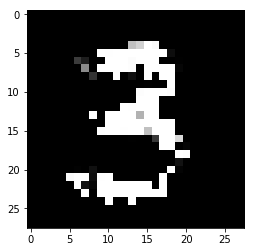

hello
Iteration {2100.000000}	G_loss {4.923870}	D_loss {0.029371}


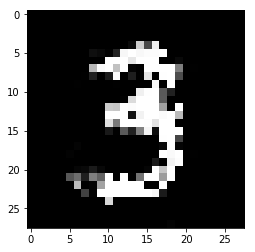

hello
Iteration {2200.000000}	G_loss {5.033674}	D_loss {0.021378}


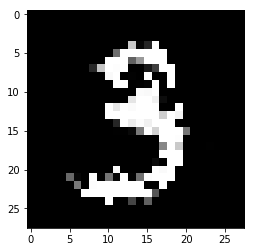

hello
Iteration {2300.000000}	G_loss {5.491179}	D_loss {0.023170}


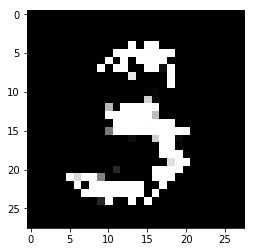

hello
Iteration {2400.000000}	G_loss {6.868690}	D_loss {0.103145}


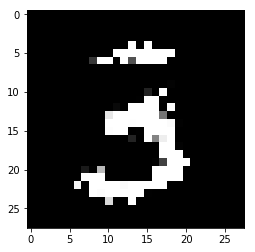

hello
Iteration {2500.000000}	G_loss {6.296086}	D_loss {0.040319}


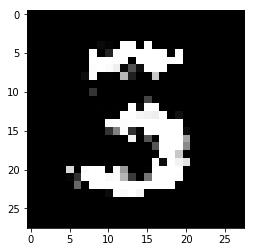

hello
Iteration {2600.000000}	G_loss {7.953299}	D_loss {0.019992}


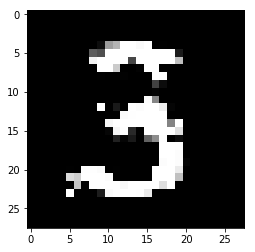

hello
Iteration {2700.000000}	G_loss {4.665979}	D_loss {0.022416}


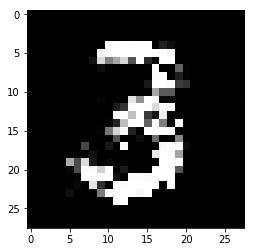

hello
Iteration {2800.000000}	G_loss {4.153279}	D_loss {0.067365}


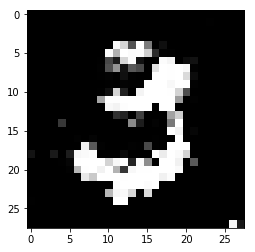

hello
Iteration {2900.000000}	G_loss {5.598268}	D_loss {0.022723}


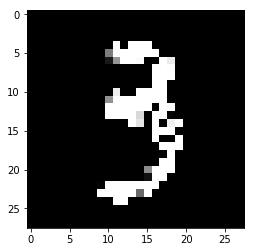

hello
Iteration {3000.000000}	G_loss {6.196219}	D_loss {0.033998}


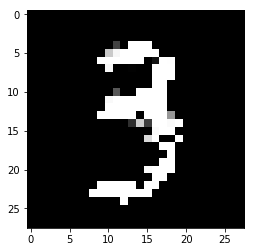

hello
Iteration {3100.000000}	G_loss {4.296868}	D_loss {0.023168}


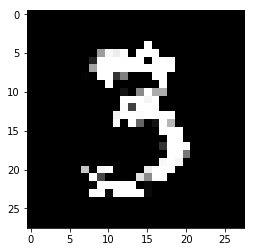

hello
Iteration {3200.000000}	G_loss {5.608214}	D_loss {0.015793}


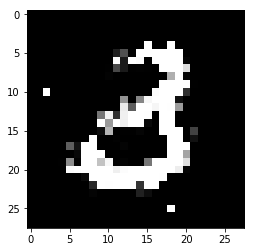

hello
Iteration {3300.000000}	G_loss {3.973810}	D_loss {0.176658}


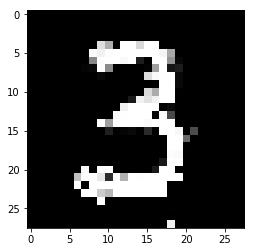

hello
Iteration {3400.000000}	G_loss {4.774982}	D_loss {0.008801}


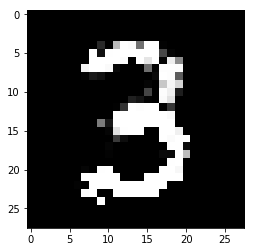

hello
Iteration {3500.000000}	G_loss {0.956916}	D_loss {0.049156}


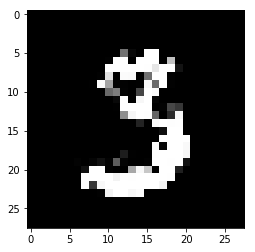

hello
Iteration {3600.000000}	G_loss {4.622580}	D_loss {0.023454}


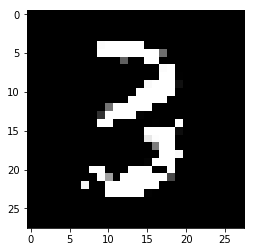

hello
Iteration {3700.000000}	G_loss {4.500012}	D_loss {0.059360}


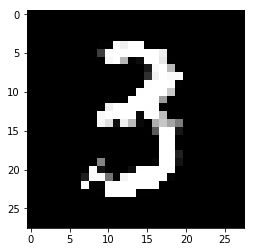

hello
Iteration {3800.000000}	G_loss {2.949070}	D_loss {0.042131}


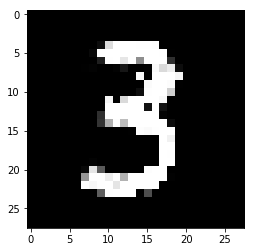

hello
Iteration {3900.000000}	G_loss {5.786429}	D_loss {0.021067}


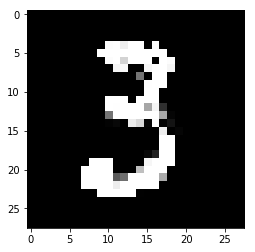

hello
Iteration {4000.000000}	G_loss {5.538447}	D_loss {0.142889}


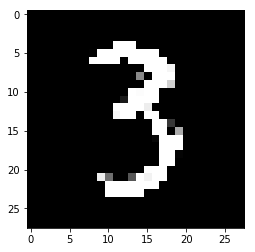

hello
Iteration {4100.000000}	G_loss {4.886961}	D_loss {0.040886}


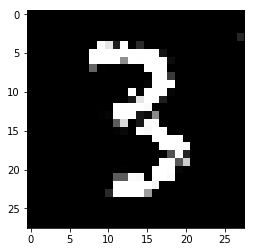

hello
Iteration {4200.000000}	G_loss {6.910793}	D_loss {0.027761}


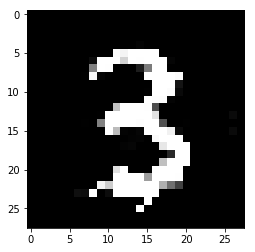

hello
Iteration {4300.000000}	G_loss {5.428757}	D_loss {0.062248}


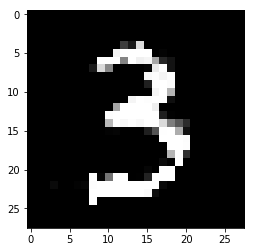

hello
Iteration {4400.000000}	G_loss {3.356848}	D_loss {0.203772}


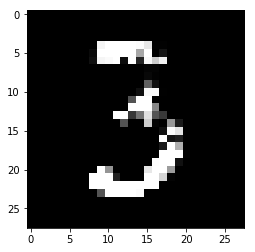

hello
Iteration {4500.000000}	G_loss {4.162013}	D_loss {0.095190}


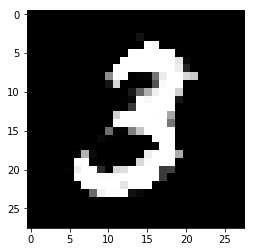

hello
Iteration {4600.000000}	G_loss {4.572294}	D_loss {0.055626}


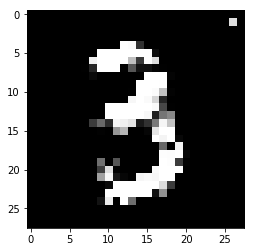

hello
Iteration {4700.000000}	G_loss {2.543029}	D_loss {0.193247}


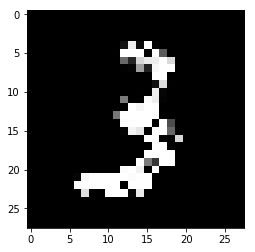

hello
Iteration {4800.000000}	G_loss {4.975401}	D_loss {0.467156}


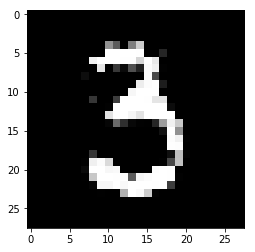

hello
Iteration {4900.000000}	G_loss {8.011788}	D_loss {0.264523}


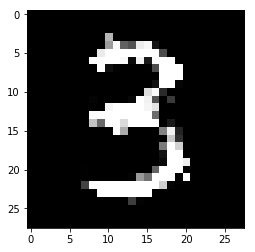

hello
Iteration {5000.000000}	G_loss {4.665881}	D_loss {0.405529}


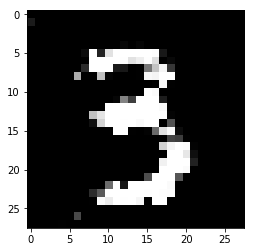

hello
Iteration {5100.000000}	G_loss {1.799698}	D_loss {0.172543}


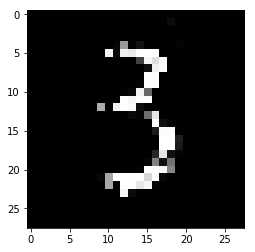

hello
Iteration {5200.000000}	G_loss {2.485876}	D_loss {0.304234}


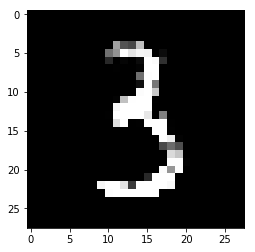

hello
Iteration {5300.000000}	G_loss {4.386432}	D_loss {0.326310}


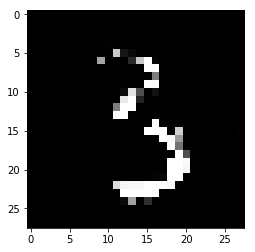

hello
Iteration {5400.000000}	G_loss {3.040158}	D_loss {0.318381}


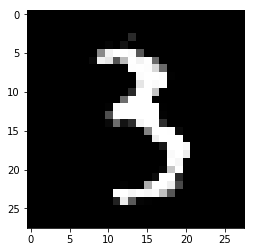

hello
Iteration {5500.000000}	G_loss {5.335305}	D_loss {0.419138}


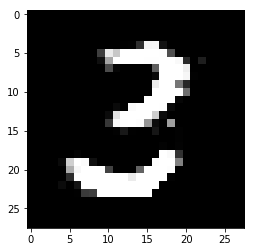

hello
Iteration {5600.000000}	G_loss {2.468101}	D_loss {0.539563}


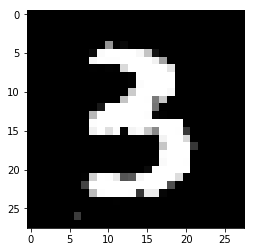

hello
Iteration {5700.000000}	G_loss {3.048962}	D_loss {0.582027}


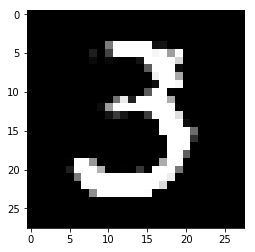

hello
Iteration {5800.000000}	G_loss {3.094160}	D_loss {0.446950}


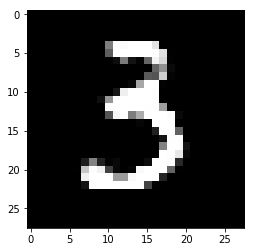

hello
Iteration {5900.000000}	G_loss {3.610825}	D_loss {0.600065}


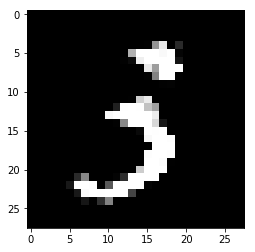

hello
Iteration {6000.000000}	G_loss {3.059996}	D_loss {0.656257}


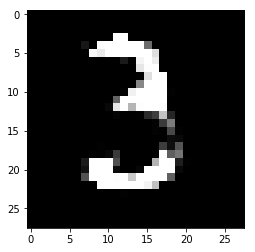

hello
Iteration {6100.000000}	G_loss {2.681468}	D_loss {0.853108}


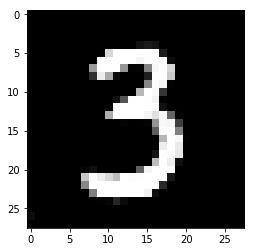

hello
Iteration {6200.000000}	G_loss {3.831590}	D_loss {0.665149}


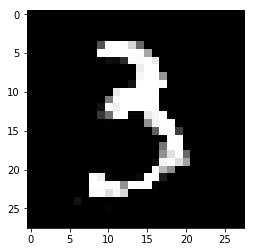

hello
Iteration {6300.000000}	G_loss {2.665295}	D_loss {0.668330}


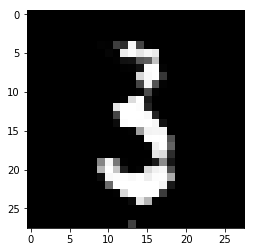

hello
Iteration {6400.000000}	G_loss {3.139911}	D_loss {0.679696}


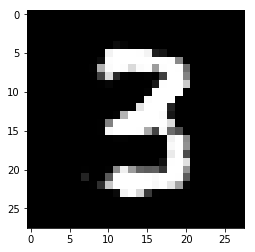

hello
Iteration {6500.000000}	G_loss {3.501685}	D_loss {0.407059}


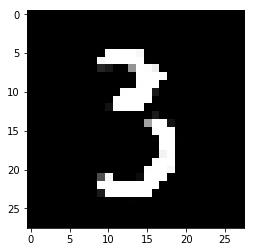

hello
Iteration {6600.000000}	G_loss {2.757496}	D_loss {0.762675}


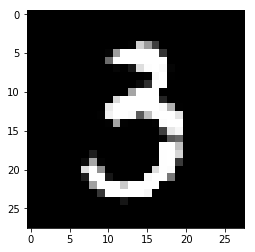

hello
Iteration {6700.000000}	G_loss {3.287548}	D_loss {0.959342}


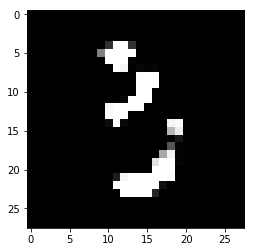

hello
Iteration {6800.000000}	G_loss {4.104433}	D_loss {0.814300}


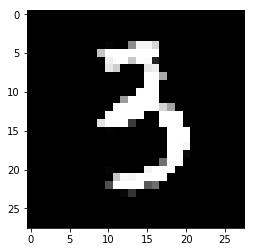

hello
Iteration {6900.000000}	G_loss {3.524431}	D_loss {0.456373}


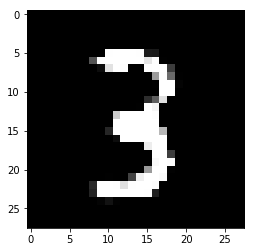

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {1.033403}	D_loss {1.532709}


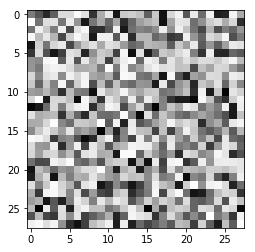

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {5.350895}	D_loss {0.037983}


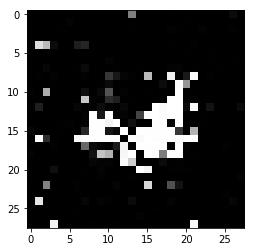

hello
Iteration {200.000000}	G_loss {5.343561}	D_loss {0.058203}


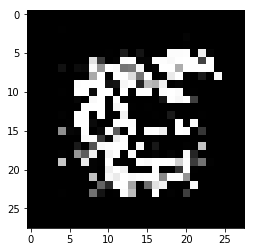

hello
Iteration {300.000000}	G_loss {6.195992}	D_loss {0.041297}


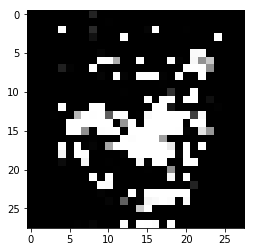

hello
Iteration {400.000000}	G_loss {8.965098}	D_loss {0.161555}


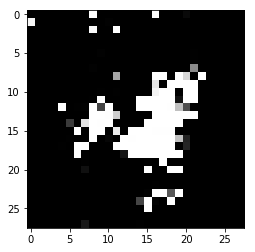

hello
Iteration {500.000000}	G_loss {9.635555}	D_loss {0.040192}


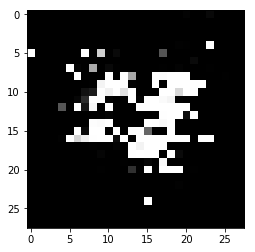

hello
Iteration {600.000000}	G_loss {7.020212}	D_loss {0.031352}


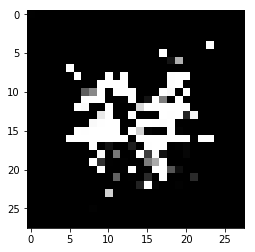

hello
Iteration {700.000000}	G_loss {6.187651}	D_loss {0.009384}


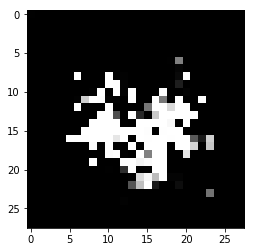

hello
Iteration {800.000000}	G_loss {7.538873}	D_loss {0.000728}


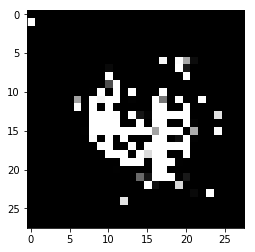

hello
Iteration {900.000000}	G_loss {6.637504}	D_loss {0.004125}


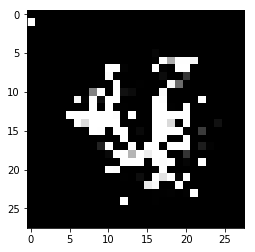

hello
Iteration {1000.000000}	G_loss {9.958053}	D_loss {0.003140}


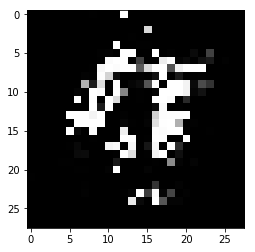

hello
Iteration {1100.000000}	G_loss {9.485590}	D_loss {0.016013}


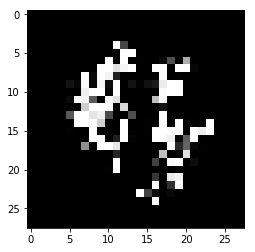

hello
Iteration {1200.000000}	G_loss {8.034225}	D_loss {0.009105}


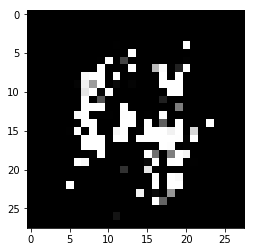

hello
Iteration {1300.000000}	G_loss {8.243072}	D_loss {0.068507}


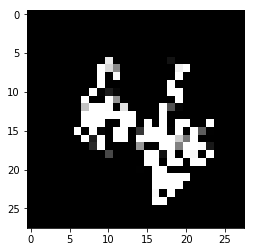

hello
Iteration {1400.000000}	G_loss {9.365880}	D_loss {0.005397}


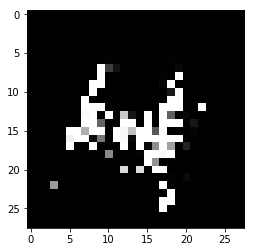

hello
Iteration {1500.000000}	G_loss {8.909944}	D_loss {0.053774}


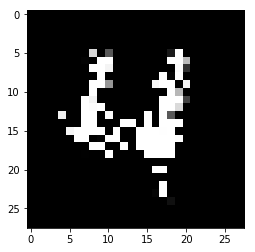

hello
Iteration {1600.000000}	G_loss {4.912376}	D_loss {0.020707}


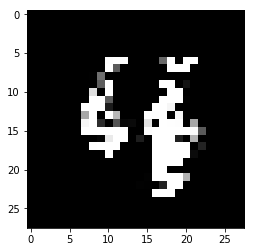

hello
Iteration {1700.000000}	G_loss {7.638393}	D_loss {0.081520}


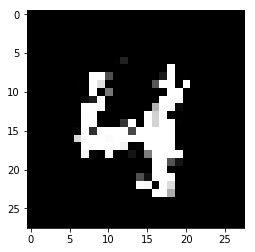

hello
Iteration {1800.000000}	G_loss {3.157515}	D_loss {0.082027}


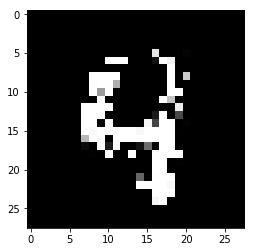

hello
Iteration {1900.000000}	G_loss {4.748280}	D_loss {0.017065}


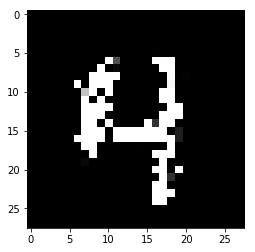

hello
Iteration {2000.000000}	G_loss {4.463964}	D_loss {0.081941}


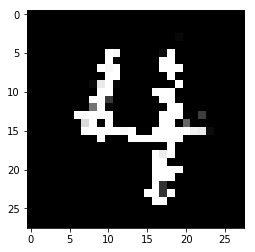

hello
Iteration {2100.000000}	G_loss {9.555168}	D_loss {0.028334}


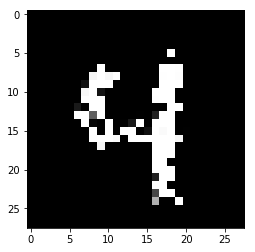

hello
Iteration {2200.000000}	G_loss {4.893620}	D_loss {0.041653}


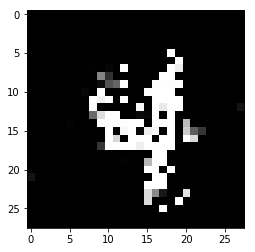

hello
Iteration {2300.000000}	G_loss {5.047933}	D_loss {0.030509}


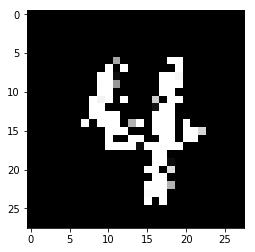

hello
Iteration {2400.000000}	G_loss {9.911255}	D_loss {0.027868}


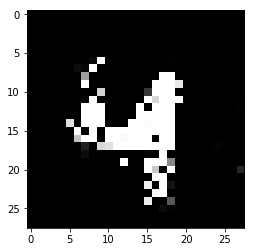

hello
Iteration {2500.000000}	G_loss {5.105943}	D_loss {0.046514}


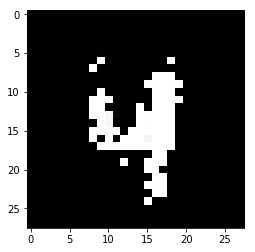

hello
Iteration {2600.000000}	G_loss {3.623878}	D_loss {0.094705}


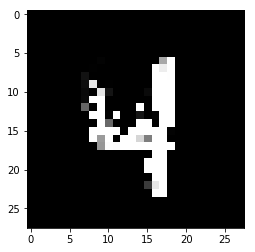

hello
Iteration {2700.000000}	G_loss {5.111024}	D_loss {0.017030}


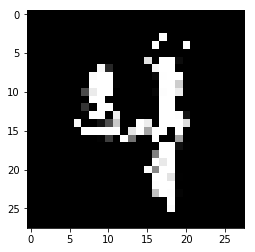

hello
Iteration {2800.000000}	G_loss {4.663315}	D_loss {0.012460}


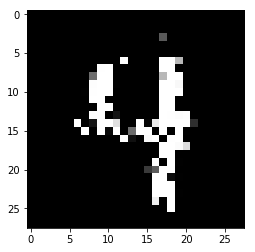

hello
Iteration {2900.000000}	G_loss {7.981033}	D_loss {0.004161}


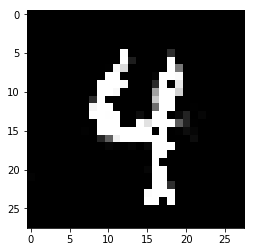

hello
Iteration {3000.000000}	G_loss {5.815283}	D_loss {0.033316}


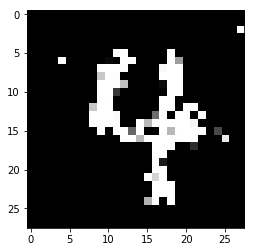

hello
Iteration {3100.000000}	G_loss {4.819634}	D_loss {0.015021}


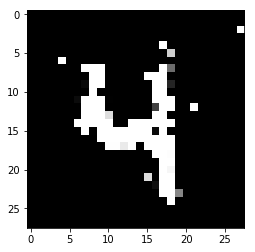

hello
Iteration {3200.000000}	G_loss {4.379591}	D_loss {0.031993}


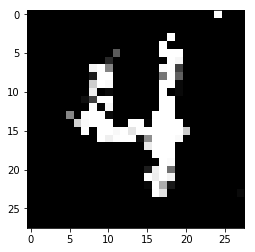

hello
Iteration {3300.000000}	G_loss {5.834742}	D_loss {0.012902}


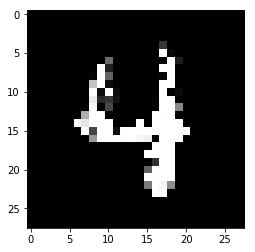

hello
Iteration {3400.000000}	G_loss {9.280405}	D_loss {0.000158}


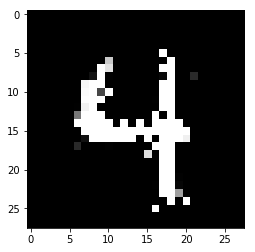

hello
Iteration {3500.000000}	G_loss {5.709596}	D_loss {0.006880}


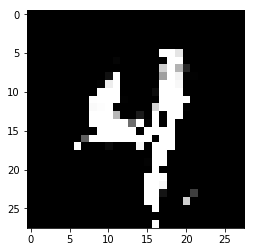

hello
Iteration {3600.000000}	G_loss {7.817766}	D_loss {0.001587}


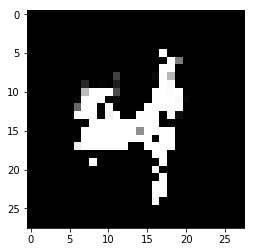

hello
Iteration {3700.000000}	G_loss {5.271325}	D_loss {0.003874}


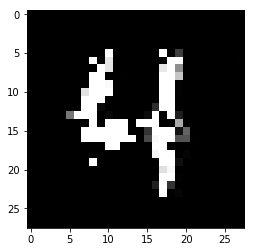

hello
Iteration {3800.000000}	G_loss {9.719486}	D_loss {0.000855}


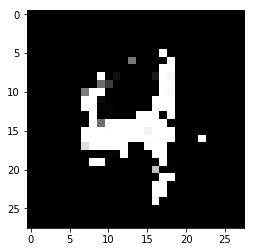

hello
Iteration {3900.000000}	G_loss {6.446035}	D_loss {0.084594}


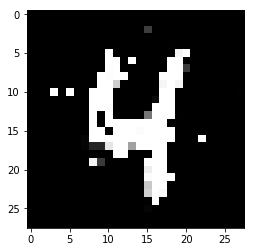

hello
Iteration {4000.000000}	G_loss {8.470610}	D_loss {0.000439}


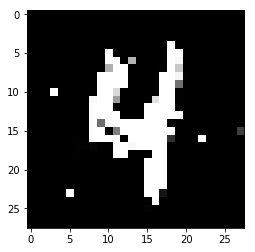

hello
Iteration {4100.000000}	G_loss {7.826726}	D_loss {0.001998}


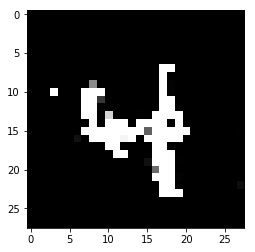

hello
Iteration {4200.000000}	G_loss {10.045503}	D_loss {0.000455}


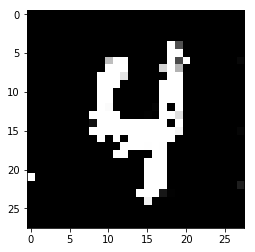

hello
Iteration {4300.000000}	G_loss {8.372163}	D_loss {0.001670}


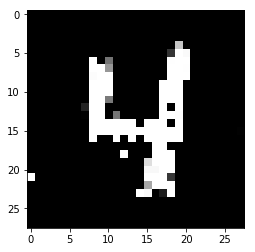

hello
Iteration {4400.000000}	G_loss {8.983036}	D_loss {0.001832}


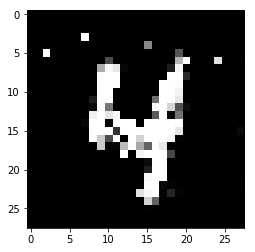

hello
Iteration {4500.000000}	G_loss {8.127338}	D_loss {0.000785}


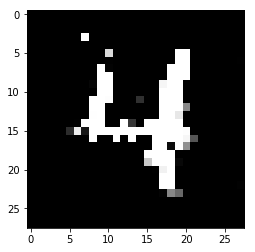

hello
Iteration {4600.000000}	G_loss {6.006827}	D_loss {0.003374}


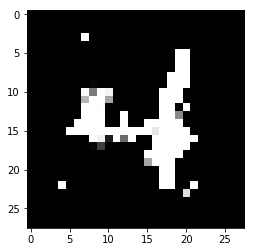

hello
Iteration {4700.000000}	G_loss {6.392783}	D_loss {0.001873}


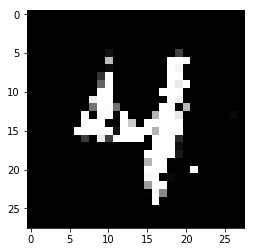

hello
Iteration {4800.000000}	G_loss {5.998170}	D_loss {0.084873}


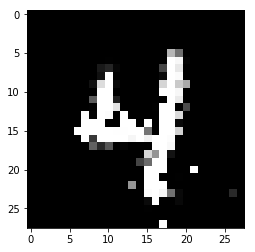

hello
Iteration {4900.000000}	G_loss {7.239236}	D_loss {0.004341}


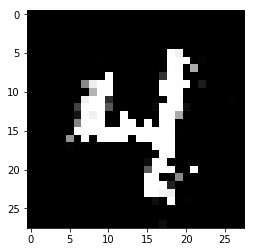

hello
Iteration {5000.000000}	G_loss {15.474863}	D_loss {0.000275}


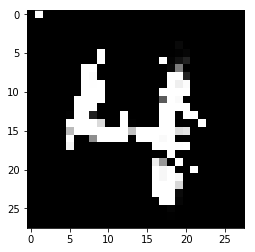

hello
Iteration {5100.000000}	G_loss {10.033998}	D_loss {0.000833}


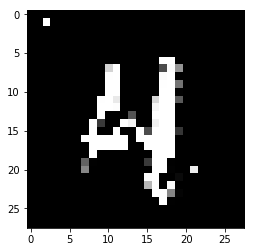

hello
Iteration {5200.000000}	G_loss {9.878881}	D_loss {0.000063}


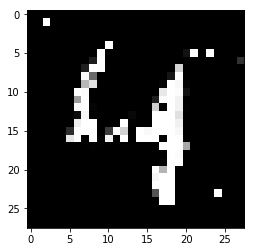

hello
Iteration {5300.000000}	G_loss {7.025172}	D_loss {0.000593}


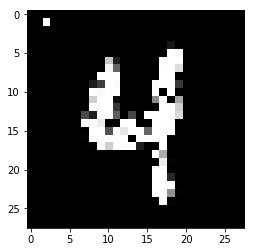

hello
Iteration {5400.000000}	G_loss {14.577959}	D_loss {0.099963}


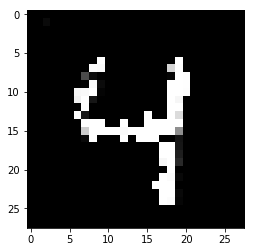

hello
Iteration {5500.000000}	G_loss {6.829907}	D_loss {0.025070}


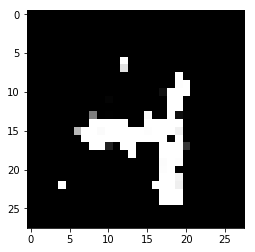

hello
Iteration {5600.000000}	G_loss {4.447191}	D_loss {0.031353}


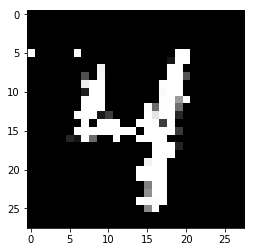

hello
Iteration {5700.000000}	G_loss {8.589602}	D_loss {0.008136}


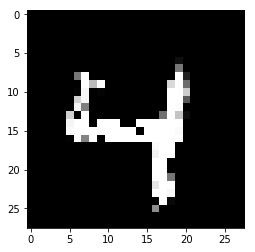

hello
Iteration {5800.000000}	G_loss {6.293850}	D_loss {0.002631}


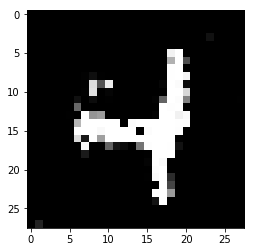

hello
Iteration {5900.000000}	G_loss {5.159629}	D_loss {0.012561}


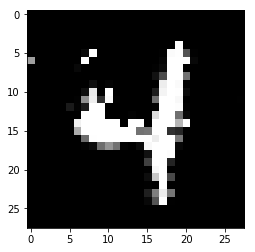

hello
Iteration {6000.000000}	G_loss {7.222297}	D_loss {0.072892}


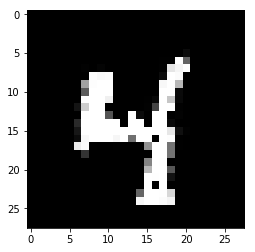

hello
Iteration {6100.000000}	G_loss {6.430940}	D_loss {0.026897}


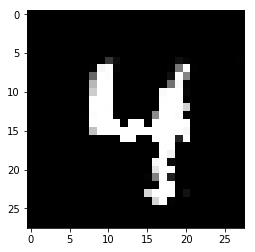

hello
Iteration {6200.000000}	G_loss {7.029229}	D_loss {0.013758}


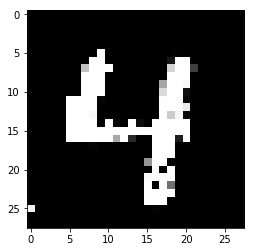

hello
Iteration {6300.000000}	G_loss {5.549877}	D_loss {0.093903}


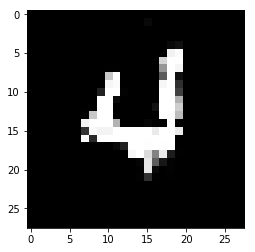

hello
Iteration {6400.000000}	G_loss {5.289311}	D_loss {0.046461}


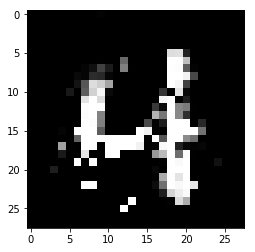

hello
Iteration {6500.000000}	G_loss {6.132781}	D_loss {0.029657}


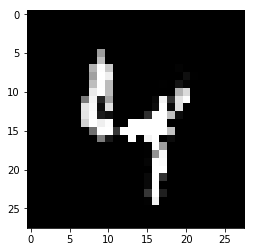

hello
Iteration {6600.000000}	G_loss {7.318345}	D_loss {0.044617}


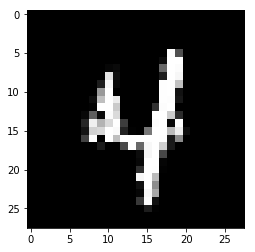

hello
Iteration {6700.000000}	G_loss {5.773943}	D_loss {0.282255}


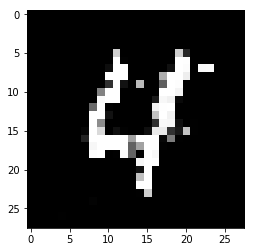

hello
Iteration {6800.000000}	G_loss {4.469171}	D_loss {0.051997}


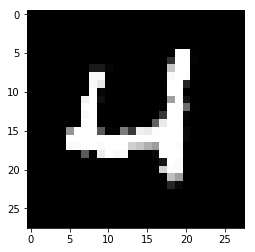

hello
Iteration {6900.000000}	G_loss {4.556044}	D_loss {0.107391}


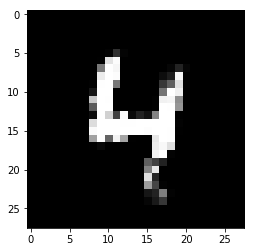

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {1.507564}	D_loss {1.545303}


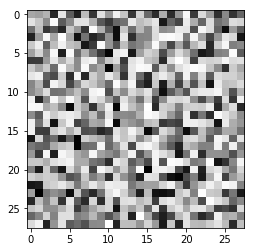

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {4.561221}	D_loss {0.090028}


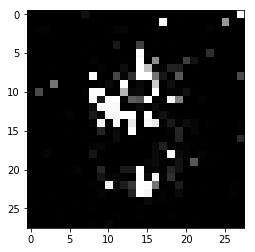

hello
Iteration {200.000000}	G_loss {2.536714}	D_loss {0.233539}


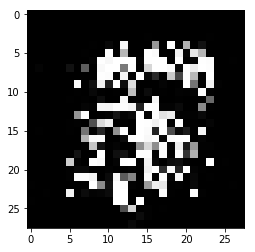

hello
Iteration {300.000000}	G_loss {5.806975}	D_loss {0.014669}


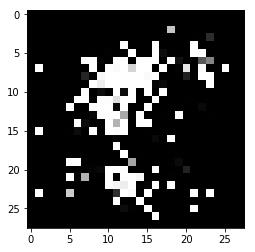

hello
Iteration {400.000000}	G_loss {8.201484}	D_loss {0.021653}


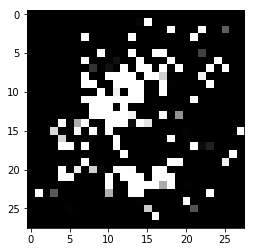

hello
Iteration {500.000000}	G_loss {10.595933}	D_loss {0.002355}


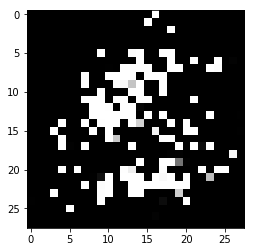

hello
Iteration {600.000000}	G_loss {7.121973}	D_loss {0.047793}


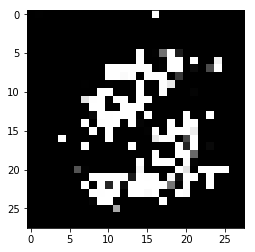

hello
Iteration {700.000000}	G_loss {5.091577}	D_loss {0.006501}


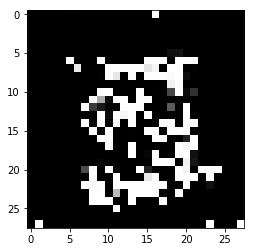

hello
Iteration {800.000000}	G_loss {6.233104}	D_loss {0.003624}


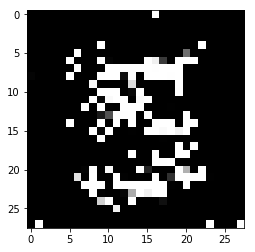

hello
Iteration {900.000000}	G_loss {5.347659}	D_loss {0.010787}


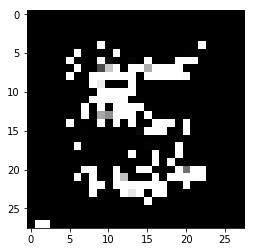

hello
Iteration {1000.000000}	G_loss {6.743563}	D_loss {0.021023}


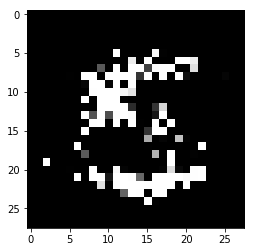

hello
Iteration {1100.000000}	G_loss {9.315974}	D_loss {0.021364}


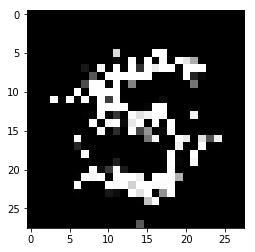

hello
Iteration {1200.000000}	G_loss {6.499763}	D_loss {0.002362}


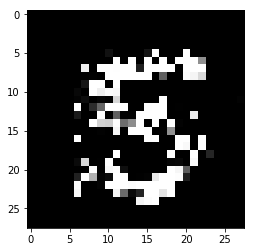

hello
Iteration {1300.000000}	G_loss {8.311383}	D_loss {0.000977}


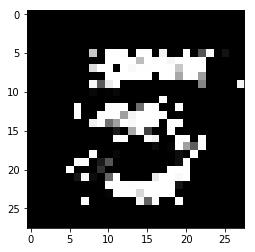

hello
Iteration {1400.000000}	G_loss {5.395588}	D_loss {0.017102}


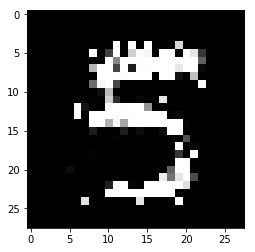

hello
Iteration {1500.000000}	G_loss {8.734038}	D_loss {0.040482}


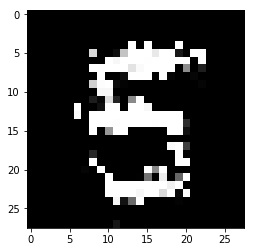

hello
Iteration {1600.000000}	G_loss {6.523894}	D_loss {0.007118}


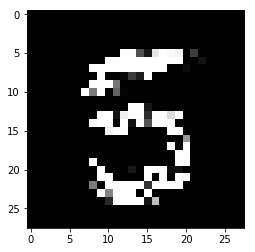

hello
Iteration {1700.000000}	G_loss {6.081280}	D_loss {0.005923}


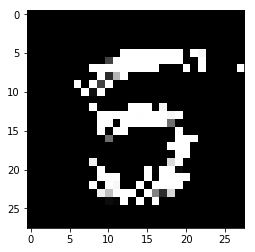

hello
Iteration {1800.000000}	G_loss {7.568065}	D_loss {0.067928}


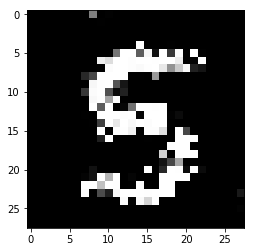

hello
Iteration {1900.000000}	G_loss {5.501761}	D_loss {0.013318}


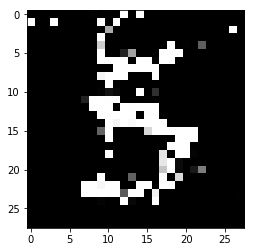

hello
Iteration {2000.000000}	G_loss {4.278332}	D_loss {0.036071}


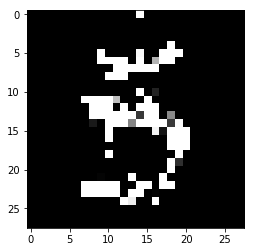

hello
Iteration {2100.000000}	G_loss {4.388376}	D_loss {0.054407}


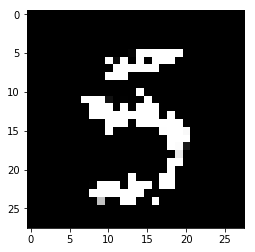

hello
Iteration {2200.000000}	G_loss {6.119539}	D_loss {0.013201}


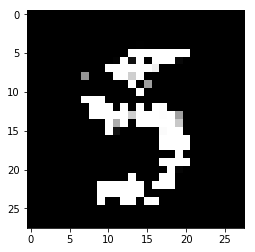

hello
Iteration {2300.000000}	G_loss {6.384323}	D_loss {0.289988}


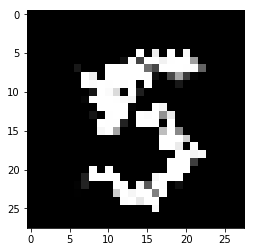

hello
Iteration {2400.000000}	G_loss {5.335371}	D_loss {0.016123}


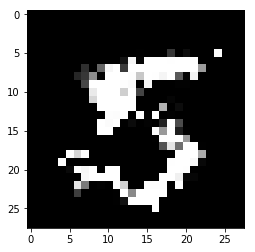

hello
Iteration {2500.000000}	G_loss {4.806721}	D_loss {0.026067}


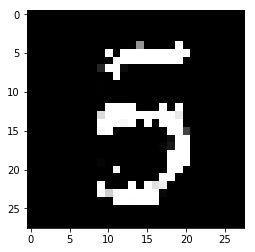

hello
Iteration {2600.000000}	G_loss {5.373266}	D_loss {0.006670}


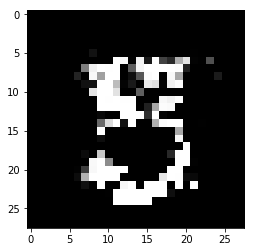

hello
Iteration {2700.000000}	G_loss {2.819472}	D_loss {0.090237}


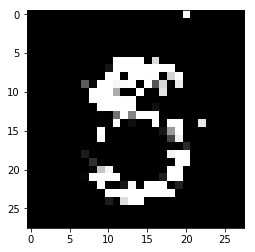

hello
Iteration {2800.000000}	G_loss {3.158662}	D_loss {0.035434}


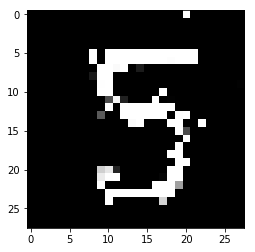

hello
Iteration {2900.000000}	G_loss {7.236049}	D_loss {0.001394}


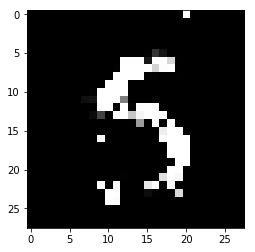

hello
Iteration {3000.000000}	G_loss {7.371364}	D_loss {0.001473}


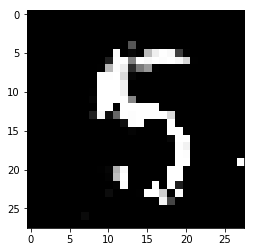

hello
Iteration {3100.000000}	G_loss {7.317780}	D_loss {0.169129}


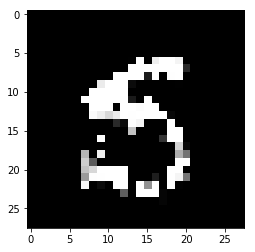

hello
Iteration {3200.000000}	G_loss {4.746596}	D_loss {0.004736}


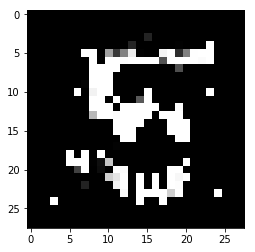

hello
Iteration {3300.000000}	G_loss {6.349472}	D_loss {0.000823}


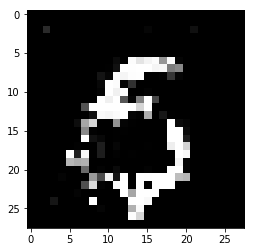

hello
Iteration {3400.000000}	G_loss {5.801964}	D_loss {0.017825}


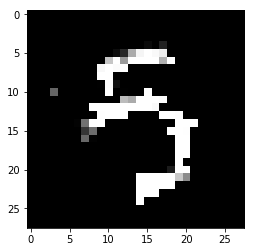

hello
Iteration {3500.000000}	G_loss {8.864079}	D_loss {0.000284}


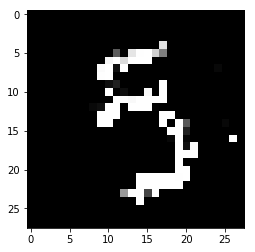

hello
Iteration {3600.000000}	G_loss {10.202295}	D_loss {0.020467}


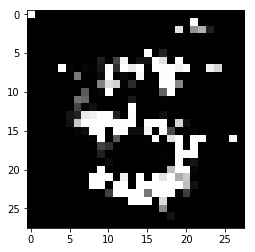

hello
Iteration {3700.000000}	G_loss {6.542688}	D_loss {0.122117}


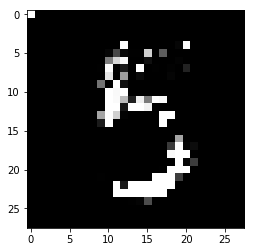

hello
Iteration {3800.000000}	G_loss {3.551805}	D_loss {0.005496}


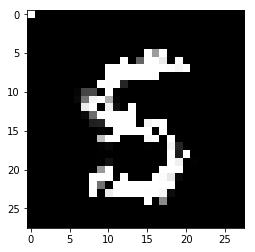

hello
Iteration {3900.000000}	G_loss {8.043936}	D_loss {0.075347}


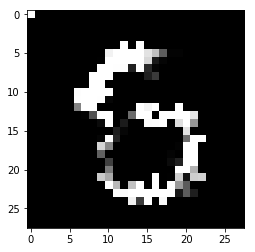

hello
Iteration {4000.000000}	G_loss {8.360813}	D_loss {0.018595}


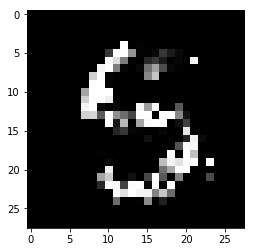

hello
Iteration {4100.000000}	G_loss {7.366085}	D_loss {0.002412}


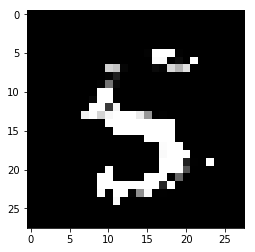

hello
Iteration {4200.000000}	G_loss {9.510282}	D_loss {0.260539}


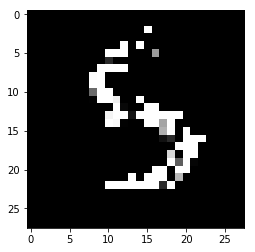

hello
Iteration {4300.000000}	G_loss {5.456634}	D_loss {0.023346}


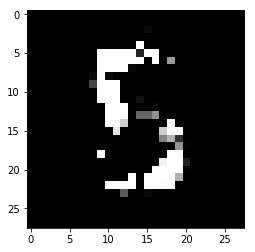

hello
Iteration {4400.000000}	G_loss {9.691990}	D_loss {0.000195}


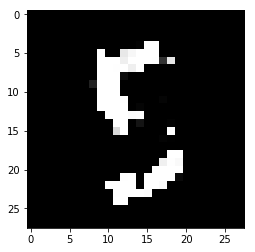

hello
Iteration {4500.000000}	G_loss {7.714844}	D_loss {0.007676}


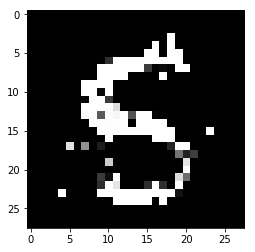

hello
Iteration {4600.000000}	G_loss {7.861291}	D_loss {0.001609}


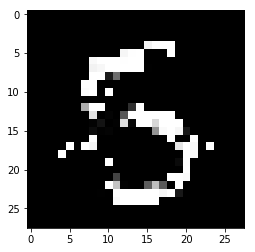

hello
Iteration {4700.000000}	G_loss {10.934177}	D_loss {0.000308}


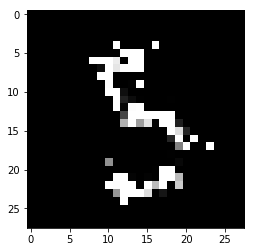

hello
Iteration {4800.000000}	G_loss {7.857159}	D_loss {0.001132}


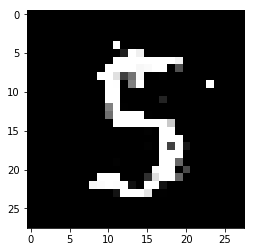

hello
Iteration {4900.000000}	G_loss {6.501691}	D_loss {0.006026}


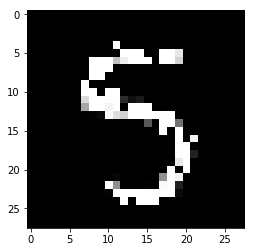

hello
Iteration {5000.000000}	G_loss {6.145060}	D_loss {0.004719}


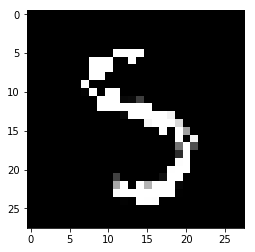

hello
Iteration {5100.000000}	G_loss {8.297188}	D_loss {0.006272}


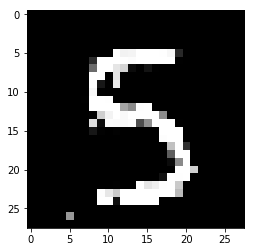

hello
Iteration {5200.000000}	G_loss {6.028244}	D_loss {0.016437}


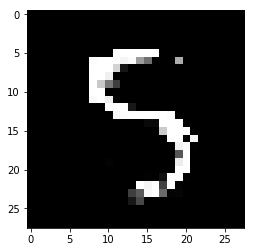

hello
Iteration {5300.000000}	G_loss {4.812276}	D_loss {0.006905}


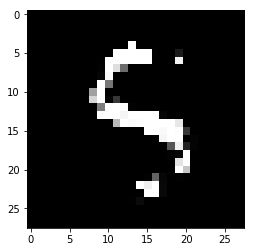

hello
Iteration {5400.000000}	G_loss {6.684106}	D_loss {0.002737}


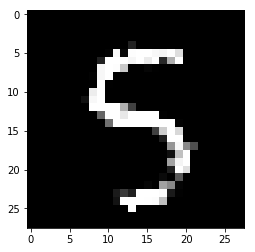

hello
Iteration {5500.000000}	G_loss {9.919519}	D_loss {0.004370}


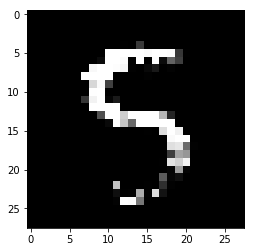

hello
Iteration {5600.000000}	G_loss {5.477487}	D_loss {0.010467}


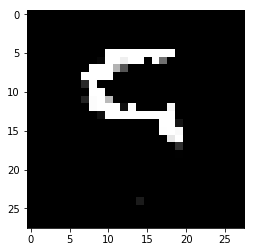

hello
Iteration {5700.000000}	G_loss {5.823039}	D_loss {0.036339}


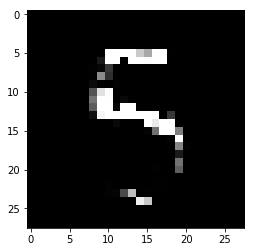

hello
Iteration {5800.000000}	G_loss {6.395562}	D_loss {0.034977}


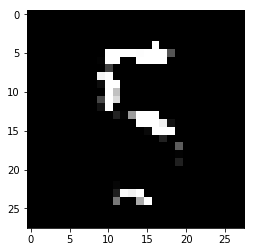

hello
Iteration {5900.000000}	G_loss {9.425591}	D_loss {0.222289}


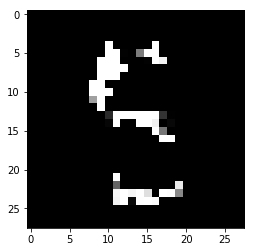

hello
Iteration {6000.000000}	G_loss {8.701576}	D_loss {0.043655}


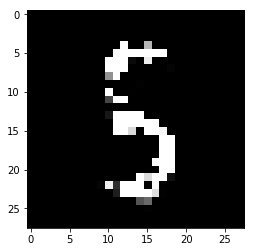

hello
Iteration {6100.000000}	G_loss {4.414959}	D_loss {0.232115}


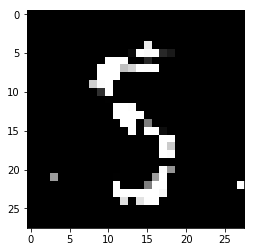

hello
Iteration {6200.000000}	G_loss {5.916768}	D_loss {0.036164}


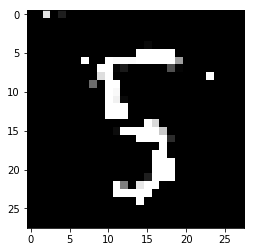

hello
Iteration {6300.000000}	G_loss {5.449444}	D_loss {0.072370}


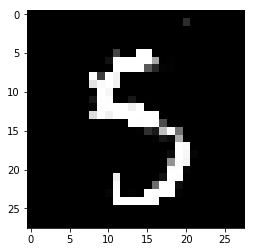

hello
Iteration {6400.000000}	G_loss {4.641898}	D_loss {0.105304}


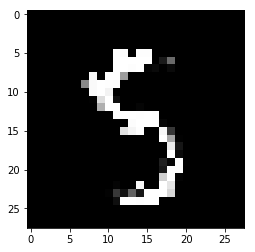

hello
Iteration {6500.000000}	G_loss {7.622771}	D_loss {0.042123}


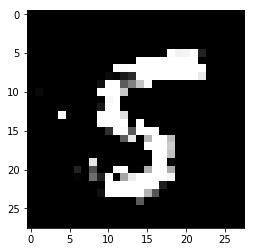

hello
Iteration {6600.000000}	G_loss {4.908166}	D_loss {0.129828}


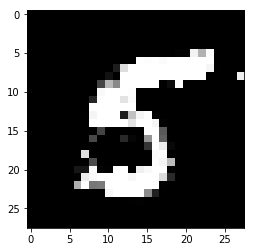

hello
Iteration {6700.000000}	G_loss {3.478775}	D_loss {0.098487}


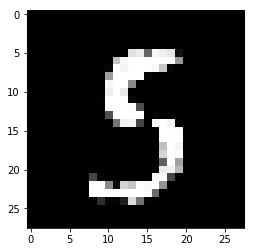

hello
Iteration {6800.000000}	G_loss {4.703134}	D_loss {0.126659}


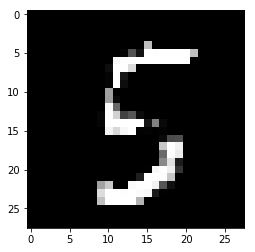

hello
Iteration {6900.000000}	G_loss {6.969738}	D_loss {0.159317}


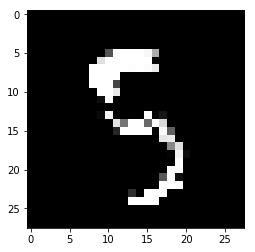

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {2.351646}	D_loss {1.417187}


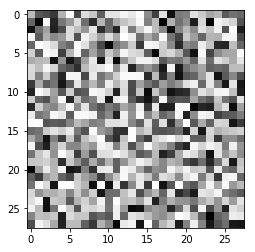

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {4.035444}	D_loss {0.049225}


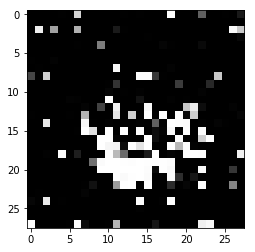

hello
Iteration {200.000000}	G_loss {4.874506}	D_loss {0.092795}


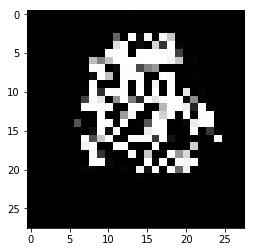

hello
Iteration {300.000000}	G_loss {7.237274}	D_loss {0.029236}


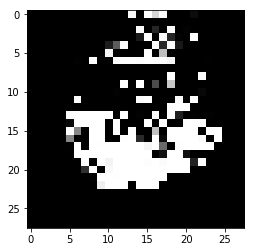

hello
Iteration {400.000000}	G_loss {10.418387}	D_loss {0.001155}


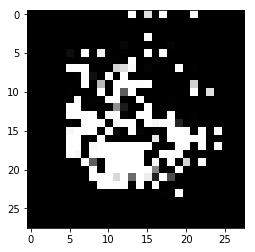

hello
Iteration {500.000000}	G_loss {8.668050}	D_loss {0.022462}


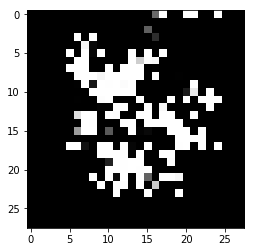

hello
Iteration {600.000000}	G_loss {13.508132}	D_loss {0.000929}


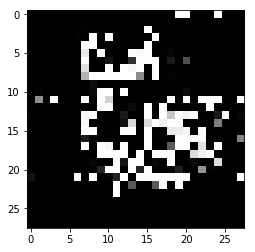

hello
Iteration {700.000000}	G_loss {9.988756}	D_loss {0.053605}


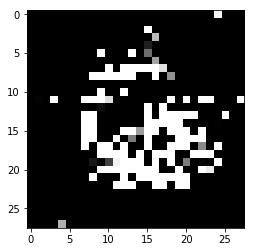

hello
Iteration {800.000000}	G_loss {6.970410}	D_loss {0.011424}


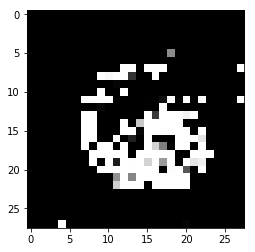

hello
Iteration {900.000000}	G_loss {8.481690}	D_loss {0.011131}


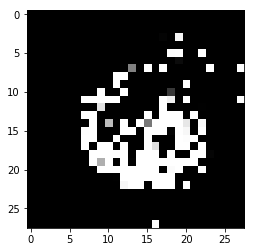

hello
Iteration {1000.000000}	G_loss {7.074641}	D_loss {0.013658}


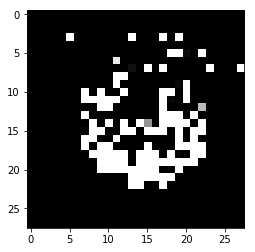

hello
Iteration {1100.000000}	G_loss {9.299155}	D_loss {0.000471}


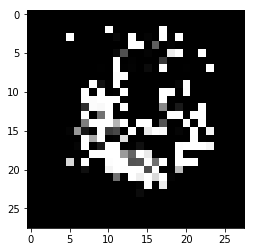

hello
Iteration {1200.000000}	G_loss {9.437682}	D_loss {0.004328}


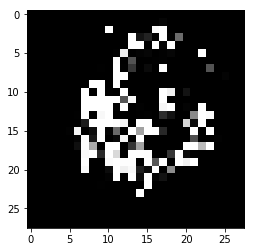

hello
Iteration {1300.000000}	G_loss {7.478257}	D_loss {0.022307}


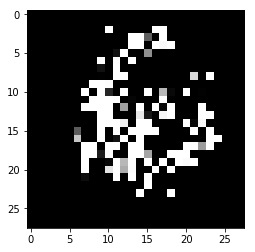

hello
Iteration {1400.000000}	G_loss {3.705158}	D_loss {0.115414}


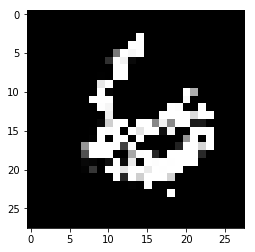

hello
Iteration {1500.000000}	G_loss {5.328686}	D_loss {0.154871}


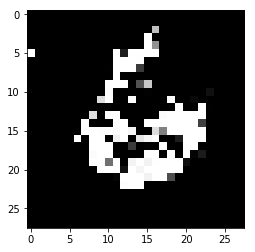

hello
Iteration {1600.000000}	G_loss {7.545173}	D_loss {0.102661}


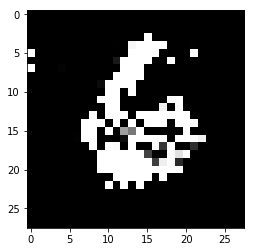

hello
Iteration {1700.000000}	G_loss {10.585898}	D_loss {0.016338}


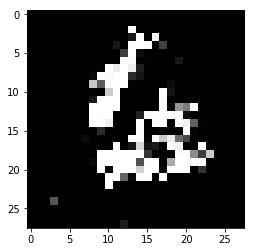

hello
Iteration {1800.000000}	G_loss {10.264563}	D_loss {0.000956}


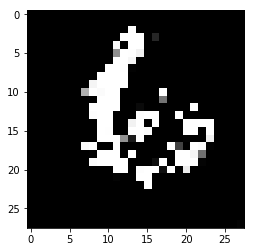

hello
Iteration {1900.000000}	G_loss {7.447059}	D_loss {0.003031}


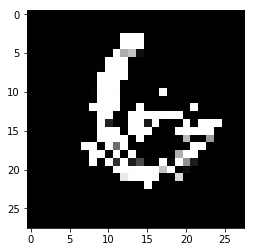

hello
Iteration {2000.000000}	G_loss {6.167800}	D_loss {0.021230}


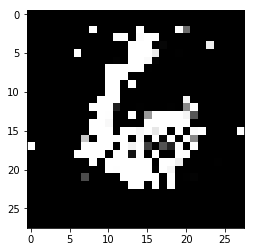

hello
Iteration {2100.000000}	G_loss {4.652843}	D_loss {0.085517}


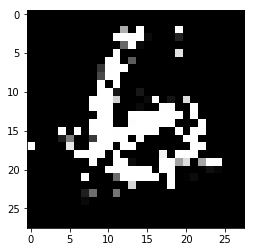

hello
Iteration {2200.000000}	G_loss {9.971602}	D_loss {0.000342}


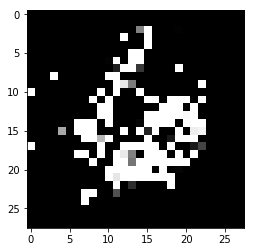

hello
Iteration {2300.000000}	G_loss {7.439466}	D_loss {0.020852}


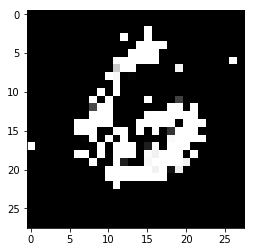

hello
Iteration {2400.000000}	G_loss {9.228366}	D_loss {0.005032}


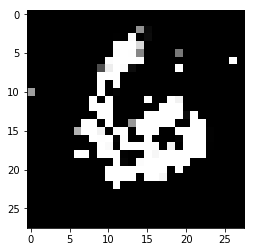

hello
Iteration {2500.000000}	G_loss {7.853175}	D_loss {0.076508}


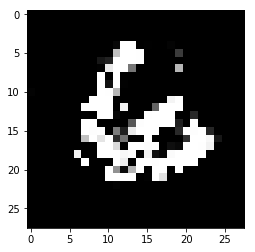

hello
Iteration {2600.000000}	G_loss {6.959527}	D_loss {0.007636}


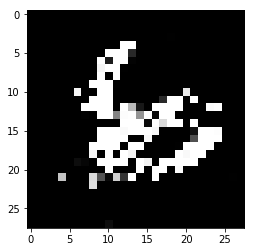

hello
Iteration {2700.000000}	G_loss {5.463722}	D_loss {0.023177}


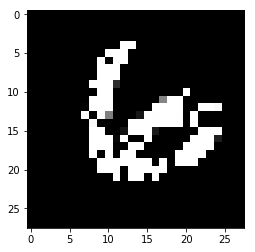

hello
Iteration {2800.000000}	G_loss {5.438439}	D_loss {0.021250}


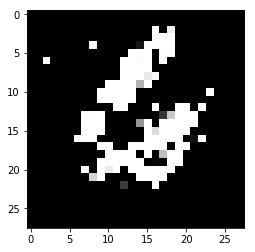

hello
Iteration {2900.000000}	G_loss {4.261415}	D_loss {0.010560}


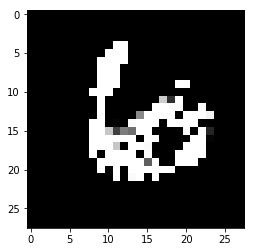

hello
Iteration {3000.000000}	G_loss {13.188946}	D_loss {0.000309}


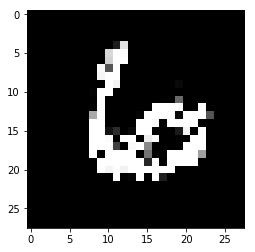

hello
Iteration {3100.000000}	G_loss {6.018262}	D_loss {0.024018}


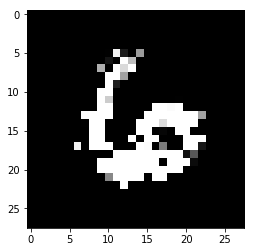

hello
Iteration {3200.000000}	G_loss {5.419237}	D_loss {0.017962}


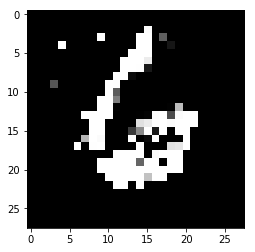

hello
Iteration {3300.000000}	G_loss {6.585851}	D_loss {0.004759}


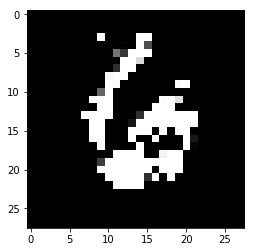

hello
Iteration {3400.000000}	G_loss {6.476426}	D_loss {0.026322}


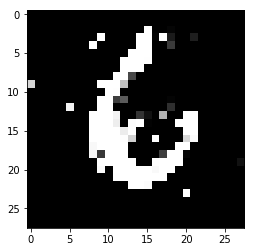

hello
Iteration {3500.000000}	G_loss {9.817242}	D_loss {0.000247}


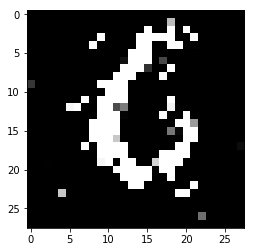

hello
Iteration {3600.000000}	G_loss {5.937329}	D_loss {0.006674}


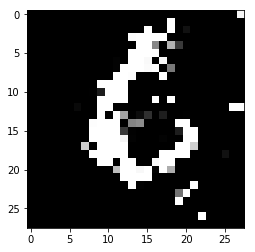

hello
Iteration {3700.000000}	G_loss {7.028401}	D_loss {0.008896}


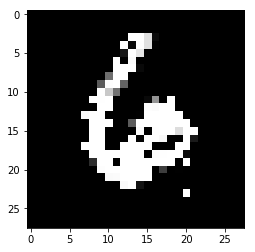

hello
Iteration {3800.000000}	G_loss {5.906614}	D_loss {0.016500}


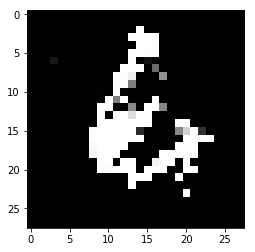

hello
Iteration {3900.000000}	G_loss {9.037029}	D_loss {0.000304}


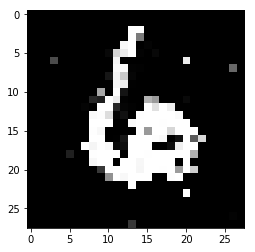

hello
Iteration {4000.000000}	G_loss {6.968306}	D_loss {0.004534}


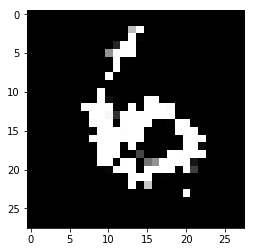

hello
Iteration {4100.000000}	G_loss {8.954584}	D_loss {0.011760}


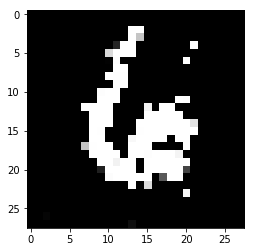

hello
Iteration {4200.000000}	G_loss {7.369067}	D_loss {0.012928}


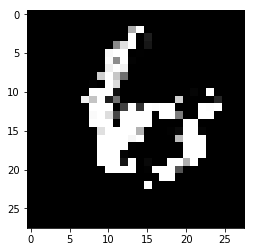

hello
Iteration {4300.000000}	G_loss {6.530191}	D_loss {0.016274}


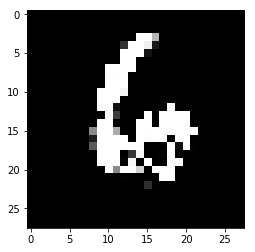

hello
Iteration {4400.000000}	G_loss {7.567808}	D_loss {0.002134}


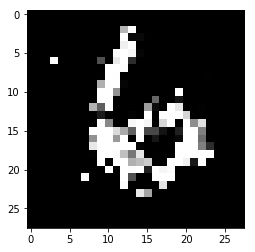

hello
Iteration {4500.000000}	G_loss {6.783276}	D_loss {0.002912}


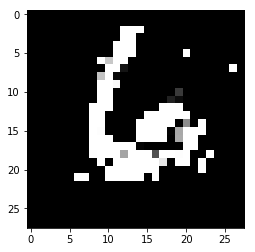

hello
Iteration {4600.000000}	G_loss {20.353741}	D_loss {0.693590}


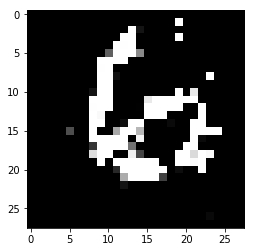

hello
Iteration {4700.000000}	G_loss {4.058110}	D_loss {0.010952}


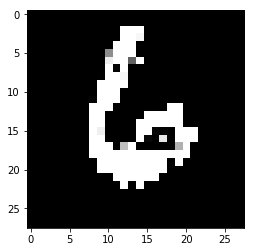

hello
Iteration {4800.000000}	G_loss {9.369630}	D_loss {0.035719}


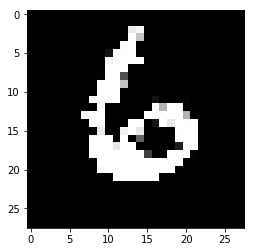

hello
Iteration {4900.000000}	G_loss {6.612883}	D_loss {0.012008}


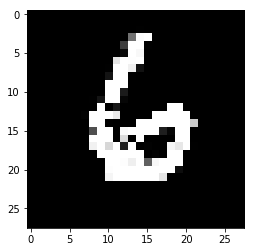

hello
Iteration {5000.000000}	G_loss {5.414697}	D_loss {0.032434}


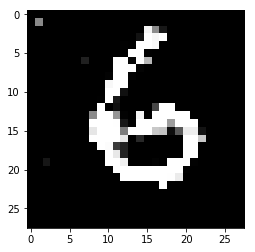

hello
Iteration {5100.000000}	G_loss {4.478301}	D_loss {0.010031}


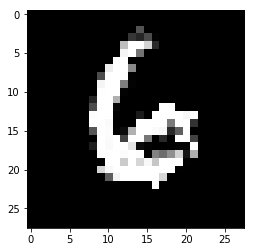

hello
Iteration {5200.000000}	G_loss {6.834514}	D_loss {0.011686}


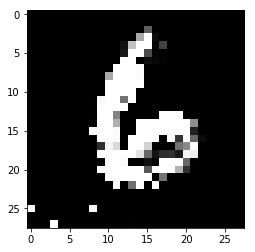

hello
Iteration {5300.000000}	G_loss {5.438856}	D_loss {0.014322}


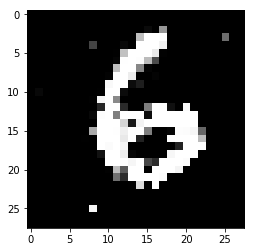

hello
Iteration {5400.000000}	G_loss {8.589480}	D_loss {0.118674}


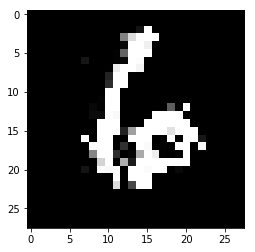

hello
Iteration {5500.000000}	G_loss {6.620280}	D_loss {0.002682}


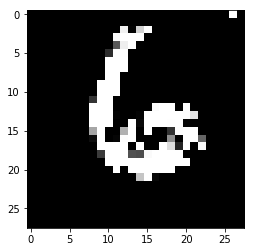

hello
Iteration {5600.000000}	G_loss {4.641117}	D_loss {0.013602}


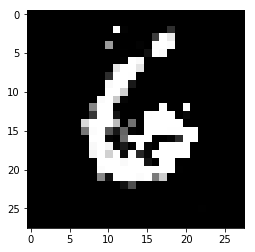

hello
Iteration {5700.000000}	G_loss {7.111154}	D_loss {0.004823}


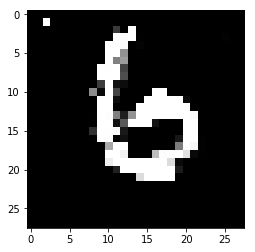

hello
Iteration {5800.000000}	G_loss {6.219191}	D_loss {0.007041}


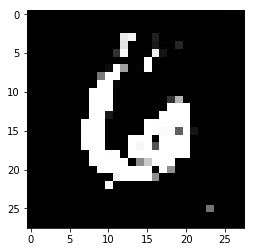

hello
Iteration {5900.000000}	G_loss {4.493892}	D_loss {0.019170}


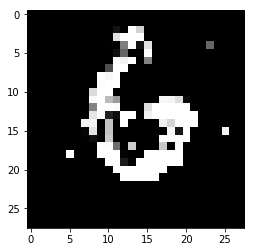

hello
Iteration {6000.000000}	G_loss {4.348168}	D_loss {0.019756}


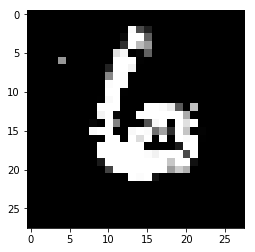

hello
Iteration {6100.000000}	G_loss {4.725212}	D_loss {0.067121}


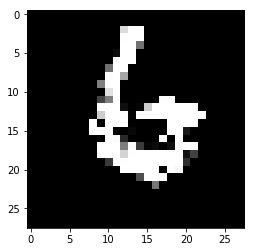

hello
Iteration {6200.000000}	G_loss {7.416299}	D_loss {0.014977}


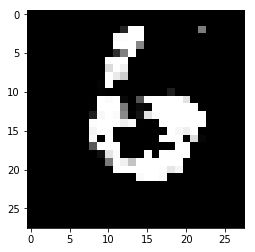

hello
Iteration {6300.000000}	G_loss {4.329770}	D_loss {0.032631}


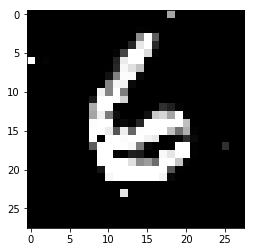

hello
Iteration {6400.000000}	G_loss {5.202217}	D_loss {0.035518}


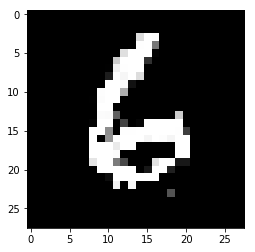

hello
Iteration {6500.000000}	G_loss {5.952222}	D_loss {0.094395}


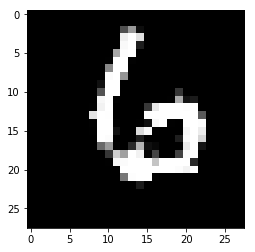

hello
Iteration {6600.000000}	G_loss {7.684021}	D_loss {0.511413}


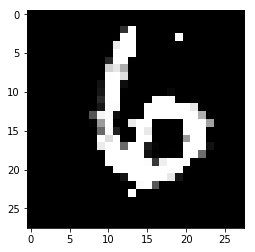

hello
Iteration {6700.000000}	G_loss {4.579198}	D_loss {0.189600}


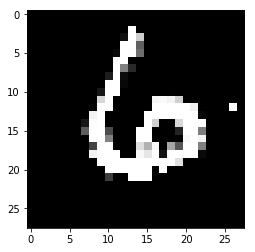

hello
Iteration {6800.000000}	G_loss {1.025255}	D_loss {0.968116}


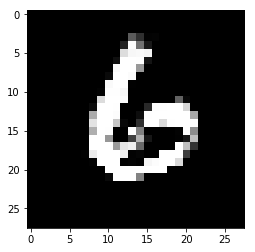

hello
Iteration {6900.000000}	G_loss {5.475569}	D_loss {0.094751}


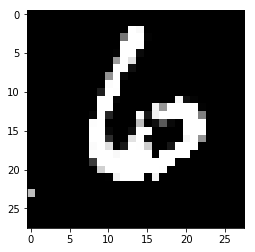

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {1.932807}	D_loss {2.769727}


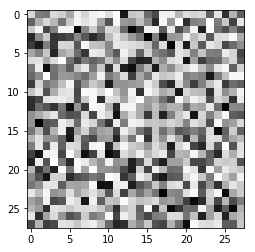

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {4.934609}	D_loss {0.133518}


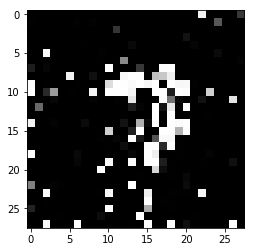

hello
Iteration {200.000000}	G_loss {5.553335}	D_loss {0.029980}


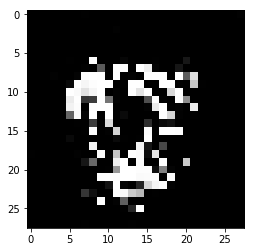

hello
Iteration {300.000000}	G_loss {6.220097}	D_loss {0.059858}


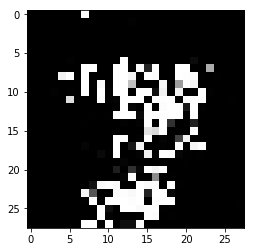

hello
Iteration {400.000000}	G_loss {7.631138}	D_loss {0.007068}


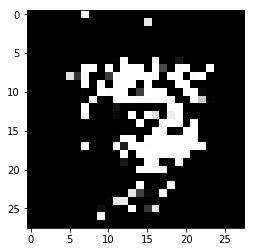

hello
Iteration {500.000000}	G_loss {9.250642}	D_loss {0.000110}


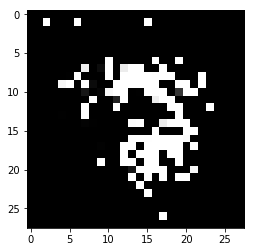

hello
Iteration {600.000000}	G_loss {10.142488}	D_loss {0.004554}


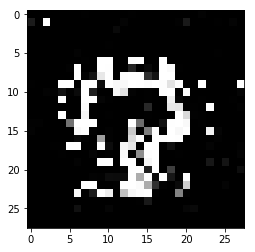

hello
Iteration {700.000000}	G_loss {8.641397}	D_loss {0.011250}


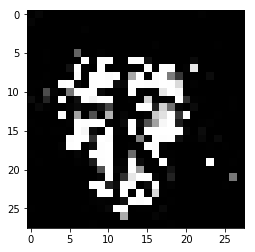

hello
Iteration {800.000000}	G_loss {5.921980}	D_loss {0.013250}


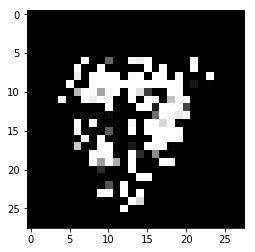

hello
Iteration {900.000000}	G_loss {7.371110}	D_loss {0.008131}


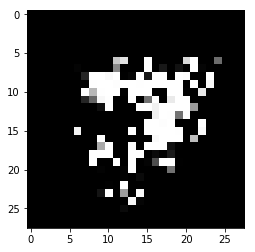

hello
Iteration {1000.000000}	G_loss {5.235558}	D_loss {0.091296}


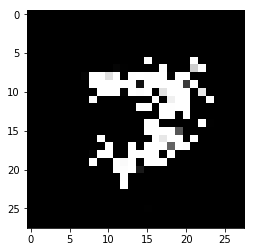

hello
Iteration {1100.000000}	G_loss {5.009259}	D_loss {0.033478}


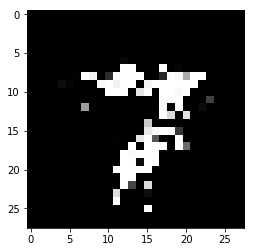

hello
Iteration {1200.000000}	G_loss {7.337814}	D_loss {0.070490}


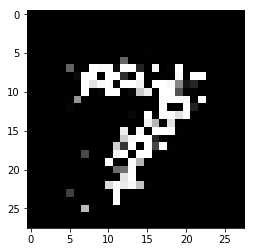

hello
Iteration {1300.000000}	G_loss {6.060024}	D_loss {0.082410}


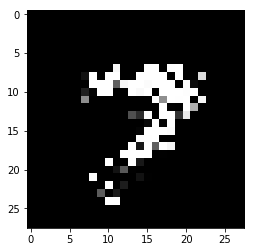

hello
Iteration {1400.000000}	G_loss {8.545129}	D_loss {0.150733}


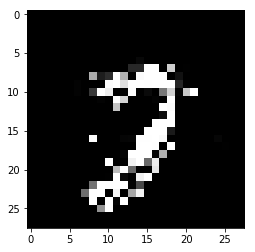

hello
Iteration {1500.000000}	G_loss {8.363797}	D_loss {0.003136}


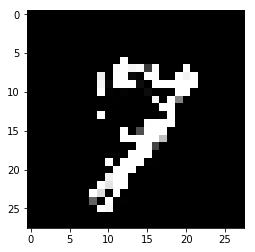

hello
Iteration {1600.000000}	G_loss {6.582971}	D_loss {0.006649}


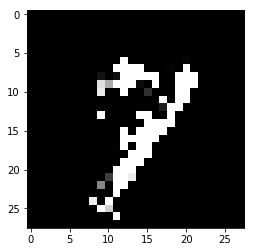

hello
Iteration {1700.000000}	G_loss {5.246746}	D_loss {0.024661}


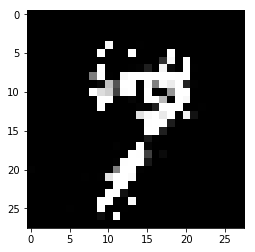

hello
Iteration {1800.000000}	G_loss {5.739990}	D_loss {0.004353}


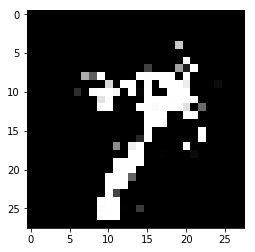

hello
Iteration {1900.000000}	G_loss {11.675755}	D_loss {0.105427}


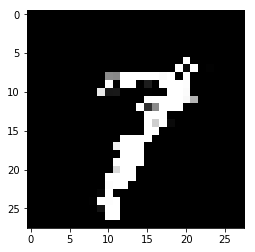

hello
Iteration {2000.000000}	G_loss {8.173805}	D_loss {0.001819}


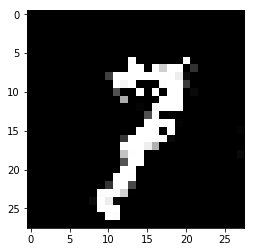

hello
Iteration {2100.000000}	G_loss {6.732038}	D_loss {0.027591}


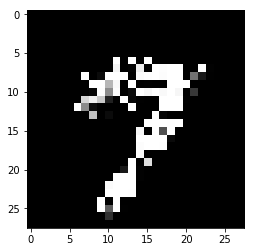

hello
Iteration {2200.000000}	G_loss {7.196258}	D_loss {0.004626}


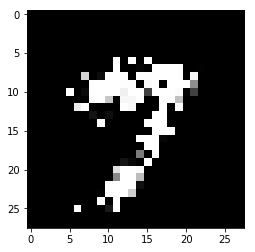

hello
Iteration {2300.000000}	G_loss {5.670240}	D_loss {0.005297}


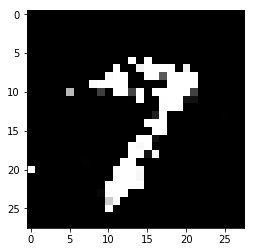

hello
Iteration {2400.000000}	G_loss {5.287356}	D_loss {0.016884}


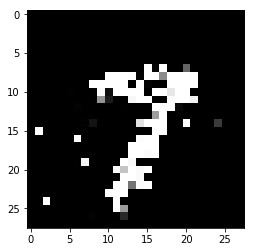

hello
Iteration {2500.000000}	G_loss {5.331081}	D_loss {0.022005}


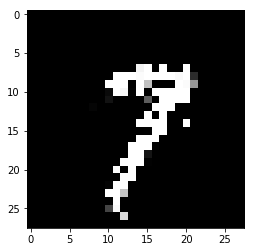

hello
Iteration {2600.000000}	G_loss {6.331809}	D_loss {0.009663}


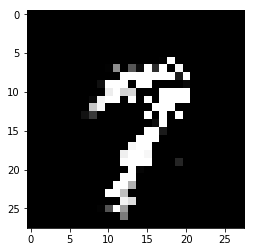

hello
Iteration {2700.000000}	G_loss {7.641371}	D_loss {0.001308}


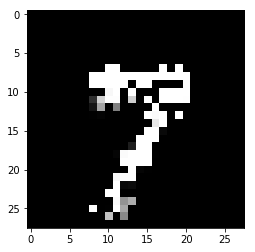

hello
Iteration {2800.000000}	G_loss {6.440734}	D_loss {0.003484}


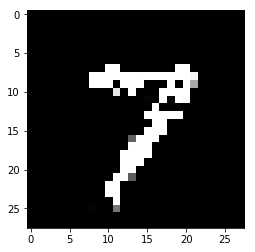

hello
Iteration {2900.000000}	G_loss {7.169798}	D_loss {0.002292}


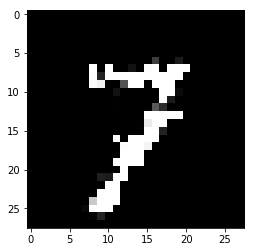

hello
Iteration {3000.000000}	G_loss {7.716645}	D_loss {0.002512}


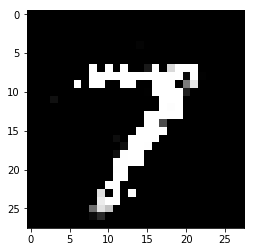

hello
Iteration {3100.000000}	G_loss {6.348581}	D_loss {0.016020}


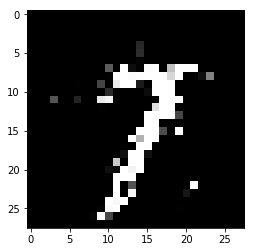

hello
Iteration {3200.000000}	G_loss {5.425990}	D_loss {0.008215}


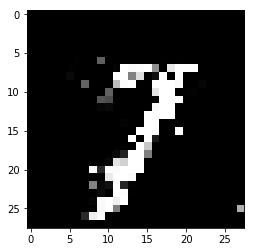

hello
Iteration {3300.000000}	G_loss {6.843843}	D_loss {0.001773}


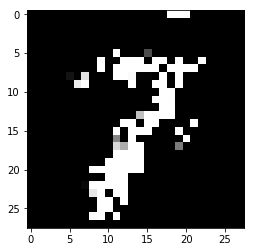

hello
Iteration {3400.000000}	G_loss {4.892337}	D_loss {0.003695}


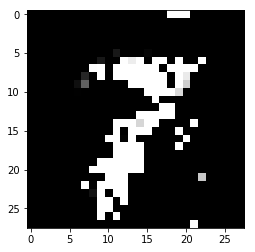

hello
Iteration {3500.000000}	G_loss {7.039363}	D_loss {0.002127}


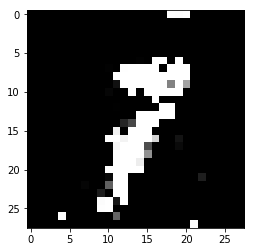

hello
Iteration {3600.000000}	G_loss {7.766296}	D_loss {0.000699}


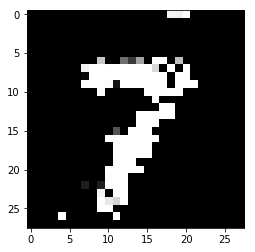

hello
Iteration {3700.000000}	G_loss {12.079790}	D_loss {0.000176}


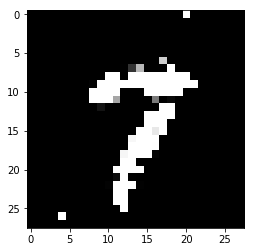

hello
Iteration {3800.000000}	G_loss {6.851816}	D_loss {0.000169}


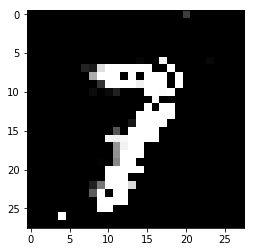

hello
Iteration {3900.000000}	G_loss {4.836445}	D_loss {0.036281}


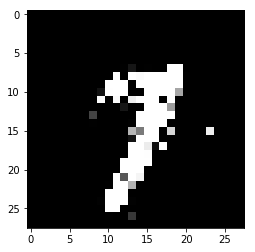

hello
Iteration {4000.000000}	G_loss {5.779394}	D_loss {0.004801}


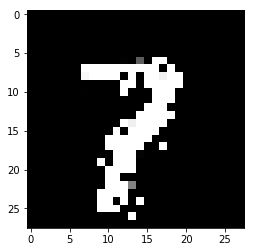

hello
Iteration {4100.000000}	G_loss {8.856363}	D_loss {0.065054}


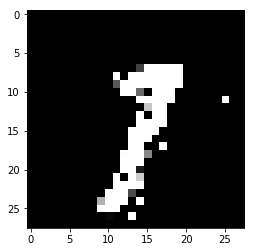

hello
Iteration {4200.000000}	G_loss {7.700060}	D_loss {0.000615}


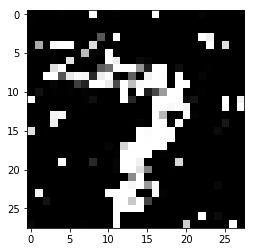

hello
Iteration {4300.000000}	G_loss {7.123617}	D_loss {0.003082}


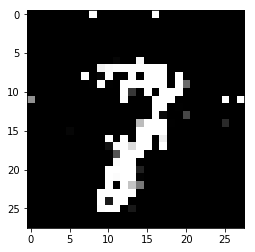

hello
Iteration {4400.000000}	G_loss {8.183271}	D_loss {0.002556}


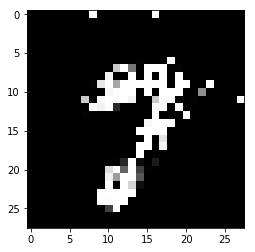

hello
Iteration {4500.000000}	G_loss {7.839065}	D_loss {0.000844}


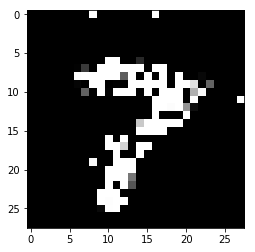

hello
Iteration {4600.000000}	G_loss {9.341499}	D_loss {0.003372}


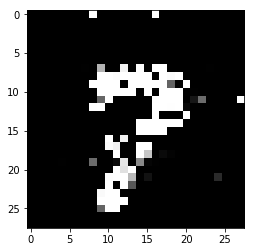

hello
Iteration {4700.000000}	G_loss {8.269925}	D_loss {0.000704}


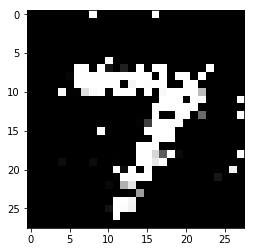

hello
Iteration {4800.000000}	G_loss {9.983414}	D_loss {0.003002}


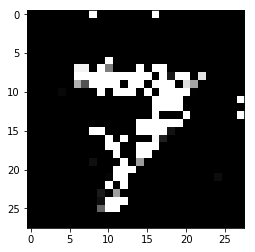

hello
Iteration {4900.000000}	G_loss {11.276222}	D_loss {0.000230}


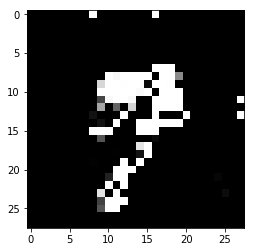

hello
Iteration {5000.000000}	G_loss {7.670805}	D_loss {0.001296}


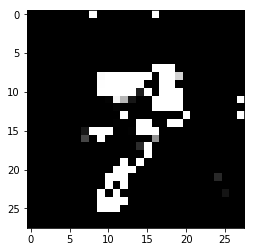

hello
Iteration {5100.000000}	G_loss {9.510735}	D_loss {0.000193}


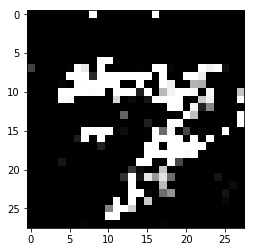

hello
Iteration {5200.000000}	G_loss {11.636626}	D_loss {0.000027}


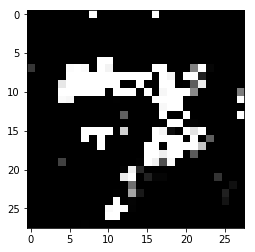

hello
Iteration {5300.000000}	G_loss {10.302686}	D_loss {0.000319}


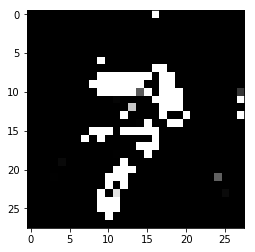

hello
Iteration {5400.000000}	G_loss {10.767727}	D_loss {0.000575}


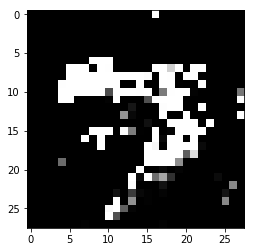

hello
Iteration {5500.000000}	G_loss {10.959860}	D_loss {0.000034}


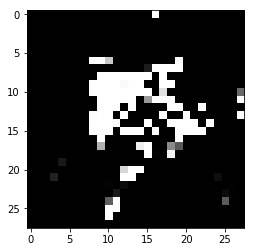

hello
Iteration {5600.000000}	G_loss {10.745840}	D_loss {0.000039}


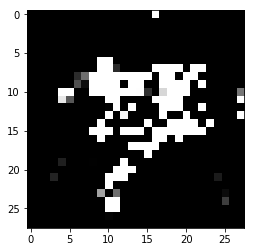

hello
Iteration {5700.000000}	G_loss {10.467646}	D_loss {0.000050}


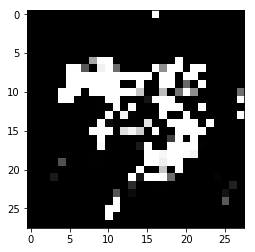

hello
Iteration {5800.000000}	G_loss {10.662715}	D_loss {0.000147}


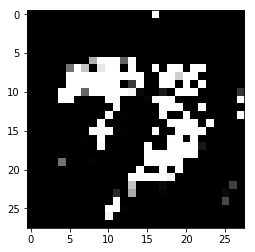

hello
Iteration {5900.000000}	G_loss {11.282864}	D_loss {0.000037}


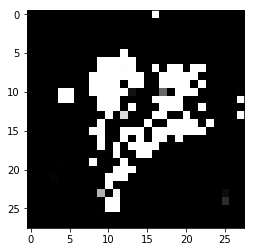

hello
Iteration {6000.000000}	G_loss {11.070071}	D_loss {0.001138}


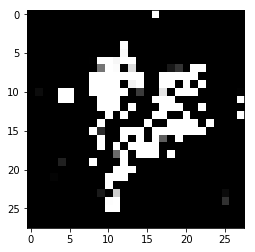

hello
Iteration {6100.000000}	G_loss {12.275403}	D_loss {0.000651}


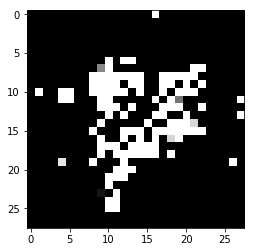

hello
Iteration {6200.000000}	G_loss {13.958019}	D_loss {0.000006}


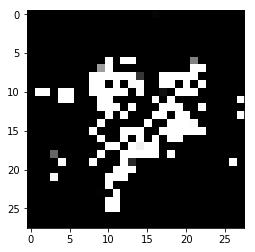

hello
Iteration {6300.000000}	G_loss {11.353301}	D_loss {0.000087}


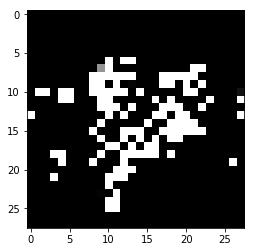

hello
Iteration {6400.000000}	G_loss {10.406650}	D_loss {0.000095}


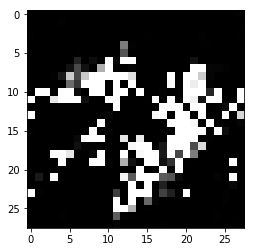

hello
Iteration {6500.000000}	G_loss {11.798434}	D_loss {0.000067}


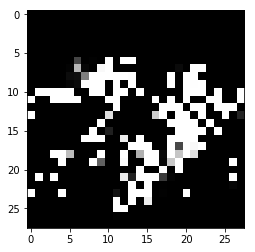

hello
Iteration {6600.000000}	G_loss {12.442898}	D_loss {0.000107}


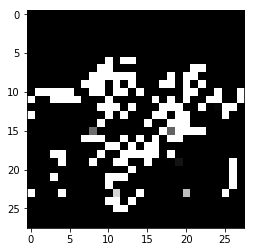

hello
Iteration {6700.000000}	G_loss {28.261269}	D_loss {0.000089}


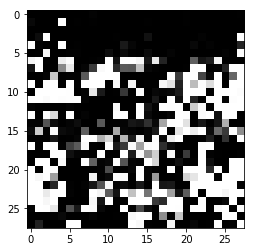

hello
Iteration {6800.000000}	G_loss {22.955772}	D_loss {0.000073}


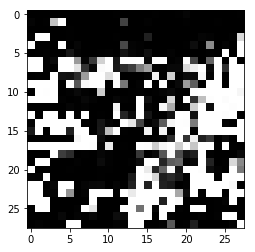

hello
Iteration {6900.000000}	G_loss {14.894361}	D_loss {0.000035}


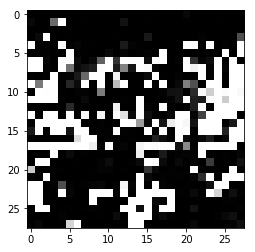

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {0.279791}	D_loss {1.234103}


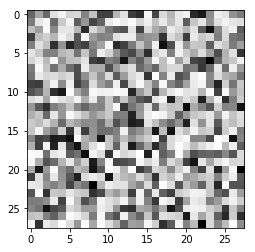

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {2.795551}	D_loss {0.120108}


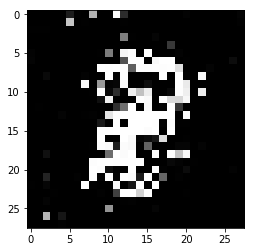

hello
Iteration {200.000000}	G_loss {5.603814}	D_loss {0.655221}


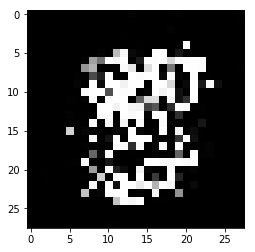

hello
Iteration {300.000000}	G_loss {6.144879}	D_loss {0.067803}


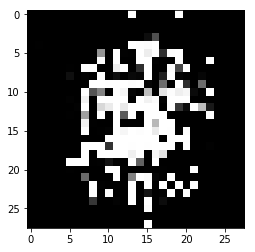

hello
Iteration {400.000000}	G_loss {6.437690}	D_loss {0.015110}


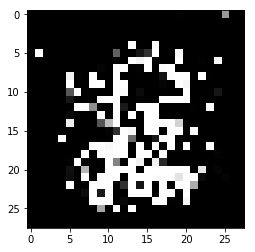

hello
Iteration {500.000000}	G_loss {5.490396}	D_loss {0.044653}


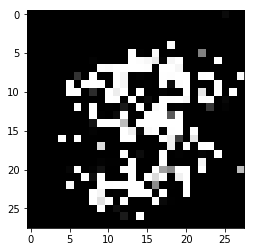

hello
Iteration {600.000000}	G_loss {4.948279}	D_loss {0.025472}


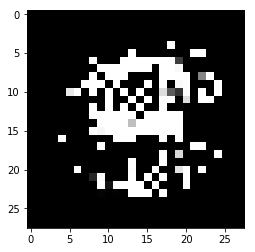

hello
Iteration {700.000000}	G_loss {7.679266}	D_loss {0.037928}


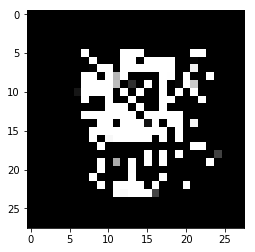

hello
Iteration {800.000000}	G_loss {7.237381}	D_loss {0.020216}


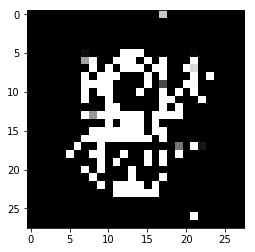

hello
Iteration {900.000000}	G_loss {7.851257}	D_loss {0.006035}


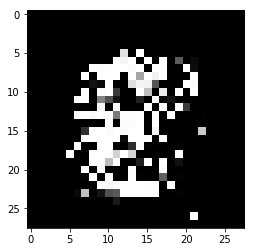

hello
Iteration {1000.000000}	G_loss {5.202272}	D_loss {0.055725}


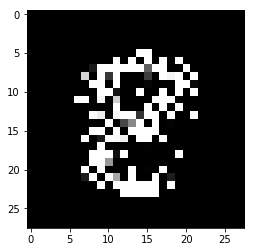

hello
Iteration {1100.000000}	G_loss {5.501510}	D_loss {0.020605}


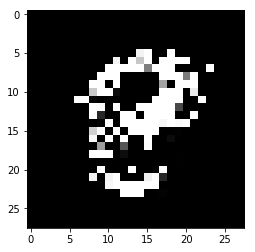

hello
Iteration {1200.000000}	G_loss {5.045743}	D_loss {0.014738}


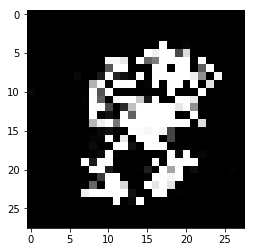

hello
Iteration {1300.000000}	G_loss {3.935188}	D_loss {0.030695}


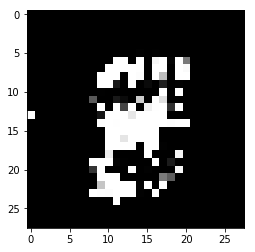

hello
Iteration {1400.000000}	G_loss {6.884861}	D_loss {0.023000}


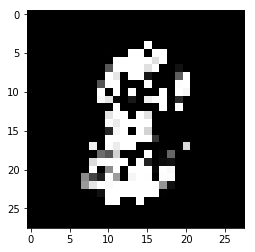

hello
Iteration {1500.000000}	G_loss {4.746045}	D_loss {0.028600}


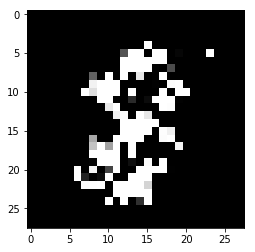

hello
Iteration {1600.000000}	G_loss {5.567375}	D_loss {0.100267}


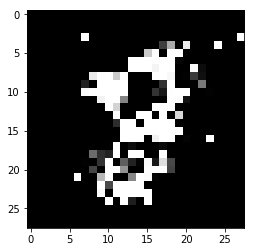

hello
Iteration {1700.000000}	G_loss {7.456276}	D_loss {0.026228}


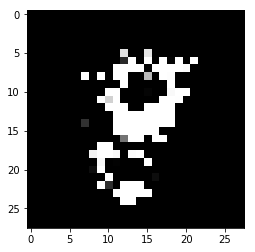

hello
Iteration {1800.000000}	G_loss {7.745789}	D_loss {0.104565}


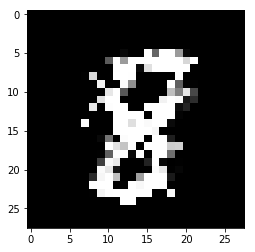

hello
Iteration {1900.000000}	G_loss {4.960717}	D_loss {0.200961}


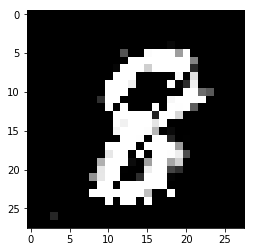

hello
Iteration {2000.000000}	G_loss {5.405010}	D_loss {0.204917}


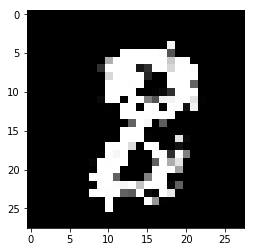

hello
Iteration {2100.000000}	G_loss {5.478754}	D_loss {0.032720}


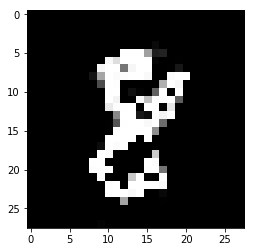

hello
Iteration {2200.000000}	G_loss {4.070956}	D_loss {0.070988}


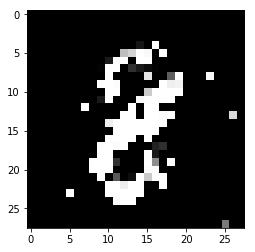

hello
Iteration {2300.000000}	G_loss {4.060706}	D_loss {0.081682}


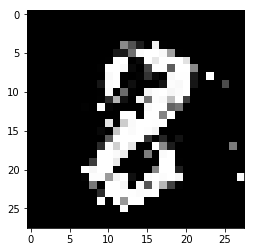

hello
Iteration {2400.000000}	G_loss {4.321850}	D_loss {0.023435}


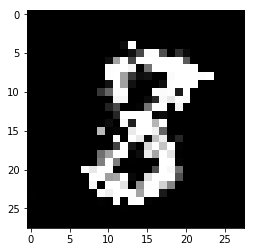

hello
Iteration {2500.000000}	G_loss {4.501907}	D_loss {0.384563}


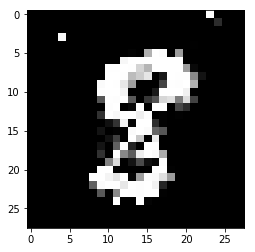

hello
Iteration {2600.000000}	G_loss {4.019552}	D_loss {0.107751}


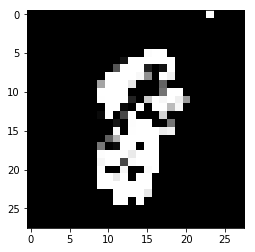

hello
Iteration {2700.000000}	G_loss {4.513132}	D_loss {0.038973}


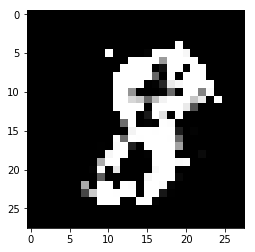

hello
Iteration {2800.000000}	G_loss {2.954685}	D_loss {0.051681}


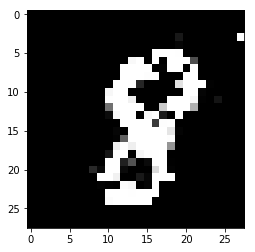

hello
Iteration {2900.000000}	G_loss {5.131985}	D_loss {0.186530}


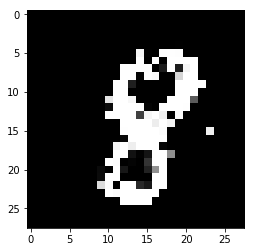

hello
Iteration {3000.000000}	G_loss {2.469429}	D_loss {0.032395}


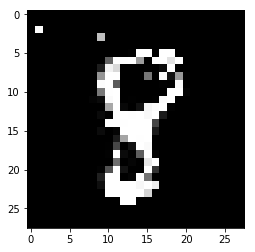

hello
Iteration {3100.000000}	G_loss {3.389463}	D_loss {0.051377}


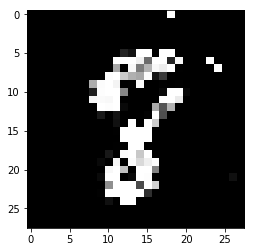

hello
Iteration {3200.000000}	G_loss {2.088222}	D_loss {0.074484}


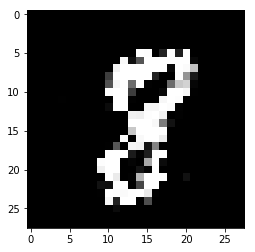

hello
Iteration {3300.000000}	G_loss {3.871234}	D_loss {0.040269}


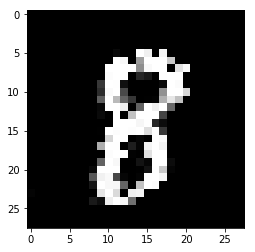

hello
Iteration {3400.000000}	G_loss {5.598436}	D_loss {0.067898}


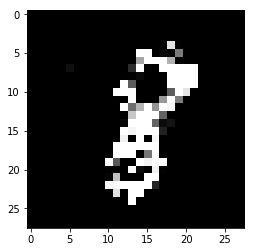

hello
Iteration {3500.000000}	G_loss {8.432709}	D_loss {0.028301}


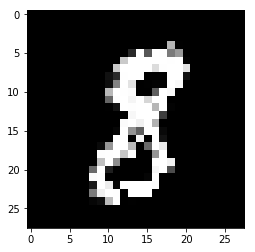

hello
Iteration {3600.000000}	G_loss {2.876828}	D_loss {0.034214}


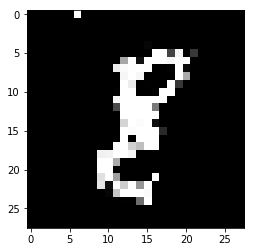

hello
Iteration {3700.000000}	G_loss {3.697626}	D_loss {0.104346}


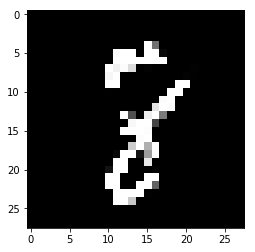

hello
Iteration {3800.000000}	G_loss {5.080418}	D_loss {0.044621}


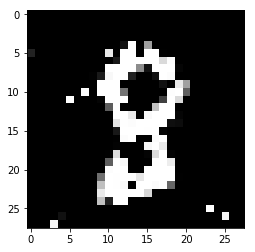

hello
Iteration {3900.000000}	G_loss {5.574844}	D_loss {0.035937}


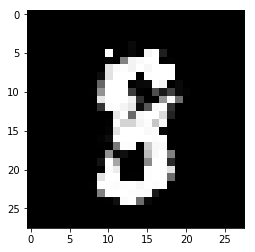

hello
Iteration {4000.000000}	G_loss {6.414908}	D_loss {0.218791}


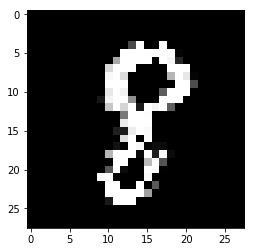

hello
Iteration {4100.000000}	G_loss {4.777179}	D_loss {0.140857}


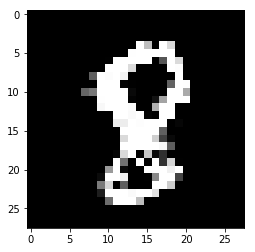

hello
Iteration {4200.000000}	G_loss {6.298841}	D_loss {0.042509}


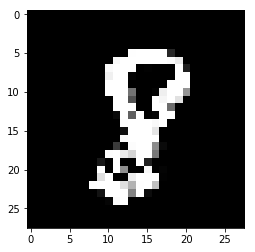

hello
Iteration {4300.000000}	G_loss {2.918436}	D_loss {0.063530}


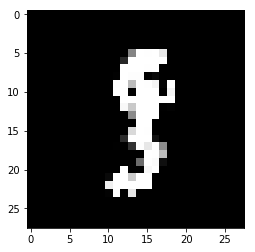

hello
Iteration {4400.000000}	G_loss {3.091255}	D_loss {0.027564}


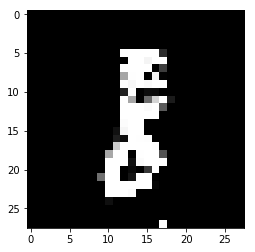

hello
Iteration {4500.000000}	G_loss {5.105013}	D_loss {0.120349}


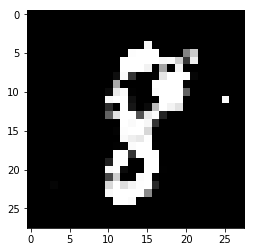

hello
Iteration {4600.000000}	G_loss {6.103293}	D_loss {0.048495}


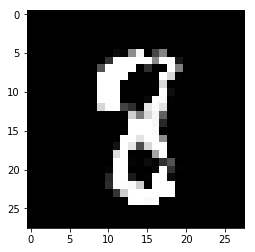

hello
Iteration {4700.000000}	G_loss {4.802092}	D_loss {0.225687}


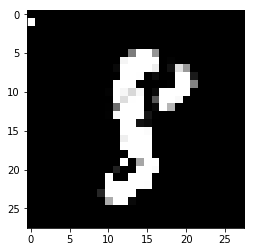

hello
Iteration {4800.000000}	G_loss {5.835466}	D_loss {0.203587}


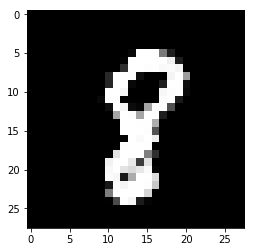

hello
Iteration {4900.000000}	G_loss {6.472235}	D_loss {0.766604}


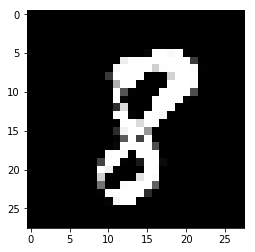

hello
Iteration {5000.000000}	G_loss {6.562620}	D_loss {0.049248}


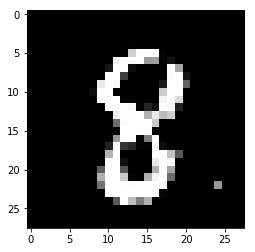

hello
Iteration {5100.000000}	G_loss {4.617124}	D_loss {0.188646}


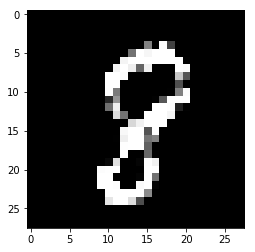

hello
Iteration {5200.000000}	G_loss {3.639706}	D_loss {0.246302}


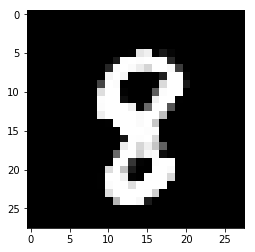

hello
Iteration {5300.000000}	G_loss {4.147238}	D_loss {0.315925}


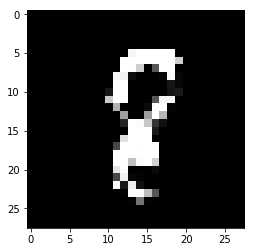

hello
Iteration {5400.000000}	G_loss {3.680411}	D_loss {0.375642}


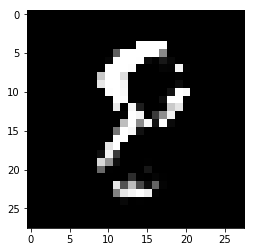

hello
Iteration {5500.000000}	G_loss {2.390104}	D_loss {0.418738}


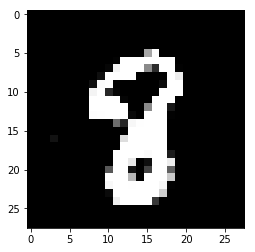

hello
Iteration {5600.000000}	G_loss {3.135358}	D_loss {0.460527}


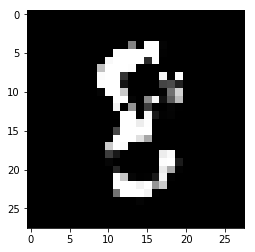

hello
Iteration {5700.000000}	G_loss {4.322723}	D_loss {0.891189}


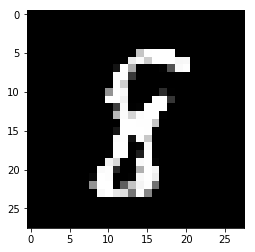

hello
Iteration {5800.000000}	G_loss {3.050811}	D_loss {0.326219}


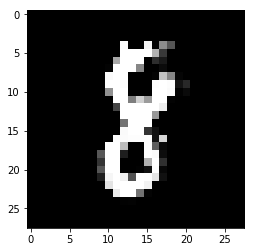

hello
Iteration {5900.000000}	G_loss {6.591791}	D_loss {0.549460}


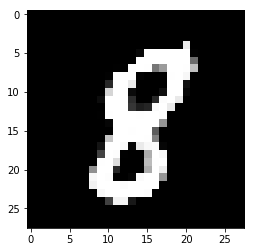

hello
Iteration {6000.000000}	G_loss {3.304211}	D_loss {0.503266}


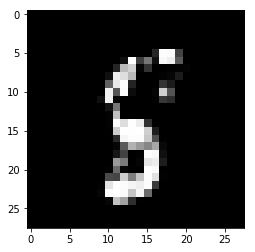

hello
Iteration {6100.000000}	G_loss {3.968898}	D_loss {0.316352}


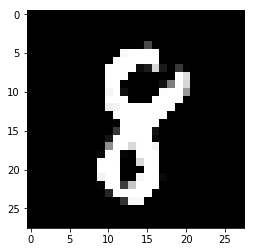

hello
Iteration {6200.000000}	G_loss {3.544826}	D_loss {0.445351}


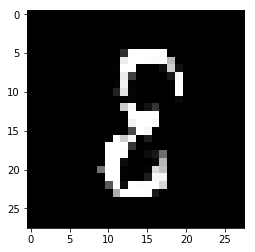

hello
Iteration {6300.000000}	G_loss {3.986989}	D_loss {0.358807}


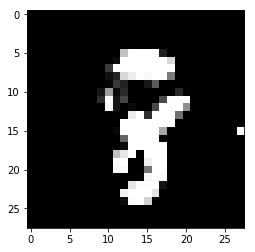

hello
Iteration {6400.000000}	G_loss {3.100210}	D_loss {0.642457}


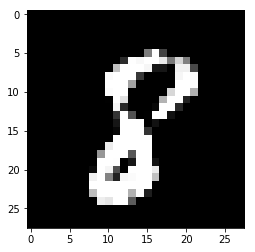

hello
Iteration {6500.000000}	G_loss {3.028629}	D_loss {0.500151}


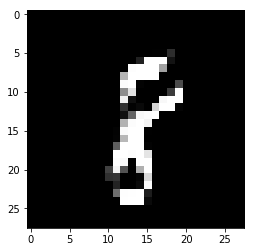

hello
Iteration {6600.000000}	G_loss {3.693918}	D_loss {0.381633}


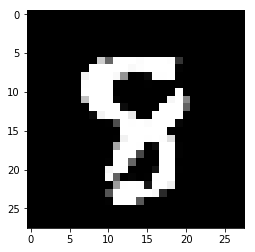

hello
Iteration {6700.000000}	G_loss {3.055492}	D_loss {0.380989}


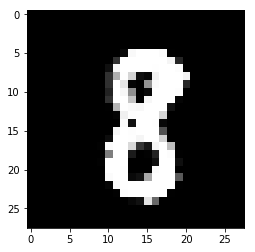

hello
Iteration {6800.000000}	G_loss {2.123376}	D_loss {0.400975}


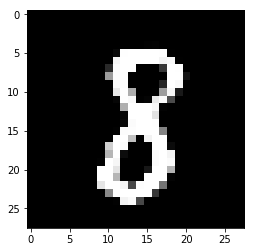

hello
Iteration {6900.000000}	G_loss {3.296676}	D_loss {0.546973}


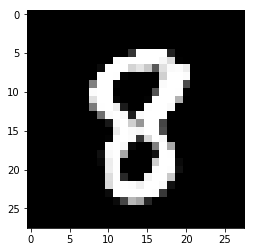

training starts
Pretraining.Generation:
hello
Iteration {0.000000}	G_loss {1.182546}	D_loss {1.443261}


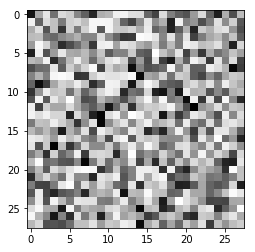

Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
Pretraining.Generation:
hello
Iteration {100.000000}	G_loss {4.411908}	D_loss {0.023639}


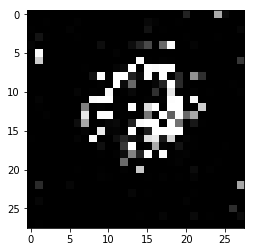

hello
Iteration {200.000000}	G_loss {5.851312}	D_loss {0.030892}


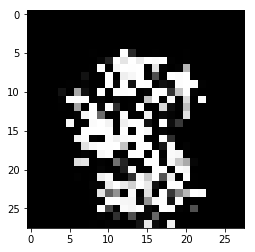

hello
Iteration {300.000000}	G_loss {4.831601}	D_loss {0.053594}


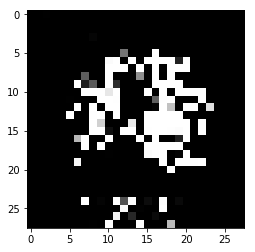

hello
Iteration {400.000000}	G_loss {5.941425}	D_loss {0.051936}


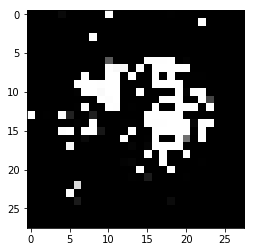

hello
Iteration {500.000000}	G_loss {10.354866}	D_loss {0.010419}


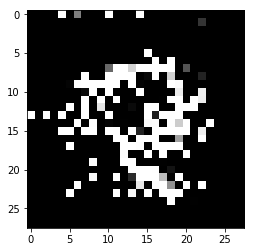

hello
Iteration {600.000000}	G_loss {5.890082}	D_loss {0.010341}


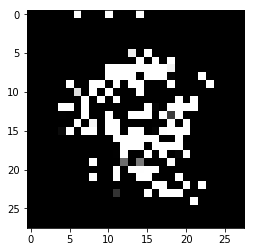

hello
Iteration {700.000000}	G_loss {6.451452}	D_loss {0.008609}


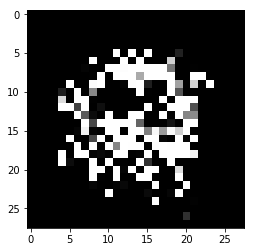

hello
Iteration {800.000000}	G_loss {6.668719}	D_loss {0.008852}


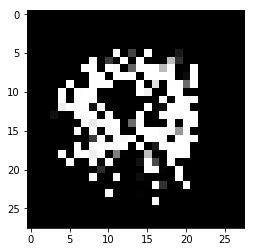

hello
Iteration {900.000000}	G_loss {8.366045}	D_loss {0.000645}


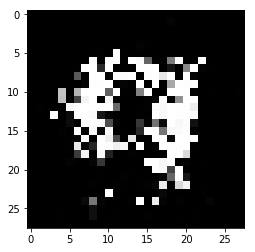

hello
Iteration {1000.000000}	G_loss {7.454225}	D_loss {0.006123}


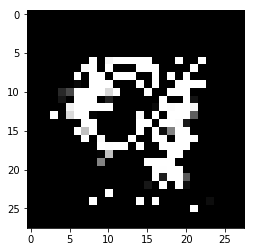

hello
Iteration {1100.000000}	G_loss {4.133305}	D_loss {0.006577}


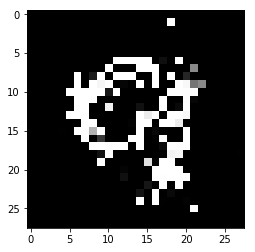

hello
Iteration {1200.000000}	G_loss {6.880427}	D_loss {0.031828}


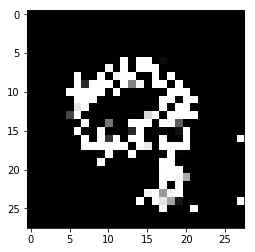

hello
Iteration {1300.000000}	G_loss {4.149902}	D_loss {0.021549}


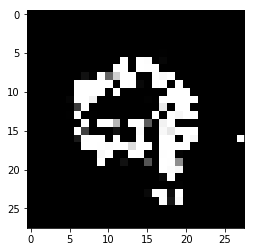

hello
Iteration {1400.000000}	G_loss {6.676754}	D_loss {0.009079}


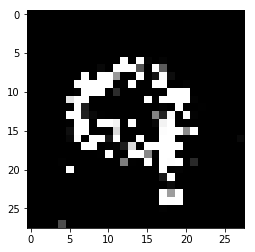

hello
Iteration {1500.000000}	G_loss {7.589459}	D_loss {0.006432}


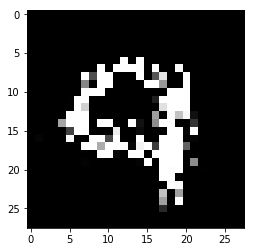

hello
Iteration {1600.000000}	G_loss {8.620022}	D_loss {0.001649}


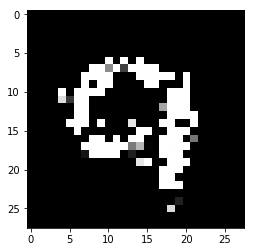

hello
Iteration {1700.000000}	G_loss {6.717127}	D_loss {0.007766}


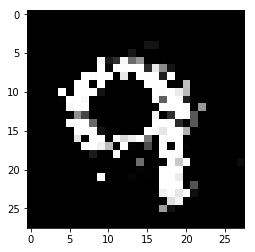

hello
Iteration {1800.000000}	G_loss {4.300151}	D_loss {0.013753}


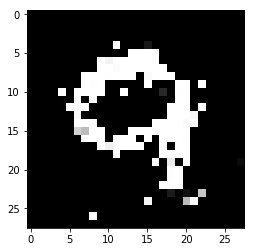

hello
Iteration {1900.000000}	G_loss {7.075064}	D_loss {0.011796}


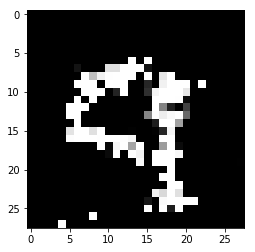

hello
Iteration {2000.000000}	G_loss {6.352521}	D_loss {0.015818}


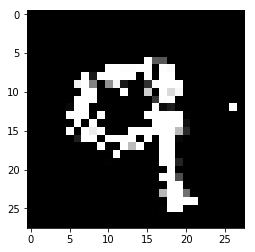

hello
Iteration {2100.000000}	G_loss {7.858284}	D_loss {0.001105}


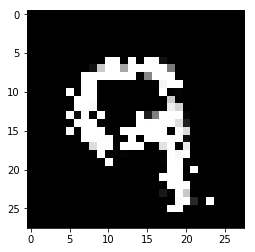

hello
Iteration {2200.000000}	G_loss {6.630836}	D_loss {0.007585}


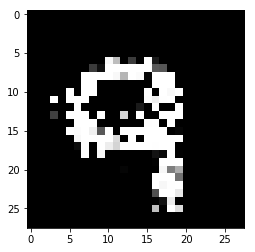

hello
Iteration {2300.000000}	G_loss {5.867837}	D_loss {0.013480}


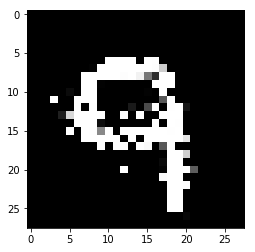

hello
Iteration {2400.000000}	G_loss {7.279356}	D_loss {0.087509}


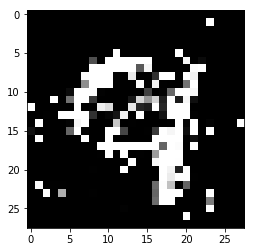

hello
Iteration {2500.000000}	G_loss {5.272750}	D_loss {0.007219}


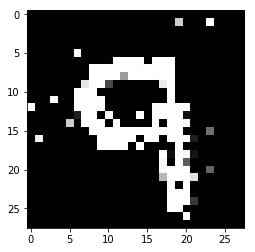

hello
Iteration {2600.000000}	G_loss {6.576745}	D_loss {0.004658}


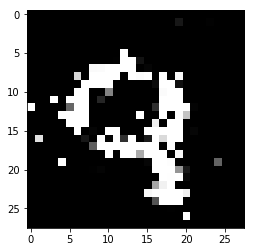

hello
Iteration {2700.000000}	G_loss {8.945710}	D_loss {0.000526}


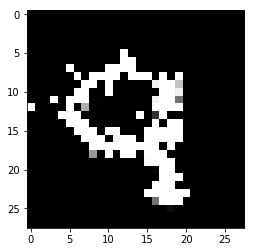

hello
Iteration {2800.000000}	G_loss {7.386038}	D_loss {0.002489}


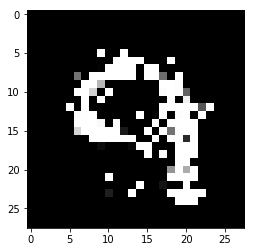

hello
Iteration {2900.000000}	G_loss {6.728303}	D_loss {0.008236}


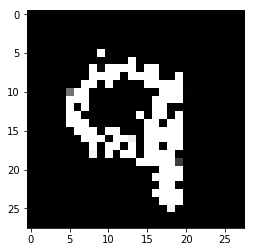

hello
Iteration {3000.000000}	G_loss {6.956116}	D_loss {0.001173}


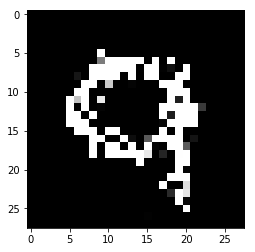

hello
Iteration {3100.000000}	G_loss {7.111908}	D_loss {0.008139}


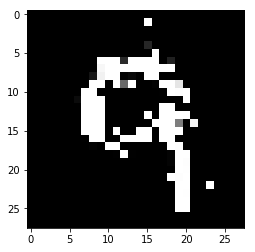

hello
Iteration {3200.000000}	G_loss {12.270515}	D_loss {0.001233}


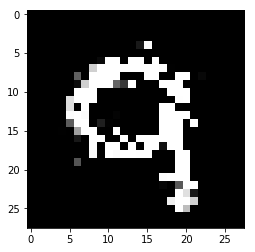

hello
Iteration {3300.000000}	G_loss {4.636788}	D_loss {0.024479}


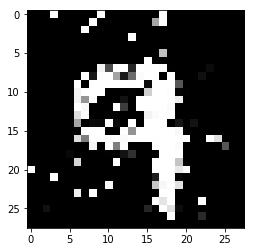

hello
Iteration {3400.000000}	G_loss {10.119034}	D_loss {0.069826}


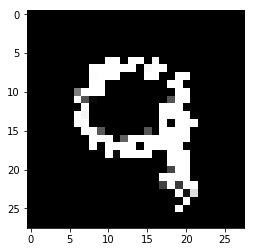

hello
Iteration {3500.000000}	G_loss {6.199185}	D_loss {0.007990}


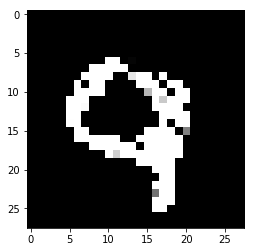

hello
Iteration {3600.000000}	G_loss {5.776600}	D_loss {0.005954}


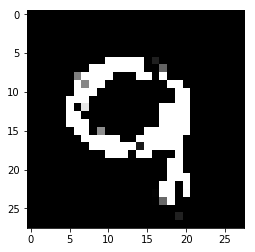

hello
Iteration {3700.000000}	G_loss {6.756954}	D_loss {0.003309}


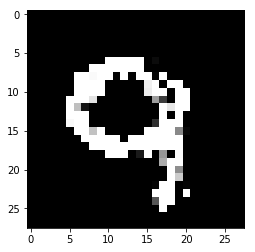

hello
Iteration {3800.000000}	G_loss {6.223384}	D_loss {0.001701}


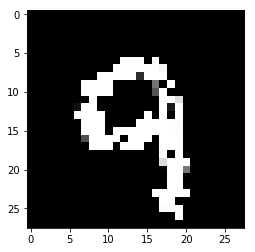

hello
Iteration {3900.000000}	G_loss {6.453063}	D_loss {0.014356}


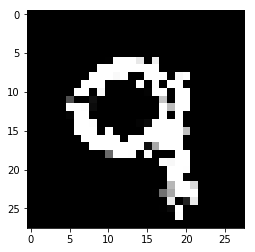

hello
Iteration {4000.000000}	G_loss {7.048872}	D_loss {0.001677}


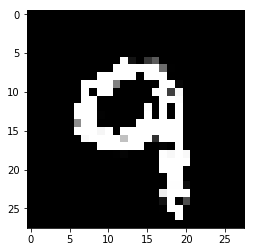

hello
Iteration {4100.000000}	G_loss {8.587622}	D_loss {0.000390}


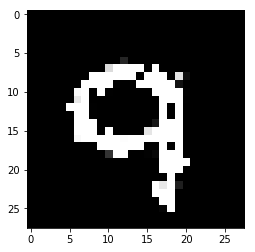

hello
Iteration {4200.000000}	G_loss {7.475363}	D_loss {0.038104}


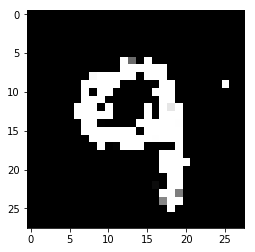

hello
Iteration {4300.000000}	G_loss {14.465464}	D_loss {0.068962}


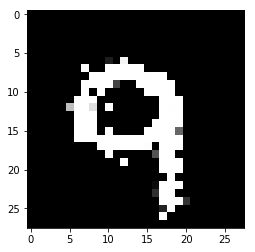

hello
Iteration {4400.000000}	G_loss {8.586583}	D_loss {0.055714}


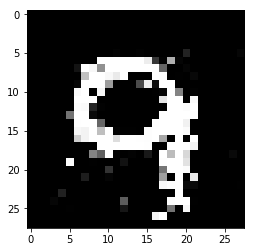

hello
Iteration {4500.000000}	G_loss {7.607032}	D_loss {0.001042}


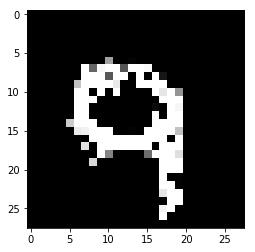

hello
Iteration {4600.000000}	G_loss {9.155510}	D_loss {0.007712}


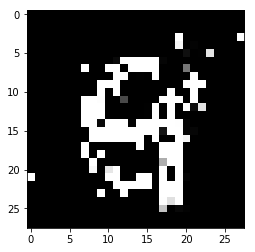

hello
Iteration {4700.000000}	G_loss {10.915427}	D_loss {0.003021}


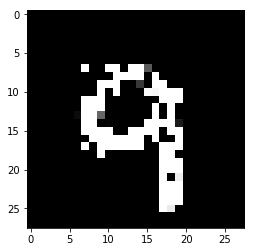

hello
Iteration {4800.000000}	G_loss {9.880985}	D_loss {0.000932}


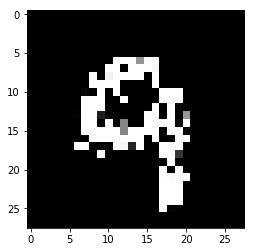

hello
Iteration {4900.000000}	G_loss {7.652418}	D_loss {0.000799}


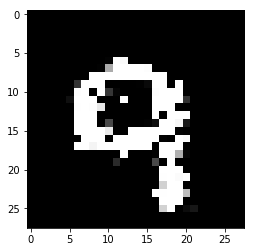

hello
Iteration {5000.000000}	G_loss {6.441211}	D_loss {0.016137}


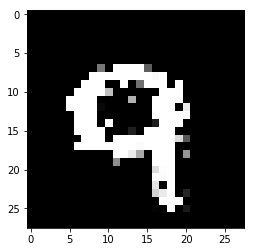

hello
Iteration {5100.000000}	G_loss {7.565932}	D_loss {0.008027}


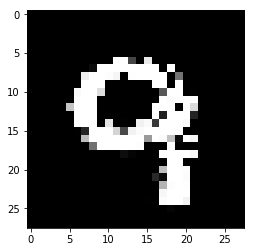

hello
Iteration {5200.000000}	G_loss {7.431785}	D_loss {0.054658}


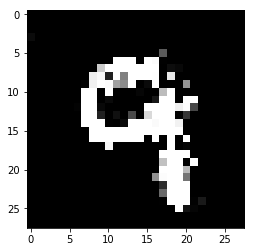

hello
Iteration {5300.000000}	G_loss {6.784812}	D_loss {0.007754}


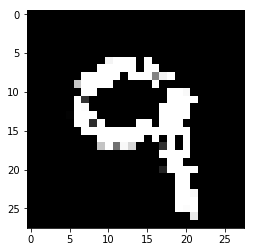

hello
Iteration {5400.000000}	G_loss {7.713004}	D_loss {0.004212}


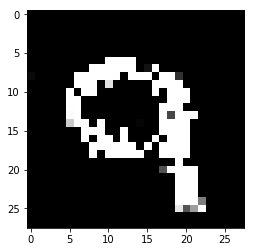

hello
Iteration {5500.000000}	G_loss {6.134315}	D_loss {0.006956}


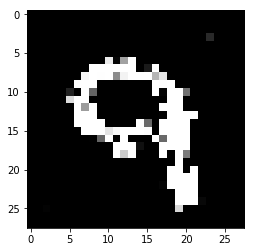

hello
Iteration {5600.000000}	G_loss {3.791904}	D_loss {0.022062}


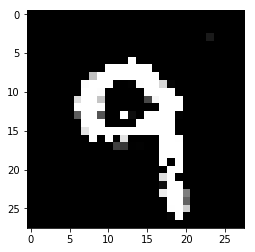

hello
Iteration {5700.000000}	G_loss {9.226834}	D_loss {0.110450}


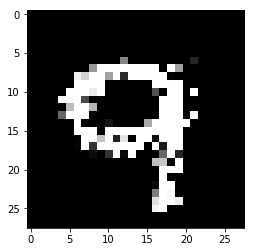

hello
Iteration {5800.000000}	G_loss {6.727927}	D_loss {0.056244}


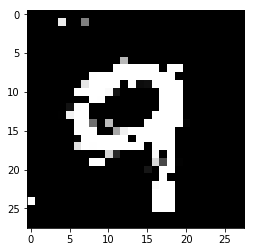

hello
Iteration {5900.000000}	G_loss {7.727831}	D_loss {0.014229}


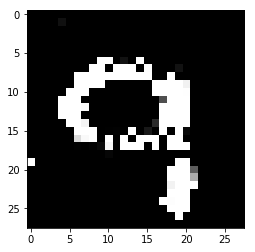

hello
Iteration {6000.000000}	G_loss {9.130774}	D_loss {0.000706}


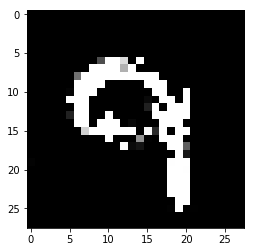

hello
Iteration {6100.000000}	G_loss {7.510581}	D_loss {0.001485}


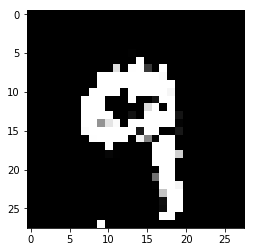

hello
Iteration {6200.000000}	G_loss {5.693644}	D_loss {0.065683}


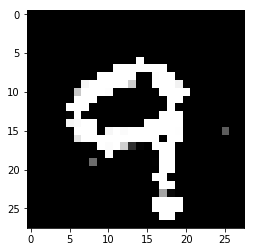

hello
Iteration {6300.000000}	G_loss {10.258702}	D_loss {0.007256}


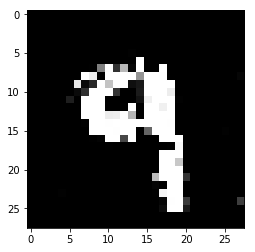

hello
Iteration {6400.000000}	G_loss {9.943951}	D_loss {0.000276}


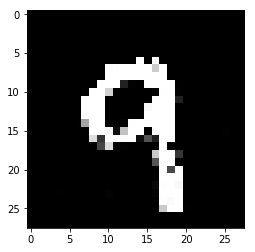

hello
Iteration {6500.000000}	G_loss {7.276762}	D_loss {0.002047}


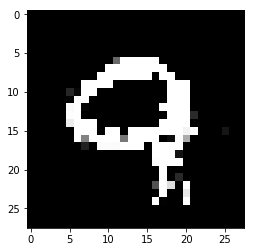

hello
Iteration {6600.000000}	G_loss {6.794044}	D_loss {0.005598}


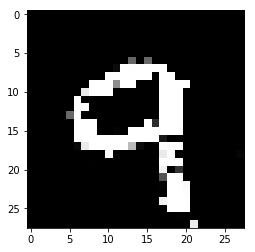

hello
Iteration {6700.000000}	G_loss {5.953136}	D_loss {0.004415}


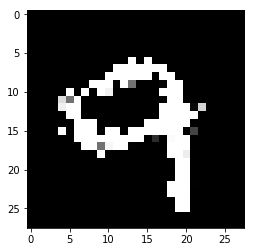

hello
Iteration {6800.000000}	G_loss {11.528752}	D_loss {0.373302}


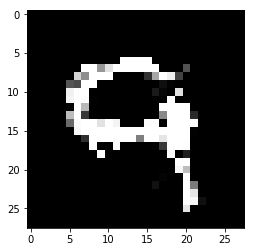

hello
Iteration {6900.000000}	G_loss {11.263034}	D_loss {0.063797}


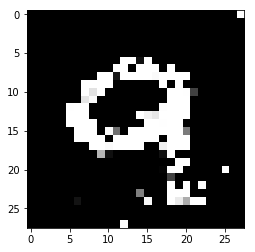

In [14]:
def cost(logits, labels):
  return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels))

d=Discriminator()
g=Generator()

phX=tf.placeholder(tf.float32, [None, 784])
phZ=tf.placeholder(tf.float32, [None, 100])

G_out=g.forward(phZ)
G_out_sample=g.forward(phZ, False)

D_out_real, D_logits_real=d.forward(phX)
D_out_fake, D_logits_fake=d.forward(G_out)

D_real_loss=cost(D_logits_real, tf.ones_like(D_logits_real))
D_fake_loss=cost(D_logits_fake, tf.zeros_like(D_logits_fake))
D_loss=D_real_loss+D_fake_loss

G_loss=cost(D_logits_fake, tf.ones_like(D_logits_fake))

lr=0.001
epochs=7000
pretrain_epochs=4000
batch_size=50

train_vars=tf.trainable_variables()
dvars=[var for var in train_vars if 'd' in var.name]
gvars=[var for var in train_vars if 'g' in var.name]

D_train=tf.train.AdamOptimizer(lr).minimize(D_loss, var_list=dvars)
G_train=tf.train.AdamOptimizer(lr).minimize(G_loss, var_list=gvars)

init=tf.global_variables_initializer()

with tf.Session() as sess:
  for i in range(10):
    sess.run(init)
    
    k=0
    l=10
    data=mnist_images[mnist_labels==i]
    print("training starts")
    g_cost=[]
    d_cost=[]
    
    for j in range(epochs):
      batch_X=next_batch(data, batch_size)
      batch_z=np.random.randn(batch_size, 100)
      
      _,d_loss=sess.run([D_train,D_loss], feed_dict={phX:batch_X, phZ:batch_z})
      _,g_loss=sess.run([G_train, G_loss], feed_dict={phZ:batch_z})
      
      d_cost.append(d_loss)
      g_cost.append(g_loss)
      
      if j%pretrain_epochs//10 == 0 and j<pretrain_epochs:
        print("Pretraining.Generation:")
        l=l-1
        
      if j%100==0 :
        print('hello')
        sample_z=np.random.randn(1,100)
        gen_sample=sess.run(G_out_sample, feed_dict={phZ:sample_z})
        print("Iteration {%f}\tG_loss {%f}\tD_loss {%f}"%(j,g_loss,d_loss))
        
        image=plt.imshow(gen_sample.reshape(28,28), cmap="Greys_r")
        plt.show()
        k=k+1